In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt" #url with formatting to fill in the number of the particular week
    dfs = []
    for week_num in week_nums: #for each week
        file_url = url.format(week_num) #format the url so it grabs that week
        dfs.append(pd.read_csv(file_url)) #append to our empty list
    return pd.concat(dfs) #combine files for each week

In [3]:
#putting in the weeks i want to use
week_nums = [190105, 190112, 190119, 190126, 190202, 190209, 190216, 190223, 190302, 190309, 190316]
turnstiles_df = get_data(week_nums) #use our function to get a df with all of our data

In [4]:
turnstiles_df.to_csv('mta_data_all.csv', header = False, index = False)

In [5]:
cols = ['CA','UNIT', 'SCP','STATION','LINE', 'DIVISION', 'DATE', 'TIME','DESC', 'ENTRIES','EXITS']
mta_data = pd.read_csv('mta_data_all.csv', names = cols) # Data frame with combined data
mta_data.shape

(2232426, 11)

In [6]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///mta.db")
all_data = pd.read_sql('SELECT * FROM mta_data;', engine)

In [10]:
all_data.shape

(0, 11)

In [11]:
# Strip leading/trailing spaces
mta_data.columns = [column.strip() for column in mta_data.columns]
mta_data.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINE', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [12]:
# 11 weeks of Data
mta_data.DATE.value_counts().sort_index()

01/01/2019    28742
01/02/2019    28691
01/03/2019    28584
01/04/2019    29388
01/05/2019    28619
              ...  
03/14/2019    29864
03/15/2019    28893
12/29/2018    28591
12/30/2018    28648
12/31/2018    28959
Name: DATE, Length: 77, dtype: int64

In [13]:
import datetime
from datetime import datetime as dt

In [14]:
# Take the date and time fields into a single datetime column
# Now the DATE_TIME has a datetime data type and we can do date time manipulations
mta_data["DATE_TIME"] = pd.to_datetime(mta_data.DATE + " " + mta_data.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [15]:
mta_data.head()

CA  UNIT       SCP STATION     LINE DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/29/2018  03:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/29/2018  07:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/29/2018  11:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/29/2018  15:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/29/2018  19:00:00   

      DESC  ENTRIES    EXITS           DATE_TIME  
0  REGULAR  6889287  2335920 2018-12-29 03:00:00  
1  REGULAR  6889299  2335936 2018-12-29 07:00:00  
2  REGULAR  6889364  2336038 2018-12-29 11:00:00  
3  REGULAR  6889605  2336101 2018-12-29 15:00:00  
4  REGULAR  6889966  2336173 2018-12-29 19:00:00

In [16]:
#data cleaning time!
mask = ((mta_data["CA"] == "A002") &
        (mta_data["UNIT"] == "R051") & 
        (mta_data["SCP"] == "02-00-00") & 
        (mta_data["STATION"] == "59 ST"))

mta_data[mask].head()

CA  UNIT       SCP STATION     LINE DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/29/2018  03:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/29/2018  07:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/29/2018  11:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/29/2018  15:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/29/2018  19:00:00   

      DESC  ENTRIES    EXITS           DATE_TIME  
0  REGULAR  6889287  2335920 2018-12-29 03:00:00  
1  REGULAR  6889299  2335936 2018-12-29 07:00:00  
2  REGULAR  6889364  2336038 2018-12-29 11:00:00  
3  REGULAR  6889605  2336101 2018-12-29 15:00:00  
4  REGULAR  6889966  2336173 2018-12-29 19:00:00

In [17]:
mask = ((mta_data["CA"] == "R626") & 
(mta_data["UNIT"] == "R062") & 
(mta_data["SCP"] == "00-00-00") & 
(mta_data["STATION"] == "CROWN HTS-UTICA"))

mta_data[mask].head()

CA  UNIT       SCP          STATION LINE DIVISION        DATE  \
194904  R626  R062  00-00-00  CROWN HTS-UTICA   34      IRT  12/29/2018   
194905  R626  R062  00-00-00  CROWN HTS-UTICA   34      IRT  12/29/2018   
194906  R626  R062  00-00-00  CROWN HTS-UTICA   34      IRT  12/29/2018   
194907  R626  R062  00-00-00  CROWN HTS-UTICA   34      IRT  12/29/2018   
194908  R626  R062  00-00-00  CROWN HTS-UTICA   34      IRT  12/29/2018   

            TIME     DESC   ENTRIES    EXITS           DATE_TIME  
194904  03:00:00  REGULAR  14383932  3170889 2018-12-29 03:00:00  
194905  07:00:00  REGULAR  14384058  3170900 2018-12-29 07:00:00  
194906  11:00:00  REGULAR  14384442  3170948 2018-12-29 11:00:00  
194907  15:00:00  REGULAR  14384860  3171020 2018-12-29 15:00:00  
194908  19:00:00  REGULAR  14385248  3171133 2018-12-29 19:00:00

In [18]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_data
 .groupby(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

CA  UNIT       SCP          STATION           DATE_TIME  ENTRIES
1662279  R210  R044  00-06-01  BROOKLYN BRIDGE 2019-01-29 03:00:00        2
84798    A046  R463  00-06-02         CANAL ST 2019-02-21 08:00:00        2
586657   N071  R013  00-00-02   34 ST-PENN STA 2019-02-28 03:00:00        2
1602824  R188  R037  00-00-00           207 ST 2019-02-28 07:00:00        2
586656   N071  R013  00-00-02   34 ST-PENN STA 2019-02-27 23:00:00        2
586655   N071  R013  00-00-02   34 ST-PENN STA 2019-02-27 19:00:00        2
15935    A011  R080  01-00-00       57 ST-7 AV 2018-12-30 15:00:00        2
84799    A046  R463  00-06-02         CANAL ST 2019-02-21 12:00:00        2
17433    A011  R080  01-00-03       57 ST-7 AV 2018-12-30 15:00:00        2
84794    A046  R463  00-06-02         CANAL ST 2019-02-20 16:00:00        2

In [25]:
#we have two entries for the same time - fix that!
mask = ((mta_data["CA"] == "N100") & 
(mta_data["UNIT"] == "R252") & 
(mta_data["SCP"] == "00-00-00") & 
(mta_data["STATION"] == "HIGH ST") &
(mta_data["DATE_TIME"].dt.date == datetime.datetime(2019, 1, 29).date()))

mta_data[mask].head()

CA  UNIT       SCP  STATION LINE DIVISION        DATE      TIME  \
869412  N100  R252  00-00-00  HIGH ST   AC      IND  01/29/2019  03:00:00   
869413  N100  R252  00-00-00  HIGH ST   AC      IND  01/29/2019  07:00:00   
869414  N100  R252  00-00-00  HIGH ST   AC      IND  01/29/2019  11:00:00   
869415  N100  R252  00-00-00  HIGH ST   AC      IND  01/29/2019  15:00:00   
869416  N100  R252  00-00-00  HIGH ST   AC      IND  01/29/2019  19:00:00   
869417  N100  R252  00-00-00  HIGH ST   AC      IND  01/29/2019  23:00:00   

           DESC  ENTRIES  EXITS           DATE_TIME  
869412  REGULAR     5839   9388 2019-01-29 03:00:00  
869413  REGULAR     5873   9521 2019-01-29 07:00:00  
869414  REGULAR     6232  10774 2019-01-29 11:00:00  
869415  REGULAR     6460  11138 2019-01-29 15:00:00  
869416  REGULAR     6949  12116 2019-01-29 19:00:00  
869417  REGULAR     7091  12600 2019-01-29 23:00:00

In [20]:
#it seems that we might have some weird audits, check that
mta_data.DESC.value_counts()

REGULAR       2222547
RECOVR AUD       9879
Name: DESC, dtype: int64

In [26]:
# Get rid of the duplicate entry
mta_data.sort_values(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
mta_data.drop_duplicates(subset=["CA", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [27]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_data
 .groupby(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

CA  UNIT       SCP         STATION           DATE_TIME  ENTRIES
0        A002  R051  02-00-00           59 ST 2018-12-29 03:00:00        1
1488248  R139  R031  04-06-00  34 ST-PENN STA 2019-03-02 11:00:00        1
1488242  R139  R031  04-06-00  34 ST-PENN STA 2019-03-01 11:00:00        1
1488243  R139  R031  04-06-00  34 ST-PENN STA 2019-03-01 15:00:00        1
1488244  R139  R031  04-06-00  34 ST-PENN STA 2019-03-01 19:00:00        1

In [30]:
# Each combination of C/A, UNIT, SCP, and STATION represents a unique turnstile. 
# Let's take a look at a specific turnstile on a specific date.
# The ENTRIES column represents cumulative entries at that point in time.

mta_data[(mta_data["CA"] == "A011") & 
(mta_data["UNIT"] == "R080") & 
(mta_data["SCP"] == "01-00-00") & 
(mta_data["STATION"] == "57 ST-7 AV") &
(mta_data["DATE"] == "03/01/2019")]

CA  UNIT       SCP     STATION  LINE DIVISION        DATE  \
1624926  A011  R080  01-00-00  57 ST-7 AV  NQRW      BMT  03/01/2019   
1624925  A011  R080  01-00-00  57 ST-7 AV  NQRW      BMT  03/01/2019   
1624924  A011  R080  01-00-00  57 ST-7 AV  NQRW      BMT  03/01/2019   
1624923  A011  R080  01-00-00  57 ST-7 AV  NQRW      BMT  03/01/2019   
1624922  A011  R080  01-00-00  57 ST-7 AV  NQRW      BMT  03/01/2019   
1624921  A011  R080  01-00-00  57 ST-7 AV  NQRW      BMT  03/01/2019   

             TIME     DESC  ENTRIES   EXITS           DATE_TIME  
1624926  23:00:00  REGULAR    70410  257585 2019-03-01 23:00:00  
1624925  19:00:00  REGULAR    70071  256868 2019-03-01 19:00:00  
1624924  15:00:00  REGULAR    69230  254958 2019-03-01 15:00:00  
1624923  11:00:00  REGULAR    69016  253883 2019-03-01 11:00:00  
1624922  07:00:00  REGULAR    68937  251226 2019-03-01 07:00:00  
1624921  03:00:00  REGULAR    68919  250873 2019-03-01 03:00:00

In [31]:
# The maximum ENTRIES value would occur at the last reading of the day. 
# Since rows are listed in descending order of time, we can grab the last 
# reading of the day (located at the top of the group) using the .first() DataFrame method.

# This shows max daily ENTRIES
# as_index=False keeps original data structure so that there will be no need to flatten the file using reset_index()



mta_data_daily = (mta_data
                        .groupby(["CA", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        [['ENTRIES','EXITS']].first())

In [32]:
mta_data_daily.head()

CA  UNIT       SCP STATION        DATE  ENTRIES    EXITS
0  A002  R051  02-00-00   59 ST  01/01/2019  6892430  2336890
1  A002  R051  02-00-00   59 ST  01/02/2019  6893894  2337403
2  A002  R051  02-00-00   59 ST  01/03/2019  6895434  2337911
3  A002  R051  02-00-00   59 ST  01/04/2019  6896974  2338463
4  A002  R051  02-00-00   59 ST  01/05/2019  6897740  2338703

In [33]:
mta_data_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (mta_data_daily
                                                       .groupby(["CA", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES", "EXITS"]]
                                                       .shift(1))

In [34]:
mta_data_daily.head()

CA  UNIT       SCP STATION        DATE  ENTRIES    EXITS   PREV_DATE  \
0  A002  R051  02-00-00   59 ST  01/01/2019  6892430  2336890         NaN   
1  A002  R051  02-00-00   59 ST  01/02/2019  6893894  2337403  01/01/2019   
2  A002  R051  02-00-00   59 ST  01/03/2019  6895434  2337911  01/02/2019   
3  A002  R051  02-00-00   59 ST  01/04/2019  6896974  2338463  01/03/2019   
4  A002  R051  02-00-00   59 ST  01/05/2019  6897740  2338703  01/04/2019   

   PREV_ENTRIES  PREV_EXITS  
0           NaN         NaN  
1     6892430.0   2336890.0  
2     6893894.0   2337403.0  
3     6895434.0   2337911.0  
4     6896974.0   2338463.0

In [35]:
# Drop the rows for the earliest date in the df
mta_data_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [36]:
(mta_data_daily["ENTRIES"] - mta_data_daily["PREV_ENTRIES"]).describe()

count    3.653210e+05
mean    -1.298818e+02
std      1.321527e+07
min     -1.949563e+09
25%      1.980000e+02
50%      7.140000e+02
75%      1.449000e+03
max      1.948976e+09
dtype: float64

In [37]:
# How many rows are backwards? Also, the rest of this data analysis was done with my group
#Kalu Uga wrote/explained the rest of the data cleaning I have done
mta_data_daily[mta_data_daily["ENTRIES"] < mta_data_daily["PREV_ENTRIES"]].shape

(7839, 10)

In [38]:
# Print some of this data where entry
mta_data_daily[mta_data_daily["ENTRIES"] < mta_data_daily["PREV_ENTRIES"]].head()

CA  UNIT       SCP STATION        DATE  ENTRIES    EXITS   PREV_DATE  \
74   A002  R051  02-00-00   59 ST  12/29/2018  6890186  2336219  03/15/2019   
151  A002  R051  02-00-01   59 ST  12/29/2018  6152589  1379166  03/15/2019   
228  A002  R051  02-03-00   59 ST  12/29/2018  1174184  4405251  03/15/2019   
305  A002  R051  02-03-01   59 ST  12/29/2018   950052  1475323  03/15/2019   
382  A002  R051  02-03-02   59 ST  12/29/2018  6034465  8166534  03/15/2019   

     PREV_ENTRIES  PREV_EXITS  
74      6980490.0   2367486.0  
151     6224169.0   1395784.0  
228     1205360.0   4529109.0  
305     1032857.0   1597738.0  
382     6116371.0   8261700.0

In [41]:
# Reverse Entries - Why is counter in reverse 
mask = ((mta_data["CA"] == "A002") & 
(mta_data["UNIT"] == "R051") & 
(mta_data["SCP"] == "02-03-00") & 
(mta_data["STATION"] == "59 ST") &
(mta_data["DATE_TIME"].dt.date == datetime.date(2019, 3, 15)))

In [42]:
# plot this, if you could
tmp1 = mta_data[mask].sort_values('DATE_TIME')[['DATE', 'TIME', 'ENTRIES', 'EXITS']]
tmp1

DATE      TIME  ENTRIES    EXITS
2030763  03/15/2019  00:00:00  1204936  4527269
2030764  03/15/2019  04:00:00  1204937  4527282
2030765  03/15/2019  08:00:00  1204946  4527541
2030766  03/15/2019  12:00:00  1204984  4528236
2030767  03/15/2019  16:00:00  1205111  4528598
2030768  03/15/2019  20:00:00  1205360  4529109

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '00:00:00'),
  Text(1, 0, '04:00:00'),
  Text(2, 0, '08:00:00'),
  Text(3, 0, '12:00:00'),
  Text(4, 0, '16:00:00'),
  Text(5, 0, '20:00:00')])

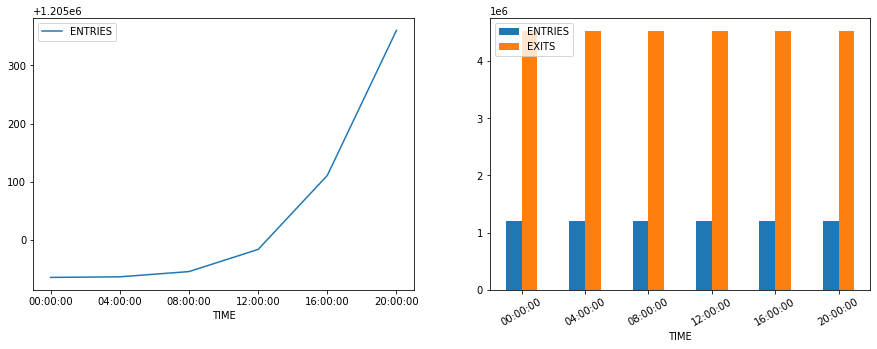

In [43]:
# Distribution of entries and exits

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
tmp1.plot(x='TIME', y='ENTRIES',ax=axes[0])   #tmp1.plot(x='TIME', y='EXITS',ax=axes[0])
tmp1.plot(x='TIME', y=['ENTRIES','EXITS'],kind='bar', stacked=False,alpha=1,ax=axes[1])  #tmp1.plot(kind='bar', stacked=True,alpha=1,ax=axes[1])
plt.xticks(rotation = 30, horizontalalignment = 'center')
#for ax in axes:
#    ax.set_ylim(bottom=0)

In [44]:
tmp1['ENTRIES'] = tmp1['ENTRIES'].sort_values(ascending=True).values
tmp1['EXITS'] = tmp1['EXITS'].sort_values(ascending=True).values


tmp1[["PREV_TIME", "PREV_ENTRIES","PREV_EXITS"]] = (tmp1
                                                   .groupby(["DATE"])[["TIME", "ENTRIES", "EXITS"]]
                                                   .shift(1))
tmp1['ENTRIES_DIFF'] = tmp1["ENTRIES"] - tmp1["PREV_ENTRIES"]
tmp1['EXITS_DIFF'] = tmp1["EXITS"] - tmp1["PREV_EXITS"]
tmp1

DATE      TIME  ENTRIES    EXITS PREV_TIME  PREV_ENTRIES  \
2030763  03/15/2019  00:00:00  1204936  4527269       NaN           NaN   
2030764  03/15/2019  04:00:00  1204937  4527282  00:00:00     1204936.0   
2030765  03/15/2019  08:00:00  1204946  4527541  04:00:00     1204937.0   
2030766  03/15/2019  12:00:00  1204984  4528236  08:00:00     1204946.0   
2030767  03/15/2019  16:00:00  1205111  4528598  12:00:00     1204984.0   
2030768  03/15/2019  20:00:00  1205360  4529109  16:00:00     1205111.0   

         PREV_EXITS  ENTRIES_DIFF  EXITS_DIFF  
2030763         NaN           NaN         NaN  
2030764   4527269.0           1.0        13.0  
2030765   4527282.0           9.0       259.0  
2030766   4527541.0          38.0       695.0  
2030767   4528236.0         127.0       362.0  
2030768   4528598.0         249.0       511.0

In [45]:
# How many stations have this problem
(mta_data_daily[mta_data_daily["ENTRIES"] < mta_data_daily["PREV_ENTRIES"]]
    .groupby(["CA", "UNIT", "SCP", "STATION"])
    .size())

CA     UNIT  SCP       STATION      
A002   R051  02-00-00  59 ST            1
             02-00-01  59 ST            1
             02-03-00  59 ST            1
             02-03-01  59 ST            1
             02-03-02  59 ST            1
                                       ..
TRAM2  R469  00-00-00  RIT-ROOSEVELT    1
             00-00-01  RIT-ROOSEVELT    1
             00-03-00  RIT-ROOSEVELT    1
             00-03-01  RIT-ROOSEVELT    1
             00-05-00  RIT-ROOSEVELT    1
Length: 4569, dtype: int64

In [46]:
# Create temporary Columns for daily entries and exits at each turnstile 
mta_data_daily['tmp_d_entries'] = mta_data_daily["ENTRIES"] \
                                          - mta_data_daily["PREV_ENTRIES"]
mta_data_daily['tmp_d_exits'] = mta_data_daily["EXITS"] \
                                          - mta_data_daily["PREV_EXITS"]

print(mta_data_daily.tmp_d_entries.describe())
print('99th Percentile_Entries = ', mta_data_daily.tmp_d_entries.quantile(0.99)) # Take the 99th percentile, = 1444

#print(mta_data_daily.tmp_d_exits.describe())
#print('99th Percentile_Exits = ', mta_data_daily.tmp_d_exits.quantile(0.99)) # Take the 99th percentile, = 1868
#mta_data_daily.head()

count    3.653210e+05
mean    -1.298818e+02
std      1.321527e+07
min     -1.949563e+09
25%      1.980000e+02
50%      7.140000e+02
75%      1.449000e+03
max      1.948976e+09
Name: tmp_d_entries, dtype: float64
99th Percentile_Entries =  4237.0


In [47]:
# Drop temporary columns ['tmp_d_entries','tmp_d_exits']
mta_data_daily = mta_data_daily.drop(["tmp_d_entries", "tmp_d_exits"], axis=1, errors="ignore")
print(mta_data_daily.shape)
mta_data_daily.head()

(365321, 10)


CA  UNIT       SCP STATION        DATE  ENTRIES    EXITS   PREV_DATE  \
1  A002  R051  02-00-00   59 ST  01/02/2019  6893894  2337403  01/01/2019   
2  A002  R051  02-00-00   59 ST  01/03/2019  6895434  2337911  01/02/2019   
3  A002  R051  02-00-00   59 ST  01/04/2019  6896974  2338463  01/03/2019   
4  A002  R051  02-00-00   59 ST  01/05/2019  6897740  2338703  01/04/2019   
5  A002  R051  02-00-00   59 ST  01/06/2019  6898382  2338887  01/05/2019   

   PREV_ENTRIES  PREV_EXITS  
1     6892430.0   2336890.0  
2     6893894.0   2337403.0  
3     6895434.0   2337911.0  
4     6896974.0   2338463.0  
5     6897740.0   2338703.0

In [48]:
# USE THIS FUNCTION TO GET THE DAILY_ENTRIES

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

mta_data_daily["DAILY_ENTRIES"] = mta_data_daily.apply(get_daily_counts, axis=1, max_counter=1444) # max_counter_default = 1000000

entries: 6893894 <-- 6892430.0
entries: 6895434 <-- 6893894.0
entries: 6896974 <-- 6895434.0
entries: 6899906 <-- 6898382.0
entries: 6901408 <-- 6899906.0
entries: 6902887 <-- 6901408.0
entries: 6904437 <-- 6902887.0
entries: 6905906 <-- 6904437.0
entries: 6910233 <-- 6908756.0
entries: 6911740 <-- 6910233.0
entries: 6913214 <-- 6911740.0
entries: 6914713 <-- 6913214.0
entries: 6919752 <-- 6918241.0
entries: 6922605 <-- 6921140.0
entries: 6939143 <-- 6937675.0
entries: 6944546 <-- 6943079.0
entries: 6946108 <-- 6944546.0
entries: 6947627 <-- 6946108.0
entries: 6953932 <-- 6952455.0
entries: 6955438 <-- 6953932.0
entries: 6963578 <-- 6962053.0
entries: 6967602 <-- 6966123.0
entries: 6969056 <-- 6967602.0
entries: 6971959 <-- 6970476.0
entries: 6975879 <-- 6974378.0
entries: 6977338 <-- 6975879.0
entries: 6978906 <-- 6977338.0
entries: 6980490 <-- 6978906.0
entries: 6890186 <-- 6980490.0
entries: 6152589 <-- 6224169.0
entries: 1174184 <-- 1205360.0
entries: 950052 <-- 1032857.0
entries: 

entries: 130659 <-- 127951.0
entries: 1562636326 <-- 130659.0
entries: 216 <-- 1562636326.0
entries: 5591 <-- 4098.0
entries: 10242 <-- 8765.0
entries: 11811 <-- 10242.0
entries: 13336 <-- 11811.0
entries: 15023 <-- 13336.0
entries: 19922 <-- 18372.0
entries: 22798 <-- 21251.0
entries: 24307 <-- 22798.0
entries: 31097 <-- 27430.0
entries: 34515 <-- 31097.0
entries: 38048 <-- 34515.0
entries: 41713 <-- 38048.0
entries: 43618 <-- 41713.0
entries: 45100 <-- 43618.0
entries: 48699 <-- 45100.0
entries: 52264 <-- 48699.0
entries: 55795 <-- 52264.0
entries: 59785 <-- 55795.0
entries: 63672 <-- 59785.0
entries: 65747 <-- 63672.0
entries: 67366 <-- 65747.0
entries: 70485 <-- 67366.0
entries: 74480 <-- 70485.0
entries: 78458 <-- 74480.0
entries: 82304 <-- 78458.0
entries: 85949 <-- 82304.0
entries: 88019 <-- 85949.0
entries: 89559 <-- 88019.0
entries: 92963 <-- 89559.0
entries: 96406 <-- 92963.0
entries: 100285 <-- 96406.0
entries: 103924 <-- 100285.0
entries: 107597 <-- 103924.0
entries: 109430

entries: 266263 <-- 3027.0
entries: 8439331 <-- 8436114.0
entries: 8442785 <-- 8439331.0
entries: 8446105 <-- 8442785.0
entries: 8447575 <-- 8446105.0
entries: 8452343 <-- 8448801.0
entries: 8455969 <-- 8452343.0
entries: 8459655 <-- 8455969.0
entries: 8463390 <-- 8459655.0
entries: 8466822 <-- 8463390.0
entries: 8468367 <-- 8466822.0
entries: 8473076 <-- 8469471.0
entries: 8476668 <-- 8473076.0
entries: 8480452 <-- 8476668.0
entries: 8484182 <-- 8480452.0
entries: 8487589 <-- 8484182.0
entries: 8489178 <-- 8487589.0
entries: 8492181 <-- 8490193.0
entries: 8495709 <-- 8492181.0
entries: 8499604 <-- 8495709.0
entries: 8503183 <-- 8499604.0
entries: 8506812 <-- 8503183.0
entries: 8508430 <-- 8506812.0
entries: 8513318 <-- 8509662.0
entries: 8517219 <-- 8513318.0
entries: 8520890 <-- 8517219.0
entries: 8524285 <-- 8520890.0
entries: 8527731 <-- 8524285.0
entries: 8529367 <-- 8527731.0
entries: 8534113 <-- 8530615.0
entries: 8537687 <-- 8534113.0
entries: 8541436 <-- 8537687.0
entries: 854

entries: 7471868 <-- 7468540.0
entries: 7475561 <-- 7471868.0
entries: 7477882 <-- 7475561.0
entries: 7480474 <-- 7478978.0
entries: 7483748 <-- 7480474.0
entries: 7487165 <-- 7483748.0
entries: 7490828 <-- 7487165.0
entries: 7494075 <-- 7490828.0
entries: 7497595 <-- 7494075.0
entries: 7499395 <-- 7497595.0
entries: 7502350 <-- 7500648.0
entries: 7505920 <-- 7502350.0
entries: 7509425 <-- 7505920.0
entries: 7512779 <-- 7509425.0
entries: 7516408 <-- 7512779.0
entries: 7518490 <-- 7516408.0
entries: 7519937 <-- 7518490.0
entries: 7523134 <-- 7519937.0
entries: 7526764 <-- 7523134.0
entries: 7530223 <-- 7526764.0
entries: 7532320 <-- 7530223.0
entries: 7535301 <-- 7533483.0
entries: 7536782 <-- 7535301.0
entries: 7540291 <-- 7536782.0
entries: 7544368 <-- 7540291.0
entries: 7547849 <-- 7544368.0
entries: 7552060 <-- 7547849.0
entries: 7556458 <-- 7552060.0
entries: 7558815 <-- 7556458.0
entries: 7560353 <-- 7558815.0
entries: 7563830 <-- 7560353.0
entries: 7566952 <-- 7563830.0
entries:

entries: 1843012 <-- 1840632.0
entries: 1847795 <-- 1845570.0
entries: 1850253 <-- 1847795.0
entries: 1852622 <-- 1850253.0
entries: 1855198 <-- 1852622.0
entries: 1859393 <-- 1857148.0
entries: 1861665 <-- 1859393.0
entries: 1863928 <-- 1861665.0
entries: 1866041 <-- 1863928.0
entries: 1868412 <-- 1866041.0
entries: 1871982 <-- 1869961.0
entries: 1874210 <-- 1871982.0
entries: 1876634 <-- 1874210.0
entries: 1879564 <-- 1876634.0
entries: 1881886 <-- 1879564.0
entries: 1885529 <-- 1883511.0
entries: 1887560 <-- 1885529.0
entries: 1889826 <-- 1887560.0
entries: 1892365 <-- 1889826.0
entries: 1894515 <-- 1892365.0
entries: 1898996 <-- 1897055.0
entries: 1901057 <-- 1898996.0
entries: 1903220 <-- 1901057.0
entries: 1905434 <-- 1903220.0
entries: 1908894 <-- 1907032.0
entries: 1911178 <-- 1908894.0
entries: 1913524 <-- 1911178.0
entries: 1915755 <-- 1913524.0
entries: 1918100 <-- 1915755.0
entries: 1921221 <-- 1919712.0
entries: 1923597 <-- 1921221.0
entries: 1926304 <-- 1923597.0
entries:

entries: 3308058 <-- 3306421.0
entries: 3312313 <-- 3310252.0
entries: 3314222 <-- 3312313.0
entries: 3315756 <-- 3314222.0
entries: 3317218 <-- 3315756.0
entries: 3322629 <-- 3320596.0
entries: 3325591 <-- 3324009.0
entries: 3328659 <-- 3327033.0
entries: 3333917 <-- 3332360.0
entries: 3336992 <-- 3335351.0
entries: 3350556 <-- 3348677.0
entries: 3353188 <-- 3350556.0
entries: 3355230 <-- 3353188.0
entries: 3356743 <-- 3355230.0
entries: 3358551 <-- 3356743.0
entries: 3366210 <-- 3364575.0
entries: 3368122 <-- 3366210.0
entries: 3369838 <-- 3368122.0
entries: 3375925 <-- 3374371.0
entries: 3377674 <-- 3375925.0
entries: 3384100 <-- 3382619.0
entries: 3385683 <-- 3384100.0
entries: 3387498 <-- 3385683.0
entries: 3393802 <-- 3392311.0
entries: 3397006 <-- 3395246.0
entries: 3398840 <-- 3397006.0
entries: 3402703 <-- 3399762.0
entries: 3405702 <-- 3402703.0
entries: 3407855 <-- 3405702.0
entries: 3409815 <-- 3407855.0
entries: 3411995 <-- 3409815.0
entries: 3300771 <-- 3411995.0
entries:

entries: 13617905 <-- 13616110.0
entries: 13619748 <-- 13617905.0
entries: 13621899 <-- 13619748.0
entries: 13623905 <-- 13621899.0
entries: 13486727 <-- 13623905.0
entries: 13489340 <-- 13486727.0
entries: 13491090 <-- 13489340.0
entries: 13564026 <-- 13562025.0
entries: 13566151 <-- 13564026.0
entries: 13568506 <-- 13566151.0
entries: 13570346 <-- 13568506.0
entries: 13571797 <-- 13570346.0
entries: 13573474 <-- 13571797.0
entries: 13575197 <-- 13573474.0
entries: 13577106 <-- 13575197.0
entries: 13579240 <-- 13577106.0
entries: 13581442 <-- 13579240.0
entries: 13583263 <-- 13581442.0
entries: 13586465 <-- 13584669.0
entries: 13588393 <-- 13586465.0
entries: 13590275 <-- 13588393.0
entries: 13592201 <-- 13590275.0
entries: 13594129 <-- 13592201.0
entries: 13595937 <-- 13594129.0
entries: 13600166 <-- 13598414.0
entries: 13602005 <-- 13600166.0
entries: 13603610 <-- 13602005.0
entries: 13605726 <-- 13603610.0
entries: 13607772 <-- 13605726.0
entries: 13609280 <-- 13607772.0
entries: 1

entries: 484567 <-- 482589.0
entries: 486366 <-- 484567.0
entries: 488591 <-- 486366.0
entries: 490756 <-- 488591.0
entries: 492893 <-- 490756.0
entries: 495363 <-- 492893.0
entries: 497817 <-- 495363.0
entries: 499655 <-- 497817.0
entries: 501870 <-- 499655.0
entries: 504349 <-- 501870.0
entries: 506649 <-- 504349.0
entries: 508917 <-- 506649.0
entries: 511425 <-- 508917.0
entries: 1949487604 <-- 511425.0
entries: 1949490503 <-- 1949487604.0
entries: 1949492988 <-- 1949490503.0
entries: 12296010 <-- 12293144.0
entries: 12298883 <-- 12296010.0
entries: 12301781 <-- 12298883.0
entries: 12304136 <-- 12301781.0
entries: 12306473 <-- 12304136.0
entries: 12308871 <-- 12306473.0
entries: 12311150 <-- 12308871.0
entries: 12313649 <-- 12311150.0
entries: 12316119 <-- 12313649.0
entries: 12318634 <-- 12316119.0
entries: 12321135 <-- 12318634.0
entries: 12323197 <-- 12321135.0
entries: 12325518 <-- 12323197.0
entries: 12328672 <-- 12325518.0
entries: 12331246 <-- 12328672.0
entries: 12333685 <--

entries: 749910 <-- 805319.0
entries: 1047180 <-- 1068144.0
entries: 2195494 <-- 2207211.0
entries: 117685843 <-- 117696577.0
entries: 3190177 <-- 3214918.0
entries: 4536244 <-- 4593258.0
entries: 1494359 <-- 1563534.0
entries: 1712108 <-- 1710633.0
entries: 1719829 <-- 1718336.0
entries: 1733853 <-- 1732339.0
entries: 1736716 <-- 1735228.0
entries: 1767708 <-- 1766262.0
entries: 1701663 <-- 1778875.0
entries: 4300818 <-- 4365099.0
entries: 135102397 <-- 135165213.0
entries: 117818055 <-- 117837212.0
entries: 1525688 <-- 1553417.0
entries: 134272 <-- 140531.0
entries: 3974530 <-- 3970736.0
entries: 3978557 <-- 3974530.0
entries: 3982468 <-- 3978557.0
entries: 3984180 <-- 3982468.0
entries: 3985745 <-- 3984180.0
entries: 3989547 <-- 3985745.0
entries: 3993471 <-- 3989547.0
entries: 3997412 <-- 3993471.0
entries: 4001258 <-- 3997412.0
entries: 4004971 <-- 4001258.0
entries: 4006644 <-- 4004971.0
entries: 4011645 <-- 4007898.0
entries: 4015442 <-- 4011645.0
entries: 4018662 <-- 4015442.0


entries: 12345612 <-- 12343534.0
entries: 12347667 <-- 12345612.0
entries: 12349803 <-- 12347667.0
entries: 12352008 <-- 12349803.0
entries: 12354163 <-- 12352008.0
entries: 12356244 <-- 12354280.0
entries: 12358236 <-- 12356244.0
entries: 12360423 <-- 12358236.0
entries: 12362608 <-- 12360423.0
entries: 12364640 <-- 12362608.0
entries: 12369124 <-- 12367287.0
entries: 12371000 <-- 12369124.0
entries: 12372963 <-- 12371000.0
entries: 12374843 <-- 12372963.0
entries: 12379027 <-- 12377036.0
entries: 12380922 <-- 12379027.0
entries: 12383044 <-- 12380922.0
entries: 12385218 <-- 12383044.0
entries: 12387386 <-- 12385218.0
entries: 12391323 <-- 12389739.0
entries: 12393599 <-- 12391323.0
entries: 12395885 <-- 12393599.0
entries: 12398163 <-- 12395885.0
entries: 12400412 <-- 12398163.0
entries: 12405027 <-- 12402858.0
entries: 12407285 <-- 12405027.0
entries: 12409586 <-- 12407285.0
entries: 12411806 <-- 12409586.0
entries: 12413975 <-- 12411806.0
entries: 12285485 <-- 12413975.0
entries: 1

entries: 8883254 <-- 8881424.0
entries: 8884994 <-- 8883254.0
entries: 8886990 <-- 8884994.0
entries: 8889088 <-- 8886990.0
entries: 8891129 <-- 8889088.0
entries: 8896000 <-- 8894156.0
entries: 8897668 <-- 8896000.0
entries: 8899481 <-- 8897668.0
entries: 8901337 <-- 8899481.0
entries: 8905018 <-- 8903132.0
entries: 8906977 <-- 8905018.0
entries: 8909042 <-- 8906977.0
entries: 8911022 <-- 8909042.0
entries: 8912982 <-- 8911022.0
entries: 8916386 <-- 8914899.0
entries: 8918456 <-- 8916386.0
entries: 8920442 <-- 8918456.0
entries: 8922341 <-- 8920442.0
entries: 8924400 <-- 8922341.0
entries: 8928127 <-- 8926183.0
entries: 8930071 <-- 8928127.0
entries: 8932021 <-- 8930071.0
entries: 8934046 <-- 8932021.0
entries: 8936089 <-- 8934046.0
entries: 8806755 <-- 8936089.0
entries: 10458551 <-- 10456991.0
entries: 10460132 <-- 10458551.0
entries: 10461683 <-- 10460132.0
entries: 10464634 <-- 10463050.0
entries: 10466107 <-- 10464634.0
entries: 10467709 <-- 10466107.0
entries: 10469328 <-- 10467

entries: 7056469 <-- 7054889.0
entries: 7059914 <-- 7057655.0
entries: 7062165 <-- 7059914.0
entries: 7064422 <-- 7062165.0
entries: 7066747 <-- 7064422.0
entries: 7069083 <-- 7066747.0
entries: 6927096 <-- 7069083.0
entries: 6930118 <-- 6928404.0
entries: 1069621 <-- 1068035.0
entries: 1071290 <-- 1069621.0
entries: 1073008 <-- 1071290.0
entries: 1076618 <-- 1074972.0
entries: 1078294 <-- 1076618.0
entries: 1080000 <-- 1078294.0
entries: 1081742 <-- 1080000.0
entries: 1083562 <-- 1081742.0
entries: 1087157 <-- 1085558.0
entries: 1088997 <-- 1087157.0
entries: 1090783 <-- 1088997.0
entries: 1092550 <-- 1090783.0
entries: 1094289 <-- 1092550.0
entries: 1098786 <-- 1097207.0
entries: 1100465 <-- 1098786.0
entries: 1101998 <-- 1100465.0
entries: 1103702 <-- 1101998.0
entries: 1107362 <-- 1105622.0
entries: 1109256 <-- 1107362.0
entries: 1111111 <-- 1109256.0
entries: 1112614 <-- 1111111.0
entries: 1114313 <-- 1112614.0
entries: 1118110 <-- 1116345.0
entries: 1119761 <-- 1118110.0
entries:

entries: 478 <-- 167184.0
entries: 130411 <-- 4236.0
entries: 3196878 <-- 3225816.0
entries: 3967937 <-- 4024558.0
entries: 1953410 <-- 1985937.0
entries: 3050864 <-- 3095444.0
entries: 411369 <-- 473741.0
entries: 176842 <-- 209769.0
entries: 1460408 <-- 1501996.0
entries: 922672 <-- 932792.0
entries: 101072086 <-- 101090107.0
entries: 11591295 <-- 11639762.0
entries: 1629512 <-- 1664171.0
entries: 3283326 <-- 3308051.0
entries: 2373450 <-- 2382374.0
entries: 1437336 <-- 1442080.0
entries: 480335 <-- 505391.0
entries: 68201716 <-- 68200266.0
entries: 68203193 <-- 68201716.0
entries: 68205929 <-- 68204352.0
entries: 68207472 <-- 68205929.0
entries: 68209059 <-- 68207472.0
entries: 68210634 <-- 68209059.0
entries: 68212170 <-- 68210634.0
entries: 68214927 <-- 68213383.0
entries: 68216454 <-- 68214927.0
entries: 68218008 <-- 68216454.0
entries: 68219594 <-- 68218008.0
entries: 68224206 <-- 68222735.0
entries: 68225798 <-- 68224206.0
entries: 68227440 <-- 68225798.0
entries: 68229028 <-- 

entries: 2242595 <-- 2270960.0
entries: 460357 <-- 494935.0
entries: 11056672 <-- 11055210.0
entries: 11071859 <-- 11070355.0
entries: 11095190 <-- 11093722.0
entries: 11117349 <-- 11115885.0
entries: 11118836 <-- 11117349.0
entries: 11133952 <-- 11132477.0
entries: 11135455 <-- 11133952.0
entries: 11050460 <-- 11136808.0
entries: 1043041 <-- 1097875.0
entries: 4473887 <-- 4510453.0
entries: 603856 <-- 624755.0
entries: 106563 <-- 105099.0
entries: 114953 <-- 113443.0
entries: 36155 <-- 114953.0
entries: 2315372 <-- 2365594.0
entries: 7201259 <-- 7264811.0
entries: 2896729 <-- 2895011.0
entries: 2898559 <-- 2896729.0
entries: 2900425 <-- 2898559.0
entries: 2903996 <-- 2902182.0
entries: 2905851 <-- 2903996.0
entries: 2907701 <-- 2905851.0
entries: 2909606 <-- 2907701.0
entries: 2911455 <-- 2909606.0
entries: 2915111 <-- 2913361.0
entries: 2916965 <-- 2915111.0
entries: 2918833 <-- 2916965.0
entries: 2920738 <-- 2918833.0
entries: 2922605 <-- 2920738.0
entries: 2926963 <-- 2925181.0
ent

entries: 10403638 <-- 10401790.0
entries: 10405122 <-- 10403638.0
entries: 10407097 <-- 10405122.0
entries: 10409141 <-- 10407097.0
entries: 10411369 <-- 10409141.0
entries: 10413810 <-- 10411369.0
entries: 10416385 <-- 10413810.0
entries: 10418165 <-- 10416385.0
entries: 10421696 <-- 10419346.0
entries: 10423968 <-- 10421696.0
entries: 10426440 <-- 10423968.0
entries: 10429200 <-- 10426440.0
entries: 10431869 <-- 10429200.0
entries: 10280448 <-- 10431869.0
entries: 10283427 <-- 10281782.0
entries: 691989 <-- 690444.0
entries: 693598 <-- 691989.0
entries: 695305 <-- 693598.0
entries: 698738 <-- 697156.0
entries: 700298 <-- 698738.0
entries: 702085 <-- 700298.0
entries: 703794 <-- 702085.0
entries: 705427 <-- 703794.0
entries: 708850 <-- 707211.0
entries: 710515 <-- 708850.0
entries: 712047 <-- 710515.0
entries: 713804 <-- 712047.0
entries: 715454 <-- 713804.0
entries: 719878 <-- 718300.0
entries: 721468 <-- 719878.0
entries: 722926 <-- 721468.0
entries: 724641 <-- 722926.0
entries: 728

entries: 542946 <-- 541081.0
entries: 544821 <-- 542946.0
entries: 546710 <-- 544821.0
entries: 548534 <-- 546710.0
entries: 552292 <-- 550413.0
entries: 554176 <-- 552292.0
entries: 556064 <-- 554176.0
entries: 557882 <-- 556064.0
entries: 559741 <-- 557882.0
entries: 442159 <-- 559741.0
entries: 1007537 <-- 1004529.0
entries: 1010655 <-- 1007537.0
entries: 1012182 <-- 1010655.0
entries: 1015073 <-- 1013617.0
entries: 1016538 <-- 1015073.0
entries: 1018039 <-- 1016538.0
entries: 1029425 <-- 1027570.0
entries: 1032281 <-- 1029425.0
entries: 1033876 <-- 1032281.0
entries: 1035512 <-- 1033876.0
entries: 1038005 <-- 1035512.0
entries: 1041164 <-- 1038005.0
entries: 1044192 <-- 1041164.0
entries: 1046770 <-- 1044192.0
entries: 1049613 <-- 1046770.0
entries: 1053748 <-- 1049613.0
entries: 1057327 <-- 1053748.0
entries: 1060487 <-- 1057327.0
entries: 1063012 <-- 1060487.0
entries: 1066125 <-- 1063012.0
entries: 1069277 <-- 1066125.0
entries: 1072418 <-- 1069277.0
entries: 1073937 <-- 1072418

entries: 4172910 <-- 4171063.0
entries: 4175058 <-- 4172910.0
entries: 4177211 <-- 4175058.0
entries: 4179378 <-- 4177211.0
entries: 4181611 <-- 4179378.0
entries: 4186089 <-- 4183953.0
entries: 4188368 <-- 4186089.0
entries: 4190550 <-- 4188368.0
entries: 4192781 <-- 4190550.0
entries: 4195071 <-- 4192781.0
entries: 4064987 <-- 4195071.0
entries: 4067889 <-- 4066253.0
entries: 7543134 <-- 7541634.0
entries: 7552769 <-- 7550597.0
entries: 7555837 <-- 7552769.0
entries: 7578571 <-- 7577100.0
entries: 7580632 <-- 7578571.0
entries: 7584539 <-- 7583056.0
entries: 7586785 <-- 7584539.0
entries: 7596513 <-- 7595044.0
entries: 7522849 <-- 7614252.0
entries: 754726 <-- 753268.0
entries: 756240 <-- 754726.0
entries: 757750 <-- 756240.0
entries: 760611 <-- 759155.0
entries: 762198 <-- 760611.0
entries: 763722 <-- 762198.0
entries: 765211 <-- 763722.0
entries: 766664 <-- 765211.0
entries: 769675 <-- 768181.0
entries: 771206 <-- 769675.0
entries: 772768 <-- 771206.0
entries: 774271 <-- 772768.0
e

entries: 54102394 <-- 54100486.0
entries: 54104502 <-- 54102394.0
entries: 54109563 <-- 54108060.0
entries: 54111147 <-- 54109563.0
entries: 54112936 <-- 54111147.0
entries: 54114994 <-- 54112936.0
entries: 54116564 <-- 54114994.0
entries: 54120673 <-- 54119100.0
entries: 54122274 <-- 54120673.0
entries: 54123881 <-- 54122274.0
entries: 54125728 <-- 54123881.0
entries: 54131241 <-- 54129572.0
entries: 54132923 <-- 54131241.0
entries: 54134611 <-- 54132923.0
entries: 54136539 <-- 54134611.0
entries: 54138176 <-- 54136539.0
entries: 54140930 <-- 54139275.0
entries: 54142738 <-- 54140930.0
entries: 54144613 <-- 54142738.0
entries: 54146612 <-- 54144613.0
entries: 54148733 <-- 54146612.0
entries: 54029243 <-- 54148733.0
entries: 2953013 <-- 2983022.0
entries: 2128418 <-- 2126914.0
entries: 2130035 <-- 2128418.0
entries: 2131520 <-- 2130035.0
entries: 2135866 <-- 2134326.0
entries: 2137436 <-- 2135866.0
entries: 2139044 <-- 2137436.0
entries: 2140774 <-- 2139044.0
entries: 2142369 <-- 21407

entries: 3048417 <-- 3075973.0
entries: 1449367 <-- 1456295.0
entries: 6490502 <-- 6487905.0
entries: 6493292 <-- 6490502.0
entries: 6496258 <-- 6493292.0
entries: 6498171 <-- 6496258.0
entries: 6499789 <-- 6498171.0
entries: 6502693 <-- 6499789.0
entries: 6505755 <-- 6502693.0
entries: 6508914 <-- 6505755.0
entries: 6511709 <-- 6508914.0
entries: 6514881 <-- 6511709.0
entries: 6516841 <-- 6514881.0
entries: 6521158 <-- 6518228.0
entries: 6524219 <-- 6521158.0
entries: 6527388 <-- 6524219.0
entries: 6530490 <-- 6527388.0
entries: 6533685 <-- 6530490.0
entries: 6535626 <-- 6533685.0
entries: 6538591 <-- 6537038.0
entries: 6541457 <-- 6538591.0
entries: 6544144 <-- 6541457.0
entries: 6547093 <-- 6544144.0
entries: 6550233 <-- 6547093.0
entries: 6552241 <-- 6550233.0
entries: 6553886 <-- 6552241.0
entries: 6557330 <-- 6553886.0
entries: 6560964 <-- 6557330.0
entries: 6564579 <-- 6560964.0
entries: 6567805 <-- 6564579.0
entries: 6571211 <-- 6567805.0
entries: 6574689 <-- 6571215.0
entries:

entries: 4617044 <-- 4660173.0
entries: 5347569 <-- 5346002.0
entries: 5335420 <-- 5410107.0
entries: 6980094 <-- 7047553.0
entries: 8621813 <-- 8620302.0
entries: 8623417 <-- 8621813.0
entries: 8626857 <-- 8625373.0
entries: 8628518 <-- 8626857.0
entries: 8630270 <-- 8628518.0
entries: 8633287 <-- 8631682.0
entries: 8636934 <-- 8635472.0
entries: 8638497 <-- 8636934.0
entries: 8640087 <-- 8638497.0
entries: 8641686 <-- 8640087.0
entries: 8643349 <-- 8641686.0
entries: 8647661 <-- 8646197.0
entries: 8649115 <-- 8647661.0
entries: 8650610 <-- 8649115.0
entries: 8652277 <-- 8650610.0
entries: 8656126 <-- 8654610.0
entries: 8657720 <-- 8656126.0
entries: 8659203 <-- 8657720.0
entries: 8662168 <-- 8660605.0
entries: 8666448 <-- 8664901.0
entries: 8668045 <-- 8666448.0
entries: 8669689 <-- 8668045.0
entries: 8671175 <-- 8669690.0
entries: 8672685 <-- 8671175.0
entries: 8674267 <-- 8672685.0
entries: 8675892 <-- 8674267.0
entries: 8677501 <-- 8675892.0
entries: 8685907 <-- 8684337.0
entries:

entries: 6338254 <-- 6336707.0
entries: 6343738 <-- 6342160.0
entries: 6348973 <-- 6347468.0
entries: 6350550 <-- 6348973.0
entries: 6352149 <-- 6350550.0
entries: 6353761 <-- 6352149.0
entries: 6355231 <-- 6353761.0
entries: 6265884 <-- 6355231.0
entries: 7791744 <-- 7789097.0
entries: 7794401 <-- 7791744.0
entries: 7797088 <-- 7794401.0
entries: 7802025 <-- 7799322.0
entries: 7804713 <-- 7802025.0
entries: 7807451 <-- 7804713.0
entries: 7810223 <-- 7807451.0
entries: 7812821 <-- 7810223.0
entries: 7815569 <-- 7812898.0
entries: 7818061 <-- 7815569.0
entries: 7820701 <-- 7818061.0
entries: 7823302 <-- 7820701.0
entries: 7825808 <-- 7823302.0
entries: 7829529 <-- 7827068.0
entries: 7832689 <-- 7829529.0
entries: 7835213 <-- 7832689.0
entries: 7837839 <-- 7835213.0
entries: 7840377 <-- 7837943.0
entries: 7842966 <-- 7840377.0
entries: 7845506 <-- 7842966.0
entries: 7847759 <-- 7845506.0
entries: 7850734 <-- 7847759.0
entries: 7854051 <-- 7850734.0
entries: 7857277 <-- 7854051.0
entries:

entries: 5062063 <-- 5060485.0
entries: 5064766 <-- 5062063.0
entries: 5067588 <-- 5064766.0
entries: 5070300 <-- 5067588.0
entries: 5073024 <-- 5070300.0
entries: 5075715 <-- 5073024.0
entries: 5077840 <-- 5075715.0
entries: 5079621 <-- 5077840.0
entries: 5081873 <-- 5079621.0
entries: 5084616 <-- 5081873.0
entries: 5087247 <-- 5084616.0
entries: 5089964 <-- 5087247.0
entries: 5092784 <-- 5089964.0
entries: 5095120 <-- 5092784.0
entries: 5096574 <-- 5095120.0
entries: 5099257 <-- 5096574.0
entries: 5101955 <-- 5099257.0
entries: 5104654 <-- 5101955.0
entries: 5107471 <-- 5104654.0
entries: 5110277 <-- 5107471.0
entries: 4950365 <-- 5110277.0
entries: 4953132 <-- 4951391.0
entries: 61 <-- 72006.0
entries: 70404 <-- 1067.0
entries: 30535 <-- 45682.0
entries: 131834 <-- 159635.0
entries: 10703172 <-- 10731647.0
entries: 15014856 <-- 15012164.0
entries: 15017726 <-- 15014856.0
entries: 15020687 <-- 15017726.0
entries: 15022712 <-- 15020687.0
entries: 15024586 <-- 15022712.0
entries: 15027

entries: 3798481 <-- 3926070.0
entries: 3801163 <-- 3799696.0
entries: 1072663 <-- 1071203.0
entries: 1077274 <-- 1075793.0
entries: 1078748 <-- 1077274.0
entries: 1080222 <-- 1078748.0
entries: 1081769 <-- 1080222.0
entries: 1083294 <-- 1081769.0
entries: 1088692 <-- 1087182.0
entries: 1090164 <-- 1088692.0
entries: 1098859 <-- 1097355.0
entries: 1102479 <-- 1100065.0
entries: 1103975 <-- 1102479.0
entries: 1106800 <-- 1105326.0
entries: 1109875 <-- 1108343.0
entries: 1111351 <-- 1109875.0
entries: 1112917 <-- 1111351.0
entries: 1114435 <-- 1112917.0
entries: 1116028 <-- 1114435.0
entries: 1119238 <-- 1117787.0
entries: 1120728 <-- 1119238.0
entries: 1122234 <-- 1120728.0
entries: 1123800 <-- 1122234.0
entries: 1125296 <-- 1123800.0
entries: 1136994 <-- 1135518.0
entries: 1138531 <-- 1136994.0
entries: 1140070 <-- 1138531.0
entries: 1141560 <-- 1140070.0
entries: 1143085 <-- 1141560.0
entries: 1147534 <-- 1145922.0
entries: 1149217 <-- 1147534.0
entries: 1150940 <-- 1149217.0
entries:

entries: 5981754 <-- 6037231.0
entries: 1121235721 <-- 1121263928.0
entries: 2025939007 <-- 2025913505.0
entries: 4512986 <-- 4568308.0
entries: 3737815 <-- 3744680.0
entries: 3255396 <-- 3259415.0
entries: 3791201 <-- 3795676.0
entries: 6817591 <-- 6826015.0
entries: 3315679 <-- 3351440.0
entries: 2092359 <-- 2111066.0
entries: 787620 <-- 809657.0
entries: 1857586 <-- 1893395.0
entries: 1237183 <-- 1262216.0
entries: 47785 <-- 51873.0
entries: 110536 <-- 116838.0
entries: 73 <-- 20790.0
entries: 110 <-- 2533.0
entries: 15814 <-- 797.0
entries: 139541 <-- 149418.0
entries: 67638 <-- 83613.0
entries: 23165 <-- 39037.0
entries: 153439 <-- 166818.0
entries: 60516 <-- 67100.0
entries: 5674 <-- 10771.0
entries: 413556 <-- 412045.0
entries: 408251 <-- 453923.0
entries: 168693 <-- 167239.0
entries: 170854 <-- 168847.0
entries: 208094 <-- 206613.0
entries: 222411 <-- 220936.0
entries: 224031 <-- 222411.0
entries: 232598 <-- 230967.0
entries: 240040 <-- 238422.0
entries: 162717 <-- 241482.0
ent

entries: 7214543 <-- 7213057.0
entries: 7221149 <-- 7219641.0
entries: 7222691 <-- 7221149.0
entries: 7224924 <-- 7222702.0
entries: 7226925 <-- 7225448.0
entries: 7228429 <-- 7226925.0
entries: 7231391 <-- 7229854.0
entries: 7232864 <-- 7231391.0
entries: 7146702 <-- 7232864.0
entries: 10083906 <-- 10081411.0
entries: 10086001 <-- 10083906.0
entries: 10088106 <-- 10086001.0
entries: 10092238 <-- 10090181.0
entries: 10094413 <-- 10092238.0
entries: 10096615 <-- 10094413.0
entries: 10098712 <-- 10096615.0
entries: 10100828 <-- 10098712.0
entries: 10105030 <-- 10103054.0
entries: 10107176 <-- 10105030.0
entries: 10109426 <-- 10107176.0
entries: 10111540 <-- 10109426.0
entries: 10113547 <-- 10111540.0
entries: 10118759 <-- 10116675.0
entries: 10120875 <-- 10118759.0
entries: 10122936 <-- 10120875.0
entries: 10125015 <-- 10122936.0
entries: 10129369 <-- 10127298.0
entries: 10131009 <-- 10129369.0
entries: 10133198 <-- 10131009.0
entries: 10135268 <-- 10133198.0
entries: 10137322 <-- 101352

entries: 10532749 <-- 10530719.0
entries: 10534804 <-- 10532749.0
entries: 10536251 <-- 10534804.0
entries: 10538976 <-- 10537085.0
entries: 10541037 <-- 10538976.0
entries: 10542997 <-- 10541037.0
entries: 10545025 <-- 10542997.0
entries: 10546531 <-- 10545025.0
entries: 10422345 <-- 10546531.0
entries: 11194637 <-- 11192637.0
entries: 11196801 <-- 11194637.0
entries: 11198996 <-- 11196801.0
entries: 11200724 <-- 11198996.0
entries: 11202206 <-- 11200724.0
entries: 11204365 <-- 11202206.0
entries: 11206614 <-- 11204365.0
entries: 11208924 <-- 11206614.0
entries: 11211160 <-- 11208924.0
entries: 11213337 <-- 11211160.0
entries: 11214989 <-- 11213337.0
entries: 11218338 <-- 11216233.0
entries: 11220522 <-- 11218338.0
entries: 11222749 <-- 11220522.0
entries: 11224926 <-- 11222749.0
entries: 11227148 <-- 11224926.0
entries: 11228666 <-- 11227148.0
entries: 11232886 <-- 11230895.0
entries: 11234983 <-- 11232886.0
entries: 11237002 <-- 11234983.0
entries: 11239254 <-- 11237002.0
entries: 1

entries: 4291816 <-- 4352635.0
entries: 67421638 <-- 67420126.0
entries: 67430348 <-- 67428893.0
entries: 67431894 <-- 67430348.0
entries: 67366497 <-- 67431894.0
entries: 13490128 <-- 13488682.0
entries: 13494184 <-- 13492738.0
entries: 13495690 <-- 13494184.0
entries: 13497216 <-- 13495690.0
entries: 13500089 <-- 13498615.0
entries: 13506048 <-- 13504585.0
entries: 13507543 <-- 13506048.0
entries: 13509003 <-- 13507543.0
entries: 13514086 <-- 13512601.0
entries: 13515605 <-- 13514086.0
entries: 13517073 <-- 13515605.0
entries: 13521566 <-- 13520094.0
entries: 13523141 <-- 13521566.0
entries: 13524982 <-- 13523141.0
entries: 13526536 <-- 13524982.0
entries: 13530835 <-- 13529279.0
entries: 13532493 <-- 13530835.0
entries: 13534181 <-- 13532493.0
entries: 13535798 <-- 13534181.0
entries: 13538757 <-- 13537251.0
entries: 13540281 <-- 13538757.0
entries: 13541874 <-- 13540281.0
entries: 13543573 <-- 13541874.0
entries: 13545243 <-- 13543573.0
entries: 13550734 <-- 13549133.0
entries: 135

entries: 5735632 <-- 5733794.0
entries: 5737489 <-- 5735632.0
entries: 5739349 <-- 5737489.0
entries: 5741121 <-- 5739349.0
entries: 5639641 <-- 5741121.0
entries: 594121 <-- 596010.0
entries: 834559 <-- 858340.0
entries: 493687 <-- 530178.0
entries: 7850696 <-- 7849143.0
entries: 7812796 <-- 7884476.0
entries: 10974999 <-- 10972870.0
entries: 10977182 <-- 10974999.0
entries: 10979320 <-- 10977182.0
entries: 10983779 <-- 10981348.0
entries: 10986172 <-- 10983779.0
entries: 10988649 <-- 10986172.0
entries: 10991180 <-- 10988649.0
entries: 10993550 <-- 10991180.0
entries: 10998090 <-- 10995663.0
entries: 11000285 <-- 10998090.0
entries: 11002566 <-- 11000285.0
entries: 11004880 <-- 11002566.0
entries: 11007092 <-- 11004880.0
entries: 11012462 <-- 11010104.0
entries: 11014986 <-- 11012462.0
entries: 11017465 <-- 11014986.0
entries: 11019797 <-- 11017465.0
entries: 11024340 <-- 11022010.0
entries: 11026684 <-- 11024340.0
entries: 11029037 <-- 11026684.0
entries: 11031182 <-- 11029037.0
ent

entries: 16684247 <-- 16682159.0
entries: 16685808 <-- 16684247.0
entries: 16689086 <-- 16686895.0
entries: 16691572 <-- 16689086.0
entries: 16694170 <-- 16691572.0
entries: 16696752 <-- 16694170.0
entries: 16699245 <-- 16696752.0
entries: 16700894 <-- 16699245.0
entries: 16703828 <-- 16702255.0
entries: 16706357 <-- 16703828.0
entries: 16708958 <-- 16706357.0
entries: 16711414 <-- 16708958.0
entries: 16714306 <-- 16711414.0
entries: 16716208 <-- 16714306.0
entries: 16719609 <-- 16717203.0
entries: 16722229 <-- 16719609.0
entries: 16725056 <-- 16722229.0
entries: 16727960 <-- 16725056.0
entries: 16730763 <-- 16727960.0
entries: 16577924 <-- 16730763.0
entries: 16579400 <-- 16577924.0
entries: 21693321 <-- 21690641.0
entries: 21696307 <-- 21693321.0
entries: 21699348 <-- 21696307.0
entries: 21701105 <-- 21699348.0
entries: 21702863 <-- 21701105.0
entries: 21705800 <-- 21702863.0
entries: 21708898 <-- 21705800.0
entries: 21712076 <-- 21708898.0
entries: 21715214 <-- 21712076.0
entries: 2

entries: 13601747 <-- 13600244.0
entries: 13604328 <-- 13601747.0
entries: 6916716 <-- 6913987.0
entries: 6919578 <-- 6916716.0
entries: 6922532 <-- 6919578.0
entries: 6924051 <-- 6922532.0
entries: 6928137 <-- 6925438.0
entries: 6930954 <-- 6928137.0
entries: 6933752 <-- 6930954.0
entries: 6936619 <-- 6933752.0
entries: 6939562 <-- 6936619.0
entries: 6941288 <-- 6939562.0
entries: 6945273 <-- 6942616.0
entries: 6948082 <-- 6945273.0
entries: 6951009 <-- 6948082.0
entries: 6954018 <-- 6951009.0
entries: 6956813 <-- 6954018.0
entries: 6958625 <-- 6956813.0
entries: 6961284 <-- 6959836.0
entries: 6964070 <-- 6961284.0
entries: 6966903 <-- 6964070.0
entries: 6969561 <-- 6966903.0
entries: 6972348 <-- 6969561.0
entries: 6974115 <-- 6972348.0
entries: 6978460 <-- 6975520.0
entries: 6981390 <-- 6978460.0
entries: 6984441 <-- 6981390.0
entries: 6987441 <-- 6984441.0
entries: 6990475 <-- 6987441.0
entries: 6992354 <-- 6990475.0
entries: 6993827 <-- 6992354.0
entries: 6996804 <-- 6993827.0
entr

entries: 9679890 <-- 9677879.0
entries: 9682009 <-- 9679890.0
entries: 9684008 <-- 9682009.0
entries: 9686242 <-- 9684008.0
entries: 9687738 <-- 9686242.0
entries: 9690738 <-- 9689003.0
entries: 9692787 <-- 9690738.0
entries: 9694855 <-- 9692787.0
entries: 9696970 <-- 9694855.0
entries: 9699105 <-- 9696970.0
entries: 9700653 <-- 9699105.0
entries: 9704698 <-- 9702852.0
entries: 9706706 <-- 9704698.0
entries: 9708801 <-- 9706706.0
entries: 9711256 <-- 9708801.0
entries: 9712768 <-- 9711256.0
entries: 9715757 <-- 9713997.0
entries: 9717699 <-- 9715757.0
entries: 9719866 <-- 9717699.0
entries: 9721808 <-- 9719866.0
entries: 9724026 <-- 9721808.0
entries: 9725561 <-- 9724026.0
entries: 9729337 <-- 9726994.0
entries: 9731926 <-- 9729337.0
entries: 9734068 <-- 9731926.0
entries: 9736194 <-- 9734068.0
entries: 9738592 <-- 9736194.0
entries: 9742978 <-- 9741047.0
entries: 9744916 <-- 9742978.0
entries: 9747075 <-- 9744916.0
entries: 9749413 <-- 9747075.0
entries: 9751772 <-- 9749413.0
entries:

entries: 5089759 <-- 5088016.0
entries: 5093035 <-- 5091223.0
entries: 5094640 <-- 5093035.0
entries: 5096203 <-- 5094640.0
entries: 5097915 <-- 5096203.0
entries: 5099689 <-- 5097915.0
entries: 5102782 <-- 5101025.0
entries: 5104412 <-- 5102782.0
entries: 5106110 <-- 5104412.0
entries: 5107804 <-- 5106110.0
entries: 5109484 <-- 5107804.0
entries: 5113564 <-- 5111691.0
entries: 5115183 <-- 5113564.0
entries: 5117084 <-- 5115183.0
entries: 5118833 <-- 5117084.0
entries: 5122244 <-- 5120426.0
entries: 5123943 <-- 5122244.0
entries: 5125637 <-- 5123943.0
entries: 5127340 <-- 5125637.0
entries: 5129135 <-- 5127340.0
entries: 5132263 <-- 5130508.0
entries: 5133903 <-- 5132263.0
entries: 5136871 <-- 5135162.0
entries: 5138731 <-- 5136871.0
entries: 5142051 <-- 5140267.0
entries: 5145033 <-- 5143355.0
entries: 5146812 <-- 5145033.0
entries: 5148726 <-- 5146812.0
entries: 5153752 <-- 5151842.0
entries: 5155558 <-- 5153752.0
entries: 5157330 <-- 5155558.0
entries: 5159160 <-- 5157330.0
entries:

entries: 16307473 <-- 16305956.0
entries: 16309104 <-- 16307473.0
entries: 16310646 <-- 16309104.0
entries: 16312497 <-- 16310646.0
entries: 16314111 <-- 16312497.0
entries: 16315600 <-- 16314111.0
entries: 16318655 <-- 16317025.0
entries: 16320466 <-- 16318655.0
entries: 16322178 <-- 16320466.0
entries: 16324291 <-- 16322178.0
entries: 16326184 <-- 16324291.0
entries: 16327804 <-- 16326184.0
entries: 16329477 <-- 16327804.0
entries: 16331239 <-- 16329477.0
entries: 16333203 <-- 16331239.0
entries: 16335286 <-- 16333203.0
entries: 16337376 <-- 16335286.0
entries: 16216451 <-- 16337376.0
entries: 16218749 <-- 16216451.0
entries: 16221630 <-- 16218749.0
entries: 68823950 <-- 68822271.0
entries: 68825808 <-- 68823950.0
entries: 68827665 <-- 68825808.0
entries: 68831601 <-- 68829844.0
entries: 68833498 <-- 68831601.0
entries: 68835520 <-- 68833498.0
entries: 68837430 <-- 68835520.0
entries: 68839479 <-- 68837430.0
entries: 68843374 <-- 68841512.0
entries: 68845239 <-- 68843374.0
entries: 6

entries: 240232462 <-- 240228383.0
entries: 240236511 <-- 240232462.0
entries: 240238981 <-- 240236511.0
entries: 240241073 <-- 240238981.0
entries: 240245252 <-- 240241073.0
entries: 240249226 <-- 240245252.0
entries: 240253217 <-- 240249226.0
entries: 240257239 <-- 240253217.0
entries: 240261350 <-- 240257239.0
entries: 240263813 <-- 240261350.0
entries: 240265707 <-- 240263813.0
entries: 240269697 <-- 240265707.0
entries: 240273813 <-- 240269697.0
entries: 240277850 <-- 240273813.0
entries: 240281934 <-- 240277850.0
entries: 240285933 <-- 240281934.0
entries: 240288242 <-- 240285933.0
entries: 240289953 <-- 240288242.0
entries: 240292706 <-- 240289953.0
entries: 240296888 <-- 240292706.0
entries: 240300943 <-- 240296888.0
entries: 240305519 <-- 240300943.0
entries: 240309669 <-- 240305519.0
entries: 240312184 <-- 240309669.0
entries: 240314274 <-- 240312184.0
entries: 240318521 <-- 240314274.0
entries: 240322499 <-- 240318521.0
entries: 240326676 <-- 240322499.0
entries: 240330513 <

entries: 1887232 <-- 47467.0
entries: 1890201 <-- 1888591.0
entries: 1250345 <-- 1248159.0
entries: 1252389 <-- 1250345.0
entries: 1254457 <-- 1252389.0
entries: 1255983 <-- 1254457.0
entries: 1257603 <-- 1255983.0
entries: 1259759 <-- 1257603.0
entries: 1261860 <-- 1259759.0
entries: 1264012 <-- 1261860.0
entries: 1266340 <-- 1264012.0
entries: 1268437 <-- 1266340.0
entries: 1273180 <-- 1271057.0
entries: 1275312 <-- 1273180.0
entries: 1277463 <-- 1275312.0
entries: 1279667 <-- 1277463.0
entries: 1281720 <-- 1279667.0
entries: 1287491 <-- 1285285.0
entries: 1289923 <-- 1287491.0
entries: 1292277 <-- 1289923.0
entries: 1294328 <-- 1292277.0
entries: 1295942 <-- 1294328.0
entries: 1297456 <-- 1295942.0
entries: 1299702 <-- 1297456.0
entries: 1301976 <-- 1299702.0
entries: 1304205 <-- 1301976.0
entries: 1306299 <-- 1304205.0
entries: 1308500 <-- 1306299.0
entries: 1310010 <-- 1308500.0
entries: 1313447 <-- 1311335.0
entries: 1315562 <-- 1313447.0
entries: 1318064 <-- 1315562.0
entries: 1

entries: 10862762 <-- 10860414.0
entries: 10865663 <-- 10862762.0
entries: 10868389 <-- 10865663.0
entries: 10870804 <-- 10868389.0
entries: 10876481 <-- 10873812.0
entries: 10879023 <-- 10876481.0
entries: 10881713 <-- 10879023.0
entries: 10884179 <-- 10881713.0
entries: 10886939 <-- 10884388.0
entries: 10889728 <-- 10886939.0
entries: 10891525 <-- 10889728.0
entries: 10894764 <-- 10891525.0
entries: 10897382 <-- 10894764.0
entries: 10901011 <-- 10899059.0
entries: 10903643 <-- 10901011.0
entries: 10906395 <-- 10903643.0
entries: 10908986 <-- 10906395.0
entries: 10911269 <-- 10908986.0
entries: 10915295 <-- 10913038.0
entries: 10917582 <-- 10915295.0
entries: 10919960 <-- 10917582.0
entries: 10922462 <-- 10919960.0
entries: 10924784 <-- 10922462.0
entries: 10773674 <-- 10924784.0
entries: 670235 <-- 668222.0
entries: 672275 <-- 670235.0
entries: 674092 <-- 672275.0
entries: 677710 <-- 675398.0
entries: 680113 <-- 677710.0
entries: 682463 <-- 680113.0
entries: 685022 <-- 682463.0
entri

entries: 2488547 <-- 2486909.0
entries: 2490235 <-- 2488547.0
entries: 2491878 <-- 2490235.0
entries: 2493539 <-- 2491878.0
entries: 2397344 <-- 2493539.0
entries: 4897495 <-- 4896046.0
entries: 4922492 <-- 4921021.0
entries: 4929238 <-- 4927754.0
entries: 4945659 <-- 4944203.0
entries: 4954019 <-- 4952506.0
entries: 4955483 <-- 4954019.0
entries: 4963961 <-- 4962477.0
entries: 4878675 <-- 4963961.0
entries: 3338506 <-- 3336873.0
entries: 3340118 <-- 3338506.0
entries: 3343329 <-- 3341668.0
entries: 3345012 <-- 3343329.0
entries: 3346854 <-- 3345012.0
entries: 3348661 <-- 3346854.0
entries: 3352215 <-- 3350617.0
entries: 3353906 <-- 3352215.0
entries: 3355635 <-- 3353906.0
entries: 3357506 <-- 3355635.0
entries: 3359175 <-- 3357506.0
entries: 3363684 <-- 3362092.0
entries: 3365342 <-- 3363684.0
entries: 3367240 <-- 3365342.0
entries: 3369028 <-- 3367240.0
entries: 3372741 <-- 3371263.0
entries: 3374451 <-- 3372741.0
entries: 3376040 <-- 3374451.0
entries: 3377623 <-- 3376040.0
entries:

entries: 2452313 <-- 2450358.0
entries: 2454149 <-- 2452313.0
entries: 2456221 <-- 2454149.0
entries: 2458295 <-- 2456221.0
entries: 2460141 <-- 2458295.0
entries: 2463249 <-- 2461514.0
entries: 2465223 <-- 2463249.0
entries: 2466692 <-- 2465223.0
entries: 2468340 <-- 2466692.0
entries: 2470349 <-- 2468340.0
entries: 2472139 <-- 2470349.0
entries: 2473713 <-- 2472139.0
entries: 2477162 <-- 2475120.0
entries: 2479175 <-- 2477162.0
entries: 2481328 <-- 2479175.0
entries: 2483477 <-- 2481328.0
entries: 2485468 <-- 2483477.0
entries: 2487134 <-- 2485468.0
entries: 2489523 <-- 2487134.0
entries: 2491647 <-- 2489523.0
entries: 2493813 <-- 2491647.0
entries: 2496028 <-- 2493813.0
entries: 2498149 <-- 2496028.0
entries: 2364925 <-- 2498149.0
entries: 7797719 <-- 7796033.0
entries: 7799744 <-- 7797719.0
entries: 7801747 <-- 7799744.0
entries: 7803223 <-- 7801747.0
entries: 7806227 <-- 7804539.0
entries: 7809728 <-- 7807636.0
entries: 7811830 <-- 7809728.0
entries: 7813946 <-- 7811830.0
entries:

entries: 5631572 <-- 5628941.0
entries: 5637310 <-- 5634617.0
entries: 5639846 <-- 5637310.0
entries: 5642313 <-- 5639846.0
entries: 5645004 <-- 5642313.0
entries: 5650185 <-- 5647682.0
entries: 5652814 <-- 5650185.0
entries: 5655482 <-- 5652814.0
entries: 5658036 <-- 5655482.0
entries: 5660931 <-- 5658036.0
entries: 5665396 <-- 5662900.0
entries: 5668141 <-- 5665396.0
entries: 5670855 <-- 5668141.0
entries: 5673669 <-- 5670855.0
entries: 5676478 <-- 5673669.0
entries: 5681751 <-- 5678619.0
entries: 5684676 <-- 5681751.0
entries: 5687494 <-- 5684676.0
entries: 5690409 <-- 5687494.0
entries: 5693637 <-- 5690409.0
entries: 5695245 <-- 5693637.0
entries: 5700621 <-- 5697984.0
entries: 5703057 <-- 5700621.0
entries: 5705664 <-- 5703057.0
entries: 5708325 <-- 5705664.0
entries: 5711288 <-- 5708681.0
entries: 5713919 <-- 5711288.0
entries: 5716606 <-- 5713919.0
entries: 5719287 <-- 5716606.0
entries: 5722316 <-- 5719287.0
entries: 5727028 <-- 5724869.0
entries: 5730353 <-- 5727028.0
entries:

entries: 9884532 <-- 9946717.0
entries: 7556393 <-- 7609279.0
entries: 353143949 <-- 353142396.0
entries: 353109995 <-- 353154832.0
entries: 4451838 <-- 4450381.0
entries: 4460534 <-- 4459070.0
entries: 4467275 <-- 4465822.0
entries: 4479954 <-- 4478420.0
entries: 4482290 <-- 4480760.0
entries: 4486630 <-- 4485162.0
entries: 4488100 <-- 4486630.0
entries: 4494204 <-- 4492688.0
entries: 4495672 <-- 4494204.0
entries: 4425902 <-- 4498397.0
entries: 508482 <-- 506982.0
entries: 510007 <-- 508482.0
entries: 511632 <-- 510007.0
entries: 439299 <-- 511632.0
entries: 283084 <-- 281595.0
entries: 284560 <-- 283084.0
entries: 290730 <-- 289229.0
entries: 292188 <-- 290730.0
entries: 296432 <-- 294941.0
entries: 303935 <-- 302487.0
entries: 306827 <-- 305301.0
entries: 311701 <-- 310151.0
entries: 314637 <-- 313144.0
entries: 316086 <-- 314637.0
entries: 319563 <-- 318083.0
entries: 321134 <-- 319563.0
entries: 322693 <-- 321134.0
entries: 243402 <-- 324117.0
entries: 62193 <-- 60587.0
entries: 

entries: 807912 <-- 805482.0
entries: 810153 <-- 807912.0
entries: 814435 <-- 812152.0
entries: 816657 <-- 814435.0
entries: 818965 <-- 816657.0
entries: 821486 <-- 818965.0
entries: 824809 <-- 822694.0
entries: 827177 <-- 824809.0
entries: 829553 <-- 827177.0
entries: 831835 <-- 829553.0
entries: 834309 <-- 831835.0
entries: 837707 <-- 835653.0
entries: 839853 <-- 837707.0
entries: 842152 <-- 839853.0
entries: 844475 <-- 842152.0
entries: 846915 <-- 844475.0
entries: 850475 <-- 848402.0
entries: 852855 <-- 850475.0
entries: 855401 <-- 852855.0
entries: 858056 <-- 855401.0
entries: 860387 <-- 858056.0
entries: 866383 <-- 864038.0
entries: 868887 <-- 866383.0
entries: 871095 <-- 868887.0
entries: 873537 <-- 871095.0
entries: 877115 <-- 874847.0
entries: 879687 <-- 877115.0
entries: 882071 <-- 879687.0
entries: 884616 <-- 882071.0
entries: 887157 <-- 884616.0
entries: 891455 <-- 889111.0
entries: 894545 <-- 891455.0
entries: 896091 <-- 894545.0
entries: 898904 <-- 897388.0
entries: 77245

entries: 3756964 <-- 3755518.0
entries: 3761354 <-- 3759890.0
entries: 3762801 <-- 3761354.0
entries: 3765692 <-- 3764190.0
entries: 3684936 <-- 3765692.0
entries: 19067059 <-- 19065547.0
entries: 19071243 <-- 19069758.0
entries: 19072799 <-- 19071243.0
entries: 19074331 <-- 19072799.0
entries: 19075895 <-- 19074331.0
entries: 19080242 <-- 19078711.0
entries: 19081773 <-- 19080242.0
entries: 19083326 <-- 19081773.0
entries: 19084803 <-- 19083326.0
entries: 19089815 <-- 19088280.0
entries: 19092834 <-- 19091245.0
entries: 19095995 <-- 19094492.0
entries: 19097570 <-- 19095995.0
entries: 19099111 <-- 19097570.0
entries: 19102029 <-- 19100450.0
entries: 19105386 <-- 19103662.0
entries: 19106922 <-- 19105386.0
entries: 19108611 <-- 19106922.0
entries: 19110213 <-- 19108611.0
entries: 19111846 <-- 19110213.0
entries: 19115086 <-- 19113539.0
entries: 19118036 <-- 19116415.0
entries: 19119726 <-- 19118036.0
entries: 19125892 <-- 19123915.0
entries: 19127353 <-- 19125892.0
entries: 19128884 <-

entries: 10557587 <-- 10555590.0
entries: 10559673 <-- 10557587.0
entries: 10561853 <-- 10559673.0
entries: 10564053 <-- 10561853.0
entries: 10566028 <-- 10564053.0
entries: 10569069 <-- 10567054.0
entries: 10571266 <-- 10569069.0
entries: 10573462 <-- 10571266.0
entries: 10575717 <-- 10573462.0
entries: 10577710 <-- 10575717.0
entries: 10581135 <-- 10579206.0
entries: 10583304 <-- 10581135.0
entries: 10585336 <-- 10583304.0
entries: 10587455 <-- 10585336.0
entries: 10591419 <-- 10588734.0
entries: 10594143 <-- 10591419.0
entries: 10596964 <-- 10594143.0
entries: 10599480 <-- 10596964.0
entries: 10601816 <-- 10599480.0
entries: 10605780 <-- 10603135.0
entries: 10608282 <-- 10605780.0
entries: 10611135 <-- 10608282.0
entries: 10614005 <-- 10611135.0
entries: 10616515 <-- 10614005.0
entries: 10620552 <-- 10617911.0
entries: 10622670 <-- 10620552.0
entries: 10625521 <-- 10622670.0
entries: 10628302 <-- 10625521.0
entries: 10630586 <-- 10628302.0
entries: 10635258 <-- 10632632.0
entries: 1

entries: 9955257 <-- 9952644.0
entries: 9957988 <-- 9955257.0
entries: 9960677 <-- 9957988.0
entries: 9963497 <-- 9960677.0
entries: 9966118 <-- 9963497.0
entries: 9967688 <-- 9966118.0
entries: 9972724 <-- 9970044.0
entries: 9975370 <-- 9972724.0
entries: 9977884 <-- 9975370.0
entries: 9980455 <-- 9977884.0
entries: 9982154 <-- 9980455.0
entries: 9983606 <-- 9982154.0
entries: 9986272 <-- 9983606.0
entries: 9989057 <-- 9986272.0
entries: 9991561 <-- 9989057.0
entries: 9993915 <-- 9991561.0
entries: 9996455 <-- 9993915.0
entries: 9998308 <-- 9996455.0
entries: 9999837 <-- 9998308.0
entries: 10002498 <-- 9999837.0
entries: 10005116 <-- 10002498.0
entries: 10007944 <-- 10005116.0
entries: 10010790 <-- 10007944.0
entries: 10013544 <-- 10010790.0
entries: 10015356 <-- 10013544.0
entries: 10019427 <-- 10016762.0
entries: 10021832 <-- 10019427.0
entries: 10024736 <-- 10021832.0
entries: 10027566 <-- 10024736.0
entries: 10030233 <-- 10027566.0
entries: 10031949 <-- 10030233.0
entries: 1003498

entries: 13767754 <-- 13764833.0
entries: 13770636 <-- 13767754.0
entries: 13773491 <-- 13770636.0
entries: 13775290 <-- 13773491.0
entries: 13776746 <-- 13775290.0
entries: 13779439 <-- 13776746.0
entries: 13782426 <-- 13779439.0
entries: 13785332 <-- 13782426.0
entries: 13788334 <-- 13785332.0
entries: 13791255 <-- 13788334.0
entries: 13793088 <-- 13791255.0
entries: 13798384 <-- 13795604.0
entries: 13801319 <-- 13798384.0
entries: 13804140 <-- 13801319.0
entries: 13807319 <-- 13804140.0
entries: 13809302 <-- 13807319.0
entries: 13810941 <-- 13809302.0
entries: 13813714 <-- 13810941.0
entries: 13816775 <-- 13813714.0
entries: 13819594 <-- 13816775.0
entries: 13821986 <-- 13819594.0
entries: 13824855 <-- 13821986.0
entries: 13826924 <-- 13824855.0
entries: 13828801 <-- 13826924.0
entries: 13831906 <-- 13828801.0
entries: 13834790 <-- 13831906.0
entries: 13837875 <-- 13834790.0
entries: 13840886 <-- 13837875.0
entries: 13844006 <-- 13840886.0
entries: 13845936 <-- 13844006.0
entries: 1

entries: 8041685 <-- 8039796.0
entries: 8045757 <-- 8044013.0
entries: 8047628 <-- 8045757.0
entries: 8049237 <-- 8047628.0
entries: 8050987 <-- 8049237.0
entries: 8054539 <-- 8052708.0
entries: 8056398 <-- 8054539.0
entries: 8058121 <-- 8056398.0
entries: 8059633 <-- 8058121.0
entries: 8061343 <-- 8059633.0
entries: 8065059 <-- 8063141.0
entries: 8066820 <-- 8065059.0
entries: 8068736 <-- 8066820.0
entries: 8070703 <-- 8068736.0
entries: 8072652 <-- 8070703.0
entries: 8076408 <-- 8074362.0
entries: 8078096 <-- 8076408.0
entries: 8079964 <-- 8078096.0
entries: 8081888 <-- 8079964.0
entries: 8083806 <-- 8081888.0
entries: 8088389 <-- 8086729.0
entries: 8089912 <-- 8088389.0
entries: 8091751 <-- 8089912.0
entries: 8093397 <-- 8091751.0
entries: 8096938 <-- 8095125.0
entries: 8098890 <-- 8096938.0
entries: 8100743 <-- 8098890.0
entries: 8102596 <-- 8100743.0
entries: 8104430 <-- 8102596.0
entries: 8109255 <-- 8107417.0
entries: 8111014 <-- 8109255.0
entries: 8112907 <-- 8111014.0
entries:

entries: 1040912 <-- 1039175.0
entries: 1027149 <-- 1058775.0
entries: 1388206 <-- 1385758.0
entries: 1367242 <-- 1413795.0
entries: 978539 <-- 976855.0
entries: 964958 <-- 993055.0
entries: 51007059 <-- 51029085.0
entries: 134447 <-- 209838.0
entries: 1562475 <-- 1597252.0
entries: 1879570 <-- 1906134.0
entries: 591222 <-- 597016.0
entries: 657535 <-- 667270.0
entries: 58056 <-- 64418.0
entries: 1026983 <-- 1037395.0
entries: 281939 <-- 284151.0
entries: 3150106 <-- 3171719.0
entries: 696750 <-- 707546.0
entries: 1880876 <-- 1894211.0
entries: 1326091 <-- 1337031.0
entries: 1531376 <-- 1537298.0
entries: 1834781 <-- 1844198.0
entries: 339310 <-- 345879.0
entries: 594488 <-- 597302.0
entries: 482213 <-- 485511.0
entries: 480230 <-- 497923.0
entries: 1119426 <-- 1130985.0
entries: 3567869 <-- 3577883.0
entries: 2592104 <-- 2647156.0
entries: 3885346 <-- 3923194.0
entries: 5200491 <-- 5242720.0
entries: 2995277 <-- 3045540.0
entries: 4992810 <-- 5029539.0
entries: 2934859 <-- 2976226.0
e

entries: 13561892 <-- 13560158.0
entries: 13563739 <-- 13561892.0
entries: 13565593 <-- 13563739.0
entries: 13567544 <-- 13565593.0
entries: 13571510 <-- 13569582.0
entries: 13573217 <-- 13571510.0
entries: 13575118 <-- 13573217.0
entries: 13577059 <-- 13575118.0
entries: 13578968 <-- 13577059.0
entries: 13584101 <-- 13582456.0
entries: 13585627 <-- 13584101.0
entries: 13587150 <-- 13585627.0
entries: 13588731 <-- 13587150.0
entries: 13592453 <-- 13590750.0
entries: 13594105 <-- 13592453.0
entries: 13595834 <-- 13594105.0
entries: 13597647 <-- 13595834.0
entries: 13599214 <-- 13597647.0
entries: 13604389 <-- 13602674.0
entries: 13606068 <-- 13604389.0
entries: 13607812 <-- 13606068.0
entries: 13609557 <-- 13607812.0
entries: 13613342 <-- 13611596.0
entries: 13615212 <-- 13613342.0
entries: 13617096 <-- 13615212.0
entries: 13619039 <-- 13617096.0
entries: 13620930 <-- 13619039.0
entries: 13505683 <-- 13620930.0
entries: 1038449 <-- 1036749.0
entries: 1040168 <-- 1038449.0
entries: 10467

entries: 5873947 <-- 5872469.0
entries: 5882318 <-- 5880863.0
entries: 5887481 <-- 5885960.0
entries: 5889014 <-- 5887481.0
entries: 5890598 <-- 5889014.0
entries: 5894573 <-- 5893118.0
entries: 5896042 <-- 5894573.0
entries: 5897488 <-- 5896042.0
entries: 5899029 <-- 5897488.0
entries: 5906895 <-- 5905354.0
entries: 5913295 <-- 5911802.0
entries: 5914843 <-- 5913295.0
entries: 5918629 <-- 5917181.0
entries: 5920154 <-- 5918629.0
entries: 5921736 <-- 5920154.0
entries: 5923216 <-- 5921736.0
entries: 5927244 <-- 5925746.0
entries: 5928695 <-- 5927244.0
entries: 5931648 <-- 5930133.0
entries: 5842370 <-- 5931648.0
entries: 2708765 <-- 2707305.0
entries: 2710244 <-- 2708765.0
entries: 2711870 <-- 2710244.0
entries: 2720389 <-- 2718838.0
entries: 2727397 <-- 2725880.0
entries: 2728862 <-- 2727397.0
entries: 2733932 <-- 2732478.0
entries: 2745092 <-- 2743645.0
entries: 2750205 <-- 2748698.0
entries: 2751688 <-- 2750205.0
entries: 2753233 <-- 2751688.0
entries: 2761509 <-- 2760022.0
entries:

entries: 4224468 <-- 4222373.0
entries: 4226490 <-- 4224468.0
entries: 4230495 <-- 4228647.0
entries: 4232674 <-- 4230495.0
entries: 4234598 <-- 4232674.0
entries: 4236522 <-- 4234598.0
entries: 4239554 <-- 4237687.0
entries: 4241529 <-- 4239554.0
entries: 4243512 <-- 4241529.0
entries: 4245618 <-- 4243512.0
entries: 4248216 <-- 4245618.0
entries: 4251166 <-- 4249597.0
entries: 4253443 <-- 4251166.0
entries: 4255830 <-- 4253443.0
entries: 4258011 <-- 4255830.0
entries: 4260250 <-- 4258011.0
entries: 4263492 <-- 4261046.0
entries: 4266220 <-- 4263492.0
entries: 4268435 <-- 4266220.0
entries: 4271185 <-- 4268435.0
entries: 4273206 <-- 4271185.0
entries: 4152108 <-- 4273206.0
entries: 222469 <-- 261379.0
entries: 988119 <-- 1056369.0
entries: 635300 <-- 633704.0
entries: 636899 <-- 635300.0
entries: 641095 <-- 639488.0
entries: 642771 <-- 641095.0
entries: 644378 <-- 642771.0
entries: 646169 <-- 644378.0
entries: 647773 <-- 646169.0
entries: 651805 <-- 650225.0
entries: 653491 <-- 651805.

entries: 4129067 <-- 4127305.0
entries: 4132591 <-- 4130881.0
entries: 4134123 <-- 4132591.0
entries: 4135839 <-- 4134123.0
entries: 4137627 <-- 4135839.0
entries: 4139428 <-- 4137627.0
entries: 4141118 <-- 4139428.0
entries: 4145432 <-- 4143827.0
entries: 4146901 <-- 4145432.0
entries: 4148545 <-- 4146901.0
entries: 4150202 <-- 4148545.0
entries: 4151864 <-- 4150202.0
entries: 4154838 <-- 4153125.0
entries: 4156512 <-- 4154838.0
entries: 4158227 <-- 4156512.0
entries: 4159946 <-- 4158227.0
entries: 4161691 <-- 4159946.0
entries: 4165453 <-- 4163962.0
entries: 4167171 <-- 4165453.0
entries: 4168855 <-- 4167171.0
entries: 4170599 <-- 4168855.0
entries: 4172396 <-- 4170599.0
entries: 4175269 <-- 4173674.0
entries: 4177031 <-- 4175269.0
entries: 4178785 <-- 4177031.0
entries: 4180555 <-- 4178785.0
entries: 4182232 <-- 4180555.0
entries: 4063468 <-- 4182232.0
entries: 4066175 <-- 4064704.0
entries: 16064166 <-- 16061842.0
entries: 16066394 <-- 16064166.0
entries: 16068739 <-- 16066394.0
en

entries: 7755898 <-- 7754217.0
entries: 7683262 <-- 7768391.0
entries: 6115426 <-- 6113920.0
entries: 6129141 <-- 6127520.0
entries: 6084779 <-- 6148237.0
entries: 3074938 <-- 3073432.0
entries: 3077800 <-- 3076347.0
entries: 3083812 <-- 3082350.0
entries: 3088108 <-- 3086640.0
entries: 3089560 <-- 3088108.0
entries: 9241052 <-- 3108531.0
entries: 9245337 <-- 9243856.0
entries: 9250892 <-- 9249420.0
entries: 9264426 <-- 9262937.0
entries: 9267342 <-- 9265838.0
entries: 9279152 <-- 9277698.0
entries: 9280626 <-- 9279152.0
entries: 9283577 <-- 9282062.0
entries: 3065230 <-- 9284973.0
entries: 2440866 <-- 2438138.0
entries: 2443690 <-- 2440866.0
entries: 2446518 <-- 2443690.0
entries: 2448657 <-- 2446518.0
entries: 2450268 <-- 2448657.0
entries: 2452978 <-- 2450268.0
entries: 2455791 <-- 2452978.0
entries: 2458722 <-- 2455791.0
entries: 2461634 <-- 2458722.0
entries: 2464506 <-- 2461634.0
entries: 2466493 <-- 2464506.0
entries: 2468119 <-- 2466493.0
entries: 2470767 <-- 2468119.0
entries:

entries: 8565729 <-- 8561954.0
entries: 8569717 <-- 8565729.0
entries: 8573363 <-- 8569717.0
entries: 8575873 <-- 8573363.0
entries: 8577556 <-- 8575873.0
entries: 8581307 <-- 8577556.0
entries: 8585276 <-- 8581307.0
entries: 8589160 <-- 8585276.0
entries: 8593112 <-- 8589160.0
entries: 8596778 <-- 8593112.0
entries: 8346179 <-- 8596778.0
entries: 8348202 <-- 8346179.0
entries: 8350937 <-- 8348202.0
entries: 6797857 <-- 6794927.0
entries: 6800938 <-- 6797857.0
entries: 6804158 <-- 6800938.0
entries: 6806282 <-- 6804158.0
entries: 6808112 <-- 6806282.0
entries: 6811277 <-- 6808112.0
entries: 6814594 <-- 6811277.0
entries: 6817885 <-- 6814594.0
entries: 6821267 <-- 6817885.0
entries: 6824906 <-- 6821267.0
entries: 6826996 <-- 6824906.0
entries: 6828609 <-- 6826996.0
entries: 6831669 <-- 6828609.0
entries: 6834963 <-- 6831669.0
entries: 6838100 <-- 6834963.0
entries: 6841329 <-- 6838100.0
entries: 6844251 <-- 6841329.0
entries: 6846330 <-- 6844251.0
entries: 6847887 <-- 6846330.0
entries:

entries: 3488109 <-- 3484196.0
entries: 3491717 <-- 3488109.0
entries: 3496463 <-- 3492900.0
entries: 3501439 <-- 3496463.0
entries: 3507066 <-- 3501439.0
entries: 3267366 <-- 3507066.0
entries: 3269445 <-- 3267366.0
entries: 4900939 <-- 4897876.0
entries: 4903075 <-- 4900939.0
entries: 4910896 <-- 4908114.0
entries: 4913722 <-- 4910896.0
entries: 4916181 <-- 4913722.0
entries: 4918228 <-- 4916181.0
entries: 4920052 <-- 4918228.0
entries: 4921896 <-- 4920052.0
entries: 4927178 <-- 4921896.0
entries: 4930871 <-- 4927178.0
entries: 4934252 <-- 4930871.0
entries: 4936556 <-- 4934252.0
entries: 4938005 <-- 4936556.0
entries: 4943038 <-- 4940253.0
entries: 4944673 <-- 4943038.0
entries: 4946313 <-- 4944673.0
entries: 4948085 <-- 4946313.0
entries: 4955899 <-- 4954054.0
entries: 4958906 <-- 4957363.0
entries: 4962073 <-- 4959153.0
entries: 4964857 <-- 4962073.0
entries: 4968693 <-- 4967019.0
entries: 4970605 <-- 4968693.0
entries: 4972644 <-- 4970605.0
entries: 4976046 <-- 4974455.0
entries:

entries: 2787745 <-- 2785590.0
entries: 2792037 <-- 2787745.0
entries: 2796422 <-- 2792037.0
entries: 2800803 <-- 2796422.0
entries: 2805265 <-- 2800803.0
entries: 2809821 <-- 2805265.0
entries: 2531853 <-- 2809821.0
entries: 2534360 <-- 2531853.0
entries: 2537522 <-- 2534360.0
entries: 153039807 <-- 153037451.0
entries: 153042163 <-- 153039807.0
entries: 153044508 <-- 153042163.0
entries: 153048929 <-- 153046505.0
entries: 153051467 <-- 153048929.0
entries: 153054056 <-- 153051467.0
entries: 153056522 <-- 153054056.0
entries: 153058892 <-- 153056522.0
entries: 153063308 <-- 153060915.0
entries: 153065883 <-- 153063308.0
entries: 153068451 <-- 153065883.0
entries: 153070980 <-- 153068451.0
entries: 153073303 <-- 153070980.0
entries: 153078696 <-- 153076431.0
entries: 153081221 <-- 153078696.0
entries: 153083596 <-- 153081221.0
entries: 153085995 <-- 153083596.0
entries: 153090523 <-- 153088195.0
entries: 153093127 <-- 153090523.0
entries: 153095713 <-- 153093127.0
entries: 153097891 <-

entries: 748452 <-- 750088.0
entries: 3413502 <-- 3417662.0
entries: 67507498 <-- 67556274.0
entries: 513180 <-- 518344.0
entries: 103596650 <-- 103641458.0
entries: 514231 <-- 512678.0
entries: 515701 <-- 514231.0
entries: 518428 <-- 516946.0
entries: 519996 <-- 518428.0
entries: 521573 <-- 519996.0
entries: 523145 <-- 521573.0
entries: 524622 <-- 523145.0
entries: 527301 <-- 525786.0
entries: 528870 <-- 527301.0
entries: 530485 <-- 528870.0
entries: 532060 <-- 530485.0
entries: 536786 <-- 535257.0
entries: 538313 <-- 536786.0
entries: 539903 <-- 538313.0
entries: 541463 <-- 539903.0
entries: 544293 <-- 542738.0
entries: 546852 <-- 545331.0
entries: 549719 <-- 548268.0
entries: 551190 <-- 549719.0
entries: 552650 <-- 551190.0
entries: 554182 <-- 552650.0
entries: 555771 <-- 554182.0
entries: 557277 <-- 555771.0
entries: 559906 <-- 558440.0
entries: 561370 <-- 559906.0
entries: 562887 <-- 561370.0
entries: 564468 <-- 562887.0
entries: 565957 <-- 564468.0
entries: 569443 <-- 567991.0
en

entries: 5175807 <-- 5173269.0
entries: 5178449 <-- 5175807.0
entries: 5180964 <-- 5178449.0
entries: 5030395 <-- 5180964.0
entries: 5032763 <-- 5031160.0
entries: 8916949 <-- 8914954.0
entries: 8919001 <-- 8916949.0
entries: 8920896 <-- 8919001.0
entries: 8924100 <-- 8922159.0
entries: 8926104 <-- 8924100.0
entries: 8928158 <-- 8926104.0
entries: 8930187 <-- 8928158.0
entries: 8932101 <-- 8930187.0
entries: 8935385 <-- 8933386.0
entries: 8937433 <-- 8935385.0
entries: 8939542 <-- 8937433.0
entries: 8941503 <-- 8939542.0
entries: 8943419 <-- 8941503.0
entries: 8947496 <-- 8945496.0
entries: 8949572 <-- 8947496.0
entries: 8951411 <-- 8949572.0
entries: 8953357 <-- 8951411.0
entries: 8956931 <-- 8954698.0
entries: 8959129 <-- 8956931.0
entries: 8961168 <-- 8959129.0
entries: 8963063 <-- 8961168.0
entries: 8965110 <-- 8963063.0
entries: 8968546 <-- 8966403.0
entries: 8970731 <-- 8968546.0
entries: 8972936 <-- 8970731.0
entries: 8975182 <-- 8972936.0
entries: 8977161 <-- 8975182.0
entries:

entries: 10202525 <-- 10199876.0
entries: 10205196 <-- 10202525.0
entries: 10075473 <-- 10205196.0
entries: 514067 <-- 528755.0
entries: 1745059 <-- 1763603.0
entries: 1127055 <-- 1167251.0
entries: 653601 <-- 662818.0
entries: 519313 <-- 541990.0
entries: 1428295 <-- 1460305.0
entries: 1702283 <-- 1717099.0
entries: 2244827 <-- 2268814.0
entries: 5309580 <-- 5308116.0
entries: 5319291 <-- 5317841.0
entries: 5320772 <-- 5319291.0
entries: 5322246 <-- 5320772.0
entries: 5325396 <-- 5323927.0
entries: 5328184 <-- 5326720.0
entries: 5344885 <-- 5343416.0
entries: 5346399 <-- 5344885.0
entries: 5352504 <-- 5350816.0
entries: 5354169 <-- 5352504.0
entries: 5355866 <-- 5354169.0
entries: 5357557 <-- 5355866.0
entries: 5361376 <-- 5359719.0
entries: 5363197 <-- 5361376.0
entries: 5365028 <-- 5363197.0
entries: 5366733 <-- 5365028.0
entries: 5368535 <-- 5366733.0
entries: 5275842 <-- 5368535.0
entries: 4875759 <-- 4932024.0
entries: 4417177 <-- 4471230.0
entries: 4555953 <-- 4554258.0
entries:

entries: 19371450 <-- 19368555.0
entries: 19374095 <-- 19371450.0
entries: 19376644 <-- 19374095.0
entries: 19381047 <-- 19378649.0
entries: 19383763 <-- 19381047.0
entries: 19386503 <-- 19383763.0
entries: 19389275 <-- 19386503.0
entries: 19391913 <-- 19389275.0
entries: 19396473 <-- 19394271.0
entries: 19399318 <-- 19396473.0
entries: 19402193 <-- 19399318.0
entries: 19404968 <-- 19402193.0
entries: 19407679 <-- 19404968.0
entries: 19411293 <-- 19408938.0
entries: 19413941 <-- 19411293.0
entries: 19416677 <-- 19413941.0
entries: 19419252 <-- 19416677.0
entries: 19421852 <-- 19419252.0
entries: 19251031 <-- 19421852.0
entries: 19254834 <-- 19251031.0
entries: 19258016 <-- 19254834.0
entries: 6413027 <-- 6409392.0
entries: 6416624 <-- 6413027.0
entries: 6420268 <-- 6416624.0
entries: 6422012 <-- 6420268.0
entries: 6423837 <-- 6422012.0
entries: 6427003 <-- 6423837.0
entries: 6430572 <-- 6427003.0
entries: 6433586 <-- 6430572.0
entries: 6436542 <-- 6433586.0
entries: 6439505 <-- 6436542

entries: 7656712 <-- 7749850.0
entries: 6333873 <-- 6332420.0
entries: 6336703 <-- 6335248.0
entries: 6347901 <-- 6346080.0
entries: 6396901 <-- 6395446.0
entries: 6405824 <-- 6404356.0
entries: 6329245 <-- 6408579.0
entries: 8898857 <-- 8956849.0
entries: 756788 <-- 778815.0
entries: 3772067 <-- 3807312.0
entries: 89815 <-- 140183.0
entries: 4305182 <-- 4303705.0
entries: 4298958 <-- 4377299.0
entries: 4076322 <-- 4102790.0
entries: 254124 <-- 284500.0
entries: 468125 <-- 470986.0
entries: 1707686 <-- 1705037.0
entries: 1710385 <-- 1707686.0
entries: 1713090 <-- 1710385.0
entries: 1717276 <-- 1714684.0
entries: 1719770 <-- 1717276.0
entries: 1722564 <-- 1719770.0
entries: 1725342 <-- 1722564.0
entries: 1727960 <-- 1725342.0
entries: 1732199 <-- 1729318.0
entries: 1734845 <-- 1732199.0
entries: 1737627 <-- 1734845.0
entries: 1740699 <-- 1737627.0
entries: 1743321 <-- 1740699.0
entries: 1748285 <-- 1745704.0
entries: 1750900 <-- 1748285.0
entries: 1753592 <-- 1750900.0
entries: 1756224 

entries: 1597363 <-- 1674259.0
entries: 182626 <-- 225281.0
entries: 3834725 <-- 3868665.0
entries: 57858646 <-- 57857065.0
entries: 57784405 <-- 57858646.0
entries: 11771487 <-- 11769641.0
entries: 11773327 <-- 11771487.0
entries: 11775104 <-- 11773327.0
entries: 11778332 <-- 11776613.0
entries: 11780047 <-- 11778332.0
entries: 11781892 <-- 11780047.0
entries: 11783777 <-- 11781892.0
entries: 11785548 <-- 11783777.0
entries: 11788620 <-- 11786905.0
entries: 11790478 <-- 11788620.0
entries: 11792219 <-- 11790478.0
entries: 11794025 <-- 11792219.0
entries: 11795644 <-- 11794025.0
entries: 11799930 <-- 11798226.0
entries: 11801669 <-- 11799930.0
entries: 11803426 <-- 11801669.0
entries: 11805669 <-- 11803426.0
entries: 11807118 <-- 11805669.0
entries: 11810176 <-- 11808202.0
entries: 11811979 <-- 11810176.0
entries: 11813735 <-- 11811979.0
entries: 11815461 <-- 11813735.0
entries: 11817296 <-- 11815461.0
entries: 11820366 <-- 11818638.0
entries: 11822090 <-- 11820366.0
entries: 11823932 

entries: 2101331 <-- 2097410.0
entries: 2105242 <-- 2101331.0
entries: 2109199 <-- 2105242.0
entries: 2115628 <-- 2111643.0
entries: 2119744 <-- 2115628.0
entries: 2123728 <-- 2119744.0
entries: 2128087 <-- 2123728.0
entries: 2131996 <-- 2128087.0
entries: 2138591 <-- 2134398.0
entries: 2142935 <-- 2138591.0
entries: 2146780 <-- 2142935.0
entries: 2151167 <-- 2146780.0
entries: 2154979 <-- 2151167.0
entries: 2158585 <-- 2157020.0
entries: 2162891 <-- 2158585.0
entries: 2167092 <-- 2162891.0
entries: 2171397 <-- 2167092.0
entries: 2175394 <-- 2171397.0
entries: 2182173 <-- 2177951.0
entries: 2186458 <-- 2182173.0
entries: 2190638 <-- 2186458.0
entries: 2194774 <-- 2190638.0
entries: 2198926 <-- 2194774.0
entries: 2205134 <-- 2201140.0
entries: 2209180 <-- 2205134.0
entries: 2213491 <-- 2209180.0
entries: 2217753 <-- 2213491.0
entries: 2221822 <-- 2217753.0
entries: 2227998 <-- 2223837.0
entries: 2231799 <-- 2227998.0
entries: 2236053 <-- 2231799.0
entries: 2240361 <-- 2236053.0
entries:

entries: 5465321 <-- 5463616.0
entries: 5467051 <-- 5465321.0
entries: 5469472 <-- 5467715.0
entries: 5471314 <-- 5469472.0
entries: 5473249 <-- 5471314.0
entries: 5475193 <-- 5473249.0
entries: 5476961 <-- 5475193.0
entries: 5480394 <-- 5478594.0
entries: 5482236 <-- 5480394.0
entries: 5484032 <-- 5482236.0
entries: 5485827 <-- 5484032.0
entries: 5488189 <-- 5486416.0
entries: 5490030 <-- 5488189.0
entries: 5491784 <-- 5490030.0
entries: 5493428 <-- 5491784.0
entries: 5495244 <-- 5493428.0
entries: 5498894 <-- 5497123.0
entries: 5500637 <-- 5498894.0
entries: 5502493 <-- 5500637.0
entries: 5504303 <-- 5502493.0
entries: 5506100 <-- 5504303.0
entries: 5509815 <-- 5508070.0
entries: 5511454 <-- 5509815.0
entries: 5513308 <-- 5511454.0
entries: 5515091 <-- 5513308.0
entries: 5516737 <-- 5515091.0
entries: 5521527 <-- 5519837.0
entries: 5523175 <-- 5521527.0
entries: 5524845 <-- 5523175.0
entries: 5526505 <-- 5524845.0
entries: 5530029 <-- 5528356.0
entries: 5531792 <-- 5530029.0
entries:

entries: 670015 <-- 668489.0
entries: 3186890 <-- 670015.0
entries: 2527967 <-- 2526276.0
entries: 2530287 <-- 2527967.0
entries: 2531792 <-- 2530287.0
entries: 2533364 <-- 2531792.0
entries: 2548508 <-- 2547038.0
entries: 2562901 <-- 2560966.0
entries: 2492737 <-- 2574705.0
entries: 18854498 <-- 18850823.0
entries: 18858236 <-- 18854498.0
entries: 18862130 <-- 18858236.0
entries: 18864698 <-- 18862130.0
entries: 18867189 <-- 18864698.0
entries: 18870741 <-- 18867189.0
entries: 18874188 <-- 18870741.0
entries: 18877708 <-- 18874188.0
entries: 18881225 <-- 18877708.0
entries: 18884634 <-- 18881225.0
entries: 18887427 <-- 18884634.0
entries: 18889861 <-- 18887427.0
entries: 18893206 <-- 18889861.0
entries: 18896681 <-- 18893206.0
entries: 18900239 <-- 18896681.0
entries: 18903685 <-- 18900239.0
entries: 18907185 <-- 18903685.0
entries: 18909874 <-- 18907185.0
entries: 18911932 <-- 18909874.0
entries: 18914063 <-- 18911932.0
entries: 18917339 <-- 18914063.0
entries: 18920832 <-- 18917339.

entries: 4265892 <-- 4263876.0
entries: 4267876 <-- 4265892.0
entries: 4270201 <-- 4267876.0
entries: 4272570 <-- 4270201.0
entries: 4274604 <-- 4272570.0
entries: 4276337 <-- 4274604.0
entries: 4278114 <-- 4276337.0
entries: 4279996 <-- 4278114.0
entries: 4282204 <-- 4279996.0
entries: 4284434 <-- 4282204.0
entries: 4286627 <-- 4284434.0
entries: 4288743 <-- 4286627.0
entries: 4290498 <-- 4288743.0
entries: 4292260 <-- 4290498.0
entries: 4294025 <-- 4292260.0
entries: 4295803 <-- 4294025.0
entries: 4297885 <-- 4295803.0
entries: 4300308 <-- 4297885.0
entries: 4302157 <-- 4300308.0
entries: 4303919 <-- 4302157.0
entries: 4305721 <-- 4303919.0
entries: 4307654 <-- 4305721.0
entries: 4309615 <-- 4307654.0
entries: 4311773 <-- 4309615.0
entries: 4313800 <-- 4311773.0
entries: 4315622 <-- 4313800.0
entries: 4318825 <-- 4317017.0
entries: 4320845 <-- 4318825.0
entries: 4322880 <-- 4320845.0
entries: 4325159 <-- 4322880.0
entries: 4327551 <-- 4325159.0
entries: 4329603 <-- 4327551.0
entries:

entries: 2005800 <-- 2003421.0
entries: 2008354 <-- 2005800.0
entries: 2010948 <-- 2008354.0
entries: 2013526 <-- 2010948.0
entries: 2016062 <-- 2013526.0
entries: 1857565 <-- 2016062.0
entries: 892538 <-- 968512.0
entries: 125981 <-- 175905.0
entries: 1293760 <-- 1292175.0
entries: 1295480 <-- 1293760.0
entries: 1297164 <-- 1295480.0
entries: 1300216 <-- 1298481.0
entries: 1302054 <-- 1300216.0
entries: 1303964 <-- 1302054.0
entries: 1305842 <-- 1303964.0
entries: 1307646 <-- 1305842.0
entries: 1311030 <-- 1309228.0
entries: 1312945 <-- 1311030.0
entries: 1314822 <-- 1312945.0
entries: 1316735 <-- 1314822.0
entries: 1318439 <-- 1316735.0
entries: 1322274 <-- 1320549.0
entries: 1324125 <-- 1322274.0
entries: 1325995 <-- 1324125.0
entries: 1327749 <-- 1325995.0
entries: 1331131 <-- 1329389.0
entries: 1333049 <-- 1331131.0
entries: 1334918 <-- 1333049.0
entries: 1336636 <-- 1334918.0
entries: 1338337 <-- 1336636.0
entries: 1341976 <-- 1340141.0
entries: 1343818 <-- 1341976.0
entries: 134

entries: 801425 <-- 813069.0
entries: 76032 <-- 117566.0
entries: 916285 <-- 952329.0
entries: 3714968 <-- 3740078.0
entries: 3778420 <-- 3819714.0
entries: 478657 <-- 487740.0
entries: 847737 <-- 849947.0
entries: 1726826 <-- 1746382.0
entries: 2305567 <-- 2322870.0
entries: 2230146 <-- 2258802.0
entries: 3695616 <-- 3733508.0
entries: 818512 <-- 829827.0
entries: 2206464 <-- 2239151.0
entries: 4167005 <-- 4198168.0
entries: 4368294 <-- 4422873.0
entries: 8339910 <-- 8405755.0
entries: 4636260 <-- 4670333.0
entries: 377048 <-- 419857.0
entries: 944786 <-- 993586.0
entries: 302834 <-- 350215.0
entries: 739871 <-- 773810.0
entries: 567 <-- 5454560.0
entries: 5440552 <-- 33374.0
entries: 118004769 <-- 118014235.0
entries: 659321 <-- 707301.0
entries: 4901375 <-- 4931119.0
entries: 3013080 <-- 3031449.0
entries: 4948162 <-- 4987687.0
entries: 134281041 <-- 134300174.0
entries: 11659722 <-- 11661261.0
entries: 5454016 <-- 5452553.0
entries: 5455656 <-- 5454016.0
entries: 5457274 <-- 545565

entries: 17892568 <-- 17890438.0
entries: 17895486 <-- 17893903.0
entries: 17897281 <-- 17895486.0
entries: 17899035 <-- 17897281.0
entries: 17900816 <-- 17899035.0
entries: 17902395 <-- 17900816.0
entries: 17904988 <-- 17903374.0
entries: 17906912 <-- 17904988.0
entries: 17908734 <-- 17906912.0
entries: 17910733 <-- 17908734.0
entries: 17914546 <-- 17912512.0
entries: 17917414 <-- 17914546.0
entries: 17919225 <-- 17917414.0
entries: 17921066 <-- 17919225.0
entries: 17922603 <-- 17921066.0
entries: 17926329 <-- 17924246.0
entries: 17928595 <-- 17926329.0
entries: 17930698 <-- 17928595.0
entries: 17932991 <-- 17930698.0
entries: 17934939 <-- 17932991.0
entries: 17938667 <-- 17936534.0
entries: 17942486 <-- 17940071.0
entries: 17944749 <-- 17942486.0
entries: 17946728 <-- 17944749.0
entries: 17951440 <-- 17949373.0
entries: 17953223 <-- 17951440.0
entries: 17955539 <-- 17953223.0
entries: 17957469 <-- 17955539.0
entries: 17961402 <-- 17959286.0
entries: 17963736 <-- 17961402.0
entries: 1

entries: 3933895 <-- 3932130.0
entries: 3935841 <-- 3933895.0
entries: 3937765 <-- 3935841.0
entries: 3939671 <-- 3937765.0
entries: 3942419 <-- 3940504.0
entries: 3944191 <-- 3942419.0
entries: 3945978 <-- 3944191.0
entries: 3947913 <-- 3945978.0
entries: 3950026 <-- 3947913.0
entries: 3954503 <-- 3952552.0
entries: 3956379 <-- 3954503.0
entries: 3958201 <-- 3956379.0
entries: 3960108 <-- 3958201.0
entries: 3963933 <-- 3962122.0
entries: 3965867 <-- 3963933.0
entries: 3967640 <-- 3965867.0
entries: 3969327 <-- 3967640.0
entries: 3971256 <-- 3969327.0
entries: 3975585 <-- 3973603.0
entries: 3977385 <-- 3975585.0
entries: 3979348 <-- 3977385.0
entries: 3981418 <-- 3979348.0
entries: 3983577 <-- 3981418.0
entries: 3987506 <-- 3985460.0
entries: 3989107 <-- 3987506.0
entries: 3991113 <-- 3989107.0
entries: 3993170 <-- 3991113.0
entries: 3995333 <-- 3993170.0
entries: 3998786 <-- 3997288.0
entries: 4000748 <-- 3998786.0
entries: 4002505 <-- 4000748.0
entries: 4004513 <-- 4002505.0
entries:

entries: 2928894 <-- 2926519.0
entries: 2933488 <-- 2928894.0
entries: 2938166 <-- 2933488.0
entries: 2943007 <-- 2938166.0
entries: 2948103 <-- 2943007.0
entries: 2953117 <-- 2948103.0
entries: 2955915 <-- 2953117.0
entries: 2958176 <-- 2955915.0
entries: 2962966 <-- 2958176.0
entries: 2967703 <-- 2962966.0
entries: 2972747 <-- 2967703.0
entries: 2977817 <-- 2972747.0
entries: 2982656 <-- 2977817.0
entries: 2985515 <-- 2982656.0
entries: 2987588 <-- 2985515.0
entries: 2990077 <-- 2987588.0
entries: 2994541 <-- 2990077.0
entries: 2999526 <-- 2994541.0
entries: 3004555 <-- 2999526.0
entries: 3009524 <-- 3004555.0
entries: 3012566 <-- 3009524.0
entries: 3014997 <-- 3012566.0
entries: 3019548 <-- 3014997.0
entries: 3024667 <-- 3019548.0
entries: 3029450 <-- 3024667.0
entries: 3033904 <-- 3029450.0
entries: 3038485 <-- 3033904.0
entries: 3041526 <-- 3038485.0
entries: 3044150 <-- 3041526.0
entries: 3049111 <-- 3044150.0
entries: 3054173 <-- 3049111.0
entries: 3059475 <-- 3054173.0
entries:

entries: 240619 <-- 291444.0
entries: 151051 <-- 149453.0
entries: 152688 <-- 151051.0
entries: 154154 <-- 152688.0
entries: 156293 <-- 154782.0
entries: 157928 <-- 156293.0
entries: 159542 <-- 157928.0
entries: 161503 <-- 159542.0
entries: 163026 <-- 161503.0
entries: 165338 <-- 163680.0
entries: 167177 <-- 165338.0
entries: 168975 <-- 167177.0
entries: 170876 <-- 168975.0
entries: 172551 <-- 170876.0
entries: 175391 <-- 173688.0
entries: 177164 <-- 175391.0
entries: 178615 <-- 177164.0
entries: 182234 <-- 180595.0
entries: 184087 <-- 182234.0
entries: 185717 <-- 184087.0
entries: 188726 <-- 187157.0
entries: 191032 <-- 189305.0
entries: 192716 <-- 191032.0
entries: 194490 <-- 192716.0
entries: 196211 <-- 194490.0
entries: 197815 <-- 196211.0
entries: 200126 <-- 198461.0
entries: 203230 <-- 201406.0
entries: 204893 <-- 203230.0
entries: 206412 <-- 204893.0
entries: 209292 <-- 207654.0
entries: 210776 <-- 209292.0
entries: 212455 <-- 210776.0
entries: 213935 <-- 212455.0
entries: 21729

entries: 1026320 <-- 1127268.0
entries: 1444752 <-- 1443296.0
entries: 1476675 <-- 1474964.0
entries: 1481755 <-- 1479959.0
entries: 1483831 <-- 1481755.0
entries: 1485670 <-- 1483831.0
entries: 1487282 <-- 1485670.0
entries: 1421777 <-- 1487282.0
entries: 56053 <-- 102606.0
entries: 220660 <-- 251323.0
entries: 406249 <-- 416692.0
entries: 138 <-- 87462.0
entries: 76909 <-- 1024.0
entries: 202053 <-- 200451.0
entries: 186526 <-- 203178.0
entries: 128863 <-- 125457.0
entries: 101932 <-- 131707.0
entries: 202469 <-- 197874.0
entries: 159422 <-- 207596.0
entries: 220169 <-- 215125.0
entries: 174448 <-- 225893.0
entries: 694 <-- 159883.0
entries: 639 <-- 26437.0
entries: 3807 <-- 2188.0
entries: 7784 <-- 3858.0
entries: 156336 <-- 12980.0
entries: 289004 <-- 284620.0
entries: 241661 <-- 293394.0
entries: 148994 <-- 177508.0
entries: 308937 <-- 326235.0
entries: 392 <-- 448983.0
entries: 10013 <-- 8370.0
entries: 436209 <-- 27835.0
entries: 370213 <-- 368752.0
entries: 374893 <-- 373367.0


entries: 849459 <-- 847761.0
entries: 852629 <-- 850640.0
entries: 854613 <-- 852629.0
entries: 856470 <-- 854613.0
entries: 859647 <-- 857807.0
entries: 861323 <-- 859647.0
entries: 864301 <-- 862356.0
entries: 865923 <-- 864301.0
entries: 870321 <-- 868198.0
entries: 872217 <-- 870321.0
entries: 875437 <-- 873413.0
entries: 881155 <-- 878925.0
entries: 882951 <-- 881155.0
entries: 887876 <-- 885455.0
entries: 889926 <-- 887876.0
entries: 891449 <-- 889926.0
entries: 893493 <-- 891449.0
entries: 896103 <-- 894024.0
entries: 897713 <-- 896103.0
entries: 899769 <-- 897713.0
entries: 901960 <-- 899769.0
entries: 904131 <-- 901960.0
entries: 906061 <-- 904131.0
entries: 907517 <-- 906061.0
entries: 909147 <-- 907517.0
entries: 912144 <-- 910186.0
entries: 914331 <-- 912144.0
entries: 916458 <-- 914331.0
entries: 918040 <-- 916458.0
entries: 920187 <-- 918040.0
entries: 921716 <-- 920187.0
entries: 923268 <-- 921716.0
entries: 926342 <-- 924570.0
entries: 927942 <-- 926342.0
entries: 93016

entries: 16886 <-- 15364.0
entries: 346 <-- 17857.0
entries: 2312 <-- 687.0
entries: 6590 <-- 4854.0
entries: 8107 <-- 6590.0
entries: 10160 <-- 8499.0
entries: 674 <-- 10160.0
entries: 2356 <-- 674.0
entries: 4034 <-- 2356.0
entries: 7720 <-- 6086.0
entries: 9405 <-- 7720.0
entries: 11051 <-- 9405.0
entries: 12551 <-- 11051.0
entries: 14755 <-- 13050.0
entries: 16458 <-- 14755.0
entries: 18039 <-- 16458.0
entries: 20929 <-- 19431.0
entries: 23069 <-- 21378.0
entries: 24694 <-- 23069.0
entries: 26228 <-- 24694.0
entries: 27979 <-- 26228.0
entries: 29487 <-- 27979.0
entries: 31586 <-- 29902.0
entries: 34654 <-- 33008.0
entries: 36329 <-- 34654.0
entries: 40096 <-- 38480.0
entries: 42686 <-- 41047.0
entries: 45950 <-- 44402.0
entries: 47561 <-- 45950.0
entries: 49126 <-- 47561.0
entries: 50709 <-- 49126.0
entries: 55258 <-- 53551.0
entries: 56827 <-- 55258.0
entries: 58445 <-- 56827.0
entries: 61473 <-- 59840.0
entries: 63099 <-- 61473.0
entries: 64763 <-- 63099.0
entries: 66508 <-- 6476

entries: 116288 <-- 154880.0
entries: 474071 <-- 506561.0
entries: 358309 <-- 392457.0
entries: 0 <-- 469655.0
entries: 438644 <-- 1084.0
entries: 54371 <-- 107403.0
entries: 108597 <-- 107142.0
entries: 609 <-- 114058.0
entries: 11388 <-- 9558.0
entries: 13032 <-- 11388.0
entries: 14964 <-- 13032.0
entries: 16640 <-- 14964.0
entries: 20731 <-- 19043.0
entries: 61089 <-- 24595.0
entries: 333586 <-- 331953.0
entries: 335278 <-- 333586.0
entries: 337887 <-- 335278.0
entries: 341152 <-- 339434.0
entries: 342801 <-- 341152.0
entries: 344685 <-- 342801.0
entries: 346735 <-- 344685.0
entries: 348679 <-- 346735.0
entries: 352985 <-- 351189.0
entries: 354710 <-- 352985.0
entries: 356212 <-- 354710.0
entries: 357815 <-- 356212.0
entries: 361367 <-- 359720.0
entries: 363023 <-- 361367.0
entries: 364468 <-- 363023.0
entries: 366067 <-- 364468.0
entries: 369170 <-- 367698.0
entries: 372064 <-- 370545.0
entries: 374780 <-- 373092.0
entries: 377893 <-- 376300.0
entries: 379664 <-- 377893.0
entries: 

entries: 185530 <-- 182439.0
entries: 187852 <-- 185530.0
entries: 190314 <-- 187852.0
entries: 192798 <-- 190314.0
entries: 196682 <-- 193659.0
entries: 199944 <-- 196682.0
entries: 203520 <-- 201012.0
entries: 206172 <-- 203699.0
entries: 210487 <-- 208540.0
entries: 212221 <-- 210487.0
entries: 214666 <-- 212291.0
entries: 218426 <-- 215703.0
entries: 221790 <-- 219730.0
entries: 224374 <-- 221986.0
entries: 228099 <-- 225668.0
entries: 230392 <-- 228099.0
entries: 232613 <-- 230392.0
entries: 236557 <-- 234405.0
entries: 239037 <-- 236557.0
entries: 241398 <-- 239037.0
entries: 244139 <-- 241398.0
entries: 246148 <-- 244400.0
entries: 248779 <-- 246148.0
entries: 251420 <-- 248779.0
entries: 253650 <-- 251420.0
entries: 255898 <-- 253650.0
entries: 257831 <-- 256185.0
entries: 260500 <-- 257831.0
entries: 266455 <-- 264406.0
entries: 269095 <-- 266455.0
entries: 271717 <-- 269095.0
entries: 273945 <-- 271717.0
entries: 275770 <-- 273945.0
entries: 158555 <-- 275770.0
entries: 64519

entries: 1034112 <-- 1032617.0
entries: 1035603 <-- 1034112.0
entries: 1040842 <-- 1039355.0
entries: 1043778 <-- 1042243.0
entries: 1046748 <-- 1045204.0
entries: 1004308 <-- 1078181.0
entries: 2826428 <-- 2893386.0
entries: 2805829 <-- 2871568.0
entries: 2994801 <-- 3060620.0
entries: 4286310 <-- 4284786.0
entries: 4294240 <-- 4292764.0
entries: 4302207 <-- 4300687.0
entries: 4303668 <-- 4302207.0
entries: 4308126 <-- 4306658.0
entries: 4309633 <-- 4308126.0
entries: 4311105 <-- 4309633.0
entries: 4312567 <-- 4311105.0
entries: 4315052 <-- 4313551.0
entries: 4316618 <-- 4315052.0
entries: 4318143 <-- 4316618.0
entries: 4319761 <-- 4318143.0
entries: 4325182 <-- 4323551.0
entries: 4326744 <-- 4325182.0
entries: 4328377 <-- 4326744.0
entries: 4329838 <-- 4328377.0
entries: 4332490 <-- 4330939.0
entries: 4334049 <-- 4332490.0
entries: 4335574 <-- 4334049.0
entries: 4337059 <-- 4335574.0
entries: 4256049 <-- 4338415.0
entries: 4307388 <-- 4305910.0
entries: 4308991 <-- 4307388.0
entries:

entries: 3787326 <-- 3840951.0
entries: 5274207 <-- 5272531.0
entries: 5275872 <-- 5274207.0
entries: 5277363 <-- 5275872.0
entries: 5281286 <-- 5279592.0
entries: 5282883 <-- 5281286.0
entries: 5284507 <-- 5282883.0
entries: 5286102 <-- 5284507.0
entries: 5290114 <-- 5288547.0
entries: 5291765 <-- 5290114.0
entries: 5293459 <-- 5291765.0
entries: 5294906 <-- 5293459.0
entries: 5231784 <-- 5294906.0
entries: 5089706 <-- 5088186.0
entries: 5091351 <-- 5089706.0
entries: 5093025 <-- 5091351.0
entries: 5094726 <-- 5093025.0
entries: 5096194 <-- 5094726.0
entries: 5100083 <-- 5098417.0
entries: 5101848 <-- 5100083.0
entries: 5103585 <-- 5101848.0
entries: 5108317 <-- 5106713.0
entries: 5109976 <-- 5108317.0
entries: 5111674 <-- 5109976.0
entries: 5113238 <-- 5111674.0
entries: 5115893 <-- 5114402.0
entries: 5117387 <-- 5115893.0
entries: 5124040 <-- 5122554.0
entries: 5125543 <-- 5124040.0
entries: 5127026 <-- 5125543.0
entries: 5128599 <-- 5127026.0
entries: 5130057 <-- 5128599.0
entries:

entries: 10926856 <-- 10925240.0
entries: 10928602 <-- 10926856.0
entries: 10930167 <-- 10928602.0
entries: 10932908 <-- 10931354.0
entries: 10934494 <-- 10932908.0
entries: 10935999 <-- 10934494.0
entries: 10937632 <-- 10935999.0
entries: 10939277 <-- 10937632.0
entries: 10944175 <-- 10942183.0
entries: 10946233 <-- 10944175.0
entries: 10948302 <-- 10946233.0
entries: 10950144 <-- 10948302.0
entries: 10953377 <-- 10951616.0
entries: 10955276 <-- 10953377.0
entries: 10957157 <-- 10955276.0
entries: 10959096 <-- 10957157.0
entries: 10960861 <-- 10959096.0
entries: 10851172 <-- 10960861.0
entries: 721013 <-- 745856.0
entries: 536409 <-- 555999.0
entries: 453158 <-- 473029.0
entries: 1273941 <-- 1278245.0
entries: 1133707283 <-- 425909.0
entries: 524299 <-- 1133707283.0
entries: 425558 <-- 524609.0
entries: 1437847 <-- 1501173.0
entries: 9443388 <-- 9441939.0
entries: 9451535 <-- 9450078.0
entries: 9459669 <-- 9458207.0
entries: 9463738 <-- 9462229.0
entries: 9465265 <-- 9463738.0
entries

entries: 18702466 <-- 18700191.0
entries: 18704813 <-- 18702466.0
entries: 18707166 <-- 18704813.0
entries: 18709083 <-- 18707166.0
entries: 18710718 <-- 18709083.0
entries: 18712721 <-- 18710718.0
entries: 18714860 <-- 18712721.0
entries: 18717197 <-- 18714860.0
entries: 18719468 <-- 18717197.0
entries: 18721790 <-- 18719468.0
entries: 18723950 <-- 18721790.0
entries: 18725517 <-- 18723950.0
entries: 18728872 <-- 18726824.0
entries: 18731097 <-- 18728872.0
entries: 18733356 <-- 18731097.0
entries: 18735867 <-- 18733356.0
entries: 18738062 <-- 18735867.0
entries: 18739908 <-- 18738062.0
entries: 18742068 <-- 18739908.0
entries: 18744301 <-- 18742068.0
entries: 18746631 <-- 18744301.0
entries: 18748741 <-- 18746631.0
entries: 18751313 <-- 18748741.0
entries: 18754674 <-- 18751313.0
entries: 18757452 <-- 18754674.0
entries: 18761027 <-- 18757452.0
entries: 18764734 <-- 18761027.0
entries: 18768627 <-- 18764734.0
entries: 18772586 <-- 18768627.0
entries: 18775362 <-- 18772586.0
entries: 1

entries: 1294071 <-- 1325865.0
entries: 6860032 <-- 6909149.0
entries: 1213766 <-- 1212266.0
entries: 1215233 <-- 1213766.0
entries: 1216683 <-- 1215233.0
entries: 1221279 <-- 1219824.0
entries: 1224236 <-- 1222723.0
entries: 1230876 <-- 1229284.0
entries: 1232405 <-- 1230876.0
entries: 1233916 <-- 1232405.0
entries: 1238758 <-- 1237251.0
entries: 1240312 <-- 1238758.0
entries: 1247894 <-- 1246376.0
entries: 1249451 <-- 1247894.0
entries: 1251091 <-- 1249451.0
entries: 1252640 <-- 1251091.0
entries: 1256498 <-- 1255021.0
entries: 1257973 <-- 1256498.0
entries: 1259535 <-- 1257973.0
entries: 1261111 <-- 1259535.0
entries: 1268294 <-- 1266829.0
entries: 1269869 <-- 1268294.0
entries: 1271322 <-- 1269869.0
entries: 1274862 <-- 1273326.0
entries: 1276583 <-- 1274862.0
entries: 1278380 <-- 1276583.0
entries: 1280175 <-- 1278380.0
entries: 1281759 <-- 1280175.0
entries: 1286426 <-- 1284803.0
entries: 1288043 <-- 1286426.0
entries: 1289707 <-- 1288043.0
entries: 1291267 <-- 1289707.0
entries:

entries: 5747330 <-- 5817438.0
entries: 2465694 <-- 2464227.0
entries: 2467150 <-- 2465694.0
entries: 2402346 <-- 2475859.0
entries: 947438 <-- 949596.0
entries: 323469 <-- 325994.0
entries: 74323 <-- 75891.0
entries: 15414021 <-- 15411769.0
entries: 15416650 <-- 15414021.0
entries: 15421074 <-- 15418051.0
entries: 15424315 <-- 15421074.0
entries: 15427397 <-- 15424315.0
entries: 15430495 <-- 15427397.0
entries: 15433269 <-- 15430495.0
entries: 15437819 <-- 15434771.0
entries: 15440833 <-- 15437819.0
entries: 15443576 <-- 15440833.0
entries: 15446761 <-- 15443576.0
entries: 15449668 <-- 15446761.0
entries: 15455504 <-- 15452320.0
entries: 15458494 <-- 15455504.0
entries: 15461751 <-- 15458494.0
entries: 15464423 <-- 15461751.0
entries: 15468972 <-- 15465934.0
entries: 15472172 <-- 15468972.0
entries: 15475200 <-- 15472172.0
entries: 15478272 <-- 15475200.0
entries: 15480987 <-- 15478272.0
entries: 15485370 <-- 15482422.0
entries: 15488385 <-- 15485370.0
entries: 15491604 <-- 15488385.0

entries: 5961703 <-- 5958725.0
entries: 5964325 <-- 5961703.0
entries: 5967320 <-- 5964325.0
entries: 5970085 <-- 5967320.0
entries: 5973017 <-- 5970085.0
entries: 5889421 <-- 5973017.0
entries: 9659569 <-- 9657286.0
entries: 9661820 <-- 9659569.0
entries: 9663352 <-- 9661845.0
entries: 9665181 <-- 9663352.0
entries: 9671409 <-- 9669319.0
entries: 9673082 <-- 9671409.0
entries: 9676462 <-- 9673959.0
entries: 9678817 <-- 9676462.0
entries: 9681130 <-- 9678817.0
entries: 9683272 <-- 9681130.0
entries: 9686512 <-- 9684290.0
entries: 9688559 <-- 9686920.0
entries: 9690562 <-- 9688559.0
entries: 9692438 <-- 9690562.0
entries: 9695212 <-- 9693392.0
entries: 9697335 <-- 9695212.0
entries: 9699630 <-- 9697335.0
entries: 9701796 <-- 9699630.0
entries: 9703619 <-- 9701796.0
entries: 9706760 <-- 9704803.0
entries: 9708604 <-- 9706760.0
entries: 9710757 <-- 9708604.0
entries: 9712898 <-- 9710757.0
entries: 9714917 <-- 9712898.0
entries: 9719627 <-- 9717414.0
entries: 9721735 <-- 9719627.0
entries:

entries: 6882211 <-- 6880125.0
entries: 6884234 <-- 6882211.0
entries: 6886345 <-- 6884234.0
entries: 6888464 <-- 6886345.0
entries: 6890101 <-- 6888464.0
entries: 6893153 <-- 6891460.0
entries: 6895119 <-- 6893153.0
entries: 6897164 <-- 6895119.0
entries: 6899190 <-- 6897164.0
entries: 6901362 <-- 6899190.0
entries: 6903105 <-- 6901362.0
entries: 6906076 <-- 6904152.0
entries: 6908217 <-- 6906076.0
entries: 6910250 <-- 6908217.0
entries: 6912447 <-- 6910250.0
entries: 6914644 <-- 6912447.0
entries: 6770557 <-- 6914644.0
entries: 6772533 <-- 6770557.0
entries: 6774468 <-- 6772533.0
entries: 1467151 <-- 1465482.0
entries: 1468760 <-- 1467151.0
entries: 1470485 <-- 1468760.0
entries: 1476628 <-- 1475180.0
entries: 1479628 <-- 1478046.0
entries: 1484859 <-- 1483384.0
entries: 1486357 <-- 1484859.0
entries: 1487928 <-- 1486357.0
entries: 1489520 <-- 1487928.0
entries: 1498278 <-- 1496549.0
entries: 1503517 <-- 1502040.0
entries: 1512974 <-- 1511434.0
entries: 1514566 <-- 1512974.0
entries:

entries: 1713605106 <-- 1713602037.0
entries: 1713607412 <-- 1713605106.0
entries: 1713609977 <-- 1713607412.0
entries: 1713612094 <-- 1713609977.0
entries: 1713615731 <-- 1713613484.0
entries: 1713618164 <-- 1713615731.0
entries: 1713620604 <-- 1713618164.0
entries: 1713623472 <-- 1713620604.0
entries: 1713625943 <-- 1713623472.0
entries: 1713629324 <-- 1713627255.0
entries: 1713631856 <-- 1713629324.0
entries: 1713634327 <-- 1713631856.0
entries: 1713636800 <-- 1713634327.0
entries: 1713639024 <-- 1713636800.0
entries: 1713642334 <-- 1713640273.0
entries: 1713644762 <-- 1713642334.0
entries: 1713647228 <-- 1713644762.0
entries: 1713649752 <-- 1713647228.0
entries: 1713652267 <-- 1713649752.0
entries: 1713513623 <-- 1713652267.0
entries: 3715988 <-- 3712578.0
entries: 3719425 <-- 3715988.0
entries: 3722716 <-- 3719425.0
entries: 3728305 <-- 3724952.0
entries: 3732023 <-- 3728305.0
entries: 3735891 <-- 3732023.0
entries: 3739562 <-- 3735891.0
entries: 3743044 <-- 3739562.0
entries: 374

entries: 5675065 <-- 5673422.0
entries: 5678214 <-- 5676484.0
entries: 5680308 <-- 5678214.0
entries: 5682278 <-- 5680308.0
entries: 5684082 <-- 5682278.0
entries: 5686226 <-- 5684082.0
entries: 5688344 <-- 5686226.0
entries: 5691454 <-- 5689499.0
entries: 5693497 <-- 5691454.0
entries: 5695914 <-- 5693497.0
entries: 5698179 <-- 5695914.0
entries: 5700730 <-- 5698179.0
entries: 5563750 <-- 5700730.0
entries: 5565991 <-- 5563750.0
entries: 16005407 <-- 16002905.0
entries: 16007967 <-- 16005407.0
entries: 16010219 <-- 16007967.0
entries: 16011763 <-- 16010219.0
entries: 16014999 <-- 16013145.0
entries: 16016973 <-- 16014999.0
entries: 16019043 <-- 16016973.0
entries: 16021066 <-- 16019043.0
entries: 16023035 <-- 16021066.0
entries: 16024486 <-- 16023035.0
entries: 16027821 <-- 16025830.0
entries: 16029930 <-- 16027821.0
entries: 16031971 <-- 16029930.0
entries: 16033970 <-- 16031971.0
entries: 16035587 <-- 16033970.0
entries: 16039320 <-- 16037497.0
entries: 16041382 <-- 16039320.0
entri

entries: 10025988 <-- 10022832.0
entries: 10029294 <-- 10025988.0
entries: 10032614 <-- 10029294.0
entries: 10035888 <-- 10032614.0
entries: 10038892 <-- 10035888.0
entries: 10040771 <-- 10038892.0
entries: 10043687 <-- 10040771.0
entries: 10046862 <-- 10043687.0
entries: 10050218 <-- 10046862.0
entries: 10053642 <-- 10050218.0
entries: 10057468 <-- 10053642.0
entries: 9838730 <-- 10057468.0
entries: 9841803 <-- 9838730.0
entries: 6619109 <-- 6616403.0
entries: 6621838 <-- 6619109.0
entries: 6624498 <-- 6621838.0
entries: 6626866 <-- 6624498.0
entries: 6628609 <-- 6626866.0
entries: 6630696 <-- 6628609.0
entries: 6633181 <-- 6630696.0
entries: 6635746 <-- 6633181.0
entries: 6638183 <-- 6635746.0
entries: 6640779 <-- 6638183.0
entries: 6642935 <-- 6640779.0
entries: 6644615 <-- 6642935.0
entries: 6646433 <-- 6644615.0
entries: 6648673 <-- 6646433.0
entries: 6651181 <-- 6648673.0
entries: 6653665 <-- 6651181.0
entries: 6656012 <-- 6653665.0
entries: 6658281 <-- 6656012.0
entries: 6659899

entries: 653844 <-- 651690.0
entries: 656060 <-- 653844.0
entries: 657660 <-- 656060.0
entries: 659175 <-- 657660.0
entries: 661233 <-- 659175.0
entries: 663221 <-- 661233.0
entries: 665406 <-- 663221.0
entries: 667688 <-- 665406.0
entries: 669907 <-- 667688.0
entries: 671420 <-- 669907.0
entries: 676195 <-- 674244.0
entries: 678152 <-- 676195.0
entries: 680229 <-- 678152.0
entries: 682314 <-- 680229.0
entries: 683843 <-- 682314.0
entries: 687129 <-- 685138.0
entries: 689157 <-- 687129.0
entries: 691223 <-- 689157.0
entries: 693410 <-- 691223.0
entries: 695476 <-- 693410.0
entries: 699778 <-- 698079.0
entries: 702022 <-- 699778.0
entries: 704245 <-- 702022.0
entries: 706417 <-- 704245.0
entries: 708508 <-- 706417.0
entries: 712891 <-- 710936.0
entries: 714800 <-- 712891.0
entries: 716669 <-- 714800.0
entries: 718508 <-- 716669.0
entries: 720393 <-- 718508.0
entries: 585682 <-- 720393.0
entries: 587402 <-- 585682.0
entries: 11406380 <-- 11404689.0
entries: 11408362 <-- 11406380.0
entrie

entries: 9221517 <-- 9218842.0
entries: 9224139 <-- 9221517.0
entries: 9226073 <-- 9224139.0
entries: 9228548 <-- 9226073.0
entries: 9230035 <-- 9228548.0
entries: 9233154 <-- 9231355.0
entries: 9235765 <-- 9233154.0
entries: 9238621 <-- 9235765.0
entries: 9241109 <-- 9238621.0
entries: 9243170 <-- 9241109.0
entries: 9244950 <-- 9243170.0
entries: 9247093 <-- 9244950.0
entries: 9249583 <-- 9247093.0
entries: 9252288 <-- 9249583.0
entries: 9254998 <-- 9252288.0
entries: 9257780 <-- 9254998.0
entries: 9259599 <-- 9257780.0
entries: 9261306 <-- 9259599.0
entries: 9262773 <-- 9261306.0
entries: 9265065 <-- 9262773.0
entries: 9267452 <-- 9265065.0
entries: 9269992 <-- 9267452.0
entries: 9271961 <-- 9269992.0
entries: 9274078 <-- 9271961.0
entries: 9275748 <-- 9274078.0
entries: 9277759 <-- 9275748.0
entries: 9279701 <-- 9277759.0
entries: 9282312 <-- 9279701.0
entries: 9285086 <-- 9282312.0
entries: 9287885 <-- 9285086.0
entries: 9289748 <-- 9287885.0
entries: 9291316 <-- 9289748.0
entries:

entries: 690298412 <-- 690299934.0
entries: 690296916 <-- 690298412.0
entries: 690294189 <-- 690295735.0
entries: 690289867 <-- 690291535.0
entries: 690288216 <-- 690289867.0
entries: 690286505 <-- 690288216.0
entries: 690284810 <-- 690286505.0
entries: 690283041 <-- 690284810.0
entries: 690278851 <-- 690280319.0
entries: 690277387 <-- 690278851.0
entries: 690275778 <-- 690277387.0
entries: 690274059 <-- 690275778.0
entries: 690272360 <-- 690274059.0
entries: 690270866 <-- 690272360.0
entries: 690266698 <-- 690268290.0
entries: 690265218 <-- 690266698.0
entries: 690263575 <-- 690265218.0
entries: 690261831 <-- 690263575.0
entries: 690257945 <-- 690259400.0
entries: 690256338 <-- 690257945.0
entries: 690254664 <-- 690256338.0
entries: 690252941 <-- 690254664.0
entries: 690251311 <-- 690252941.0
entries: 690245386 <-- 690247195.0
entries: 690243751 <-- 690245386.0
entries: 690242026 <-- 690243751.0
entries: 690240224 <-- 690242026.0
entries: 690238569 <-- 690240224.0
entries: 690235547 <

entries: 4269351 <-- 4267753.0
entries: 4270871 <-- 4269351.0
entries: 4274994 <-- 4273505.0
entries: 4276601 <-- 4274994.0
entries: 4278111 <-- 4276601.0
entries: 4279662 <-- 4278111.0
entries: 4284537 <-- 4283003.0
entries: 4286061 <-- 4284537.0
entries: 4287547 <-- 4286061.0
entries: 4289054 <-- 4287547.0
entries: 4292555 <-- 4291084.0
entries: 4294139 <-- 4292555.0
entries: 4295699 <-- 4294139.0
entries: 4297310 <-- 4295699.0
entries: 4298828 <-- 4297310.0
entries: 4305254 <-- 4303666.0
entries: 4306901 <-- 4305254.0
entries: 4308456 <-- 4306901.0
entries: 4314298 <-- 4312850.0
entries: 4315756 <-- 4314298.0
entries: 4321983 <-- 4320416.0
entries: 4323535 <-- 4321983.0
entries: 4325149 <-- 4323535.0
entries: 4326680 <-- 4325149.0
entries: 4331710 <-- 4330160.0
entries: 4333310 <-- 4331710.0
entries: 4334989 <-- 4333310.0
entries: 4336585 <-- 4334989.0
entries: 4340505 <-- 4338983.0
entries: 4342170 <-- 4340505.0
entries: 4343774 <-- 4342170.0
entries: 4345411 <-- 4343774.0
entries:

entries: 9643091 <-- 9640330.0
entries: 9646756 <-- 9643091.0
entries: 9650377 <-- 9646756.0
entries: 9653919 <-- 9650377.0
entries: 9657364 <-- 9653919.0
entries: 9661928 <-- 9657364.0
entries: 9665290 <-- 9661928.0
entries: 9668783 <-- 9665290.0
entries: 9672244 <-- 9668783.0
entries: 9675929 <-- 9672244.0
entries: 9679495 <-- 9675929.0
entries: 9682995 <-- 9679495.0
entries: 9452628 <-- 9682995.0
entries: 9454686 <-- 9452628.0
entries: 9457064 <-- 9454686.0
entries: 726082 <-- 722792.0
entries: 729987 <-- 726082.0
entries: 733798 <-- 729987.0
entries: 736800 <-- 733798.0
entries: 739381 <-- 736800.0
entries: 743301 <-- 739381.0
entries: 747354 <-- 743301.0
entries: 751586 <-- 747354.0
entries: 755723 <-- 751586.0
entries: 759533 <-- 755723.0
entries: 762281 <-- 759533.0
entries: 764653 <-- 762281.0
entries: 768471 <-- 764653.0
entries: 772497 <-- 768471.0
entries: 776729 <-- 772497.0
entries: 781031 <-- 776729.0
entries: 784958 <-- 781031.0
entries: 787536 <-- 784958.0
entries: 7895

entries: 14140991 <-- 14139235.0
entries: 14142449 <-- 14140991.0
entries: 14143990 <-- 14142449.0
entries: 14146471 <-- 14143990.0
entries: 14149073 <-- 14146471.0
entries: 14151588 <-- 14149073.0
entries: 14154296 <-- 14151588.0
entries: 14156090 <-- 14154296.0
entries: 14159645 <-- 14157272.0
entries: 14162183 <-- 14159645.0
entries: 14164826 <-- 14162183.0
entries: 14166496 <-- 14164826.0
entries: 14170031 <-- 14166496.0
entries: 14172161 <-- 14170031.0
entries: 14173954 <-- 14172161.0
entries: 14176565 <-- 14173954.0
entries: 427 <-- 14176565.0
entries: 3089 <-- 427.0
entries: 5868 <-- 3089.0
entries: 8696 <-- 5868.0
entries: 10850 <-- 8696.0
entries: 12552 <-- 10850.0
entries: 15080 <-- 12552.0
entries: 17421 <-- 15080.0
entries: 20184 <-- 17421.0
entries: 23137 <-- 20184.0
entries: 26026 <-- 23137.0
entries: 28081 <-- 26026.0
entries: 29757 <-- 28081.0
entries: 31461 <-- 29757.0
entries: 33942 <-- 31461.0
entries: 36410 <-- 33942.0
entries: 38995 <-- 36410.0
entries: 41658 <-- 3

entries: 1061159 <-- 1093018.0
entries: 1432 <-- 187389637.0
entries: 187358755 <-- 4084.0
entries: 10736738 <-- 10800747.0
entries: 12658254 <-- 12656491.0
entries: 12660041 <-- 12658254.0
entries: 12661966 <-- 12660041.0
entries: 12666231 <-- 12664379.0
entries: 12668146 <-- 12666231.0
entries: 12670170 <-- 12668146.0
entries: 12672155 <-- 12670170.0
entries: 12674141 <-- 12672155.0
entries: 12678492 <-- 12676624.0
entries: 12680499 <-- 12678492.0
entries: 12682604 <-- 12680499.0
entries: 12684843 <-- 12682604.0
entries: 12686823 <-- 12684843.0
entries: 12692110 <-- 12690249.0
entries: 12694101 <-- 12692110.0
entries: 12696133 <-- 12694101.0
entries: 12698020 <-- 12696133.0
entries: 12702477 <-- 12700329.0
entries: 12704911 <-- 12702477.0
entries: 12707403 <-- 12704911.0
entries: 12709695 <-- 12707403.0
entries: 12711960 <-- 12709695.0
entries: 12716966 <-- 12714617.0
entries: 12719359 <-- 12716966.0
entries: 12721880 <-- 12719359.0
entries: 12724364 <-- 12721880.0
entries: 12726667 

entries: 2840692 <-- 2838961.0
entries: 2844552 <-- 2842982.0
entries: 2846332 <-- 2844552.0
entries: 2848098 <-- 2846332.0
entries: 2849870 <-- 2848098.0
entries: 2851634 <-- 2849870.0
entries: 2739250 <-- 2851634.0
entries: 2780654 <-- 2844247.0
entries: 1374540 <-- 1406085.0
entries: 260104 <-- 302567.0
entries: 898193 <-- 895828.0
entries: 900639 <-- 898193.0
entries: 903041 <-- 900639.0
entries: 905308 <-- 903041.0
entries: 907357 <-- 905308.0
entries: 910693 <-- 908564.0
entries: 913040 <-- 910693.0
entries: 915275 <-- 913040.0
entries: 917507 <-- 915275.0
entries: 919575 <-- 917507.0
entries: 924028 <-- 921584.0
entries: 926271 <-- 924028.0
entries: 928781 <-- 926271.0
entries: 930935 <-- 928781.0
entries: 934555 <-- 932192.0
entries: 937320 <-- 934555.0
entries: 939683 <-- 937320.0
entries: 941933 <-- 939683.0
entries: 944005 <-- 941933.0
entries: 947305 <-- 945104.0
entries: 949616 <-- 947305.0
entries: 951943 <-- 949616.0
entries: 954141 <-- 951943.0
entries: 956306 <-- 95414

entries: 1538806 <-- 1537345.0
entries: 1541742 <-- 1540244.0
entries: 1543194 <-- 1541742.0
entries: 1547615 <-- 1546096.0
entries: 1549100 <-- 1547615.0
entries: 1550668 <-- 1549100.0
entries: 1552261 <-- 1550668.0
entries: 1557500 <-- 1556029.0
entries: 1560340 <-- 1558882.0
entries: 1564905 <-- 1563278.0
entries: 1572044 <-- 1570556.0
entries: 1573492 <-- 1572044.0
entries: 1576338 <-- 1574800.0
entries: 1577830 <-- 1576338.0
entries: 1583725 <-- 1582204.0
entries: 1585246 <-- 1583725.0
entries: 1586769 <-- 1585246.0
entries: 1597971 <-- 1596392.0
entries: 1599642 <-- 1597971.0
entries: 1601164 <-- 1599642.0
entries: 1602726 <-- 1601164.0
entries: 1604279 <-- 1602726.0
entries: 1608786 <-- 1607193.0
entries: 1610233 <-- 1608786.0
entries: 1611724 <-- 1610233.0
entries: 1613213 <-- 1611724.0
entries: 1617748 <-- 1616202.0
entries: 1619350 <-- 1617748.0
entries: 1620865 <-- 1619350.0
entries: 1622400 <-- 1620865.0
entries: 1527927 <-- 1622400.0
entries: 9612398 <-- 9610666.0
entries:

entries: 15345840 <-- 15343626.0
entries: 15348197 <-- 15345840.0
entries: 15350415 <-- 15348197.0
entries: 15354698 <-- 15352544.0
entries: 15356537 <-- 15354698.0
entries: 15358798 <-- 15356537.0
entries: 15361141 <-- 15358798.0
entries: 15363189 <-- 15361141.0
entries: 15368793 <-- 15366786.0
entries: 15370650 <-- 15368793.0
entries: 15372651 <-- 15370650.0
entries: 15374718 <-- 15372651.0
entries: 15378880 <-- 15376744.0
entries: 15381192 <-- 15378880.0
entries: 15383601 <-- 15381192.0
entries: 15386043 <-- 15383601.0
entries: 15388223 <-- 15386043.0
entries: 15390106 <-- 15388579.0
entries: 15392394 <-- 15390106.0
entries: 15394605 <-- 15392394.0
entries: 15396904 <-- 15394605.0
entries: 15399211 <-- 15396904.0
entries: 15403242 <-- 15401174.0
entries: 15405486 <-- 15403242.0
entries: 15407717 <-- 15405486.0
entries: 15409886 <-- 15407717.0
entries: 15412016 <-- 15409886.0
entries: 15278332 <-- 15412016.0
entries: 15281274 <-- 15279575.0
entries: 10315795 <-- 10312712.0
entries: 1

entries: 2898682 <-- 2940497.0
entries: 4438255 <-- 4500361.0
entries: 6317848 <-- 6383465.0
entries: 4297660 <-- 4348682.0
entries: 322890 <-- 370318.0
entries: 789041052 <-- 789067787.0
entries: 1254236 <-- 1283182.0
entries: 4092991 <-- 4090660.0
entries: 4094575 <-- 4092991.0
entries: 4085961 <-- 4139361.0
entries: 120048902 <-- 120047022.0
entries: 3420 <-- 120048902.0
entries: 408 <-- 3420.0
entries: 2874 <-- 1259.0
entries: 4500 <-- 2874.0
entries: 6180 <-- 4500.0
entries: 11649 <-- 10075.0
entries: 14637 <-- 13034.0
entries: 16205 <-- 14637.0
entries: 20741 <-- 19114.0
entries: 22462 <-- 20741.0
entries: 25704 <-- 23889.0
entries: 28518 <-- 26801.0
entries: 30310 <-- 28518.0
entries: 31775 <-- 30310.0
entries: 37403 <-- 35566.0
entries: 39067 <-- 37403.0
entries: 41872 <-- 40175.0
entries: 43376 <-- 41872.0
entries: 46411 <-- 44818.0
entries: 49764 <-- 47823.0
entries: 51593 <-- 49764.0
entries: 53395 <-- 51593.0
entries: 57791 <-- 55851.0
entries: 59350 <-- 57791.0
entries: 61

entries: 2362396 <-- 2360116.0
entries: 2365570 <-- 2363831.0
entries: 2367977 <-- 2365570.0
entries: 2370351 <-- 2367977.0
entries: 2372725 <-- 2370351.0
entries: 2374963 <-- 2372725.0
entries: 2378656 <-- 2376392.0
entries: 2381148 <-- 2378656.0
entries: 2383593 <-- 2381148.0
entries: 2386178 <-- 2383593.0
entries: 2388519 <-- 2386178.0
entries: 2254345 <-- 2388519.0
entries: 1066803 <-- 1065148.0
entries: 1068634 <-- 1066803.0
entries: 1070446 <-- 1068634.0
entries: 1073277 <-- 1071513.0
entries: 1075225 <-- 1073277.0
entries: 1077156 <-- 1075225.0
entries: 1079103 <-- 1077156.0
entries: 1080903 <-- 1079103.0
entries: 1083614 <-- 1081844.0
entries: 1085540 <-- 1083614.0
entries: 1087467 <-- 1085540.0
entries: 1089277 <-- 1087467.0
entries: 1091053 <-- 1089277.0
entries: 1094374 <-- 1092560.0
entries: 1096214 <-- 1094374.0
entries: 1097978 <-- 1096214.0
entries: 1099684 <-- 1097978.0
entries: 1102449 <-- 1100685.0
entries: 1104319 <-- 1102449.0
entries: 1106222 <-- 1104319.0
entries:

entries: 4770961 <-- 4768257.0
entries: 4772421 <-- 4770961.0
entries: 4775134 <-- 4772421.0
entries: 4778167 <-- 4775134.0
entries: 4781243 <-- 4778167.0
entries: 4784421 <-- 4781243.0
entries: 4787508 <-- 4784421.0
entries: 4595030 <-- 4787508.0
entries: 4597334 <-- 4595030.0
entries: 4599544 <-- 4597334.0
entries: 14149999 <-- 14147391.0
entries: 14152601 <-- 14149999.0
entries: 14155336 <-- 14152601.0
entries: 14157319 <-- 14155336.0
entries: 14159074 <-- 14157319.0
entries: 14161319 <-- 14159074.0
entries: 14163751 <-- 14161319.0
entries: 14166175 <-- 14163751.0
entries: 14168666 <-- 14166175.0
entries: 14171301 <-- 14168666.0
entries: 14173409 <-- 14171301.0
entries: 14174940 <-- 14173409.0
entries: 14177081 <-- 14174940.0
entries: 14179481 <-- 14177081.0
entries: 14182015 <-- 14179481.0
entries: 14184523 <-- 14182015.0
entries: 14187161 <-- 14184523.0
entries: 14189172 <-- 14187161.0
entries: 14194146 <-- 14191877.0
entries: 14196482 <-- 14194146.0
entries: 14198808 <-- 14196482

entries: 1966432 <-- 2023670.0
entries: 3344353 <-- 3342879.0
entries: 3348849 <-- 3347365.0
entries: 3350389 <-- 3348849.0
entries: 3356333 <-- 3354850.0
entries: 3357933 <-- 3356333.0
entries: 3359560 <-- 3357933.0
entries: 3361028 <-- 3359560.0
entries: 3366215 <-- 3364526.0
entries: 3367812 <-- 3366215.0
entries: 3369419 <-- 3367812.0
entries: 3372390 <-- 3370935.0
entries: 3374076 <-- 3372390.0
entries: 3375781 <-- 3374076.0
entries: 3377253 <-- 3375781.0
entries: 3378790 <-- 3377253.0
entries: 3382481 <-- 3380939.0
entries: 3384110 <-- 3382481.0
entries: 3385831 <-- 3384110.0
entries: 3387553 <-- 3385831.0
entries: 3389373 <-- 3387553.0
entries: 3393224 <-- 3391657.0
entries: 3394906 <-- 3393224.0
entries: 3396724 <-- 3394906.0
entries: 3398579 <-- 3396724.0
entries: 3400371 <-- 3398579.0
entries: 3405716 <-- 3404056.0
entries: 3407404 <-- 3405716.0
entries: 3409104 <-- 3407404.0
entries: 3410923 <-- 3409104.0
entries: 3414537 <-- 3412732.0
entries: 3416363 <-- 3414537.0
entries:

entries: 1999180719 <-- 1999177353.0
entries: 1999182339 <-- 1999180719.0
entries: 1999186519 <-- 1999183426.0
entries: 1999189967 <-- 1999186519.0
entries: 1999193932 <-- 1999189967.0
entries: 1999197563 <-- 1999193932.0
entries: 1999200801 <-- 1999197563.0
entries: 1999202433 <-- 1999200801.0
entries: 1999206795 <-- 1999203496.0
entries: 1999209841 <-- 1999206795.0
entries: 1999213368 <-- 1999209841.0
entries: 1999217150 <-- 1999213368.0
entries: 1999220269 <-- 1999217150.0
entries: 1999226792 <-- 1999223540.0
entries: 1999230617 <-- 1999226792.0
entries: 1999233349 <-- 1999230617.0
entries: 1999235596 <-- 1999233349.0
entries: 1999238485 <-- 1999235982.0
entries: 1999242380 <-- 1999238485.0
entries: 1999246143 <-- 1999242380.0
entries: 1999250025 <-- 1999246143.0
entries: 1999253501 <-- 1999250025.0
entries: 1999255085 <-- 1999253501.0
entries: 1999257964 <-- 1999256026.0
entries: 1999260365 <-- 1999257964.0
entries: 1999264133 <-- 1999260365.0
entries: 1999267782 <-- 1999264133.0
e

entries: 5546036 <-- 5543614.0
entries: 5548727 <-- 5546036.0
entries: 5551383 <-- 5548727.0
entries: 5552906 <-- 5551383.0
entries: 5556775 <-- 5554173.0
entries: 5559586 <-- 5556775.0
entries: 5562477 <-- 5559586.0
entries: 5565172 <-- 5562477.0
entries: 5567865 <-- 5565172.0
entries: 5570299 <-- 5568057.0
entries: 5572784 <-- 5570299.0
entries: 5575325 <-- 5572784.0
entries: 5577729 <-- 5575325.0
entries: 5580083 <-- 5577729.0
entries: 5581546 <-- 5580083.0
entries: 5586221 <-- 5583834.0
entries: 5588761 <-- 5586221.0
entries: 5591326 <-- 5588761.0
entries: 5593749 <-- 5591326.0
entries: 5598248 <-- 5595962.0
entries: 5600930 <-- 5598248.0
entries: 5603686 <-- 5600930.0
entries: 5606107 <-- 5603686.0
entries: 5608770 <-- 5606107.0
entries: 5613891 <-- 5611364.0
entries: 5616601 <-- 5613891.0
entries: 5619417 <-- 5616601.0
entries: 5622302 <-- 5619417.0
entries: 5624981 <-- 5622302.0
entries: 5629412 <-- 5627502.0
entries: 5631916 <-- 5629412.0
entries: 5634458 <-- 5631916.0
entries:

entries: 4102813 <-- 4100347.0
entries: 4105384 <-- 4102813.0
entries: 4107910 <-- 4105384.0
entries: 4110552 <-- 4107910.0
entries: 4112791 <-- 4110552.0
entries: 4118044 <-- 4115284.0
entries: 4120373 <-- 4118044.0
entries: 4123417 <-- 4120373.0
entries: 4125870 <-- 4123417.0
entries: 4129945 <-- 4127360.0
entries: 4132986 <-- 4129945.0
entries: 4136049 <-- 4132986.0
entries: 4139049 <-- 4136049.0
entries: 4141857 <-- 4139049.0
entries: 4145609 <-- 4143163.0
entries: 4148124 <-- 4145609.0
entries: 4150942 <-- 4148124.0
entries: 4153667 <-- 4150942.0
entries: 4156275 <-- 4153667.0
entries: 4160242 <-- 4157670.0
entries: 4162829 <-- 4160242.0
entries: 4165546 <-- 4162829.0
entries: 4168325 <-- 4165546.0
entries: 4170675 <-- 4168325.0
entries: 4175648 <-- 4173045.0
entries: 4178671 <-- 4175648.0
entries: 4181219 <-- 4178671.0
entries: 4183512 <-- 4181219.0
entries: 4187636 <-- 4185008.0
entries: 4190404 <-- 4187636.0
entries: 4193257 <-- 4190404.0
entries: 4196040 <-- 4193257.0
entries:

entries: 800427 <-- 798958.0
entries: 809010 <-- 807329.0
entries: 769337 <-- 841316.0
entries: 3453412 <-- 3451737.0
entries: 3455536 <-- 3453412.0
entries: 3457745 <-- 3455536.0
entries: 3461670 <-- 3459474.0
entries: 3463687 <-- 3461670.0
entries: 3465470 <-- 3463687.0
entries: 3467302 <-- 3465470.0
entries: 3469138 <-- 3467302.0
entries: 3472371 <-- 3470334.0
entries: 3474115 <-- 3472371.0
entries: 3475951 <-- 3474115.0
entries: 3477658 <-- 3475951.0
entries: 3479563 <-- 3477658.0
entries: 3481026 <-- 3479563.0
entries: 3483979 <-- 3482151.0
entries: 3485730 <-- 3483979.0
entries: 3487617 <-- 3485730.0
entries: 3489635 <-- 3487617.0
entries: 3493488 <-- 3490940.0
entries: 3495585 <-- 3493488.0
entries: 3497774 <-- 3495585.0
entries: 3500679 <-- 3497774.0
entries: 3502993 <-- 3500679.0
entries: 3507354 <-- 3504304.0
entries: 3509692 <-- 3507354.0
entries: 3512102 <-- 3509692.0
entries: 3514677 <-- 3512102.0
entries: 3517950 <-- 3514677.0
entries: 3521115 <-- 3519225.0
entries: 35227

entries: 9814346 <-- 9811994.0
entries: 9816690 <-- 9814346.0
entries: 9819478 <-- 9816690.0
entries: 9822451 <-- 9819478.0
entries: 9824239 <-- 9822451.0
entries: 9826196 <-- 9824239.0
entries: 9828107 <-- 9826196.0
entries: 9830355 <-- 9828107.0
entries: 9832293 <-- 9830355.0
entries: 9834387 <-- 9832293.0
entries: 9837023 <-- 9834387.0
entries: 9838710 <-- 9837023.0
entries: 9842425 <-- 9840050.0
entries: 9844827 <-- 9842425.0
entries: 9847642 <-- 9844827.0
entries: 9850617 <-- 9847642.0
entries: 9854036 <-- 9850617.0
entries: 9856029 <-- 9854036.0
entries: 9857566 <-- 9856029.0
entries: 9859776 <-- 9857566.0
entries: 9862362 <-- 9859776.0
entries: 9864773 <-- 9862362.0
entries: 9867392 <-- 9864773.0
entries: 9870567 <-- 9867392.0
entries: 9874019 <-- 9870567.0
entries: 9876275 <-- 9874019.0
entries: 9878705 <-- 9876275.0
entries: 9880828 <-- 9878705.0
entries: 9882853 <-- 9880828.0
entries: 9885307 <-- 9882853.0
entries: 9888167 <-- 9885307.0
entries: 9710641 <-- 9888167.0
entries:

entries: 7785901 <-- 7781098.0
entries: 7790818 <-- 7785901.0
entries: 7797664 <-- 7793074.0
entries: 7802318 <-- 7797664.0
entries: 7807378 <-- 7802318.0
entries: 7812438 <-- 7807378.0
entries: 7817334 <-- 7812438.0
entries: 7818808 <-- 7817334.0
entries: 7824283 <-- 7819722.0
entries: 7828925 <-- 7824283.0
entries: 7834049 <-- 7828925.0
entries: 7839246 <-- 7834049.0
entries: 7843522 <-- 7839246.0
entries: 7847162 <-- 7845478.0
entries: 7851652 <-- 7847162.0
entries: 7856669 <-- 7851652.0
entries: 7861521 <-- 7856669.0
entries: 7866055 <-- 7861521.0
entries: 7872762 <-- 7868212.0
entries: 7877771 <-- 7872762.0
entries: 7882825 <-- 7877771.0
entries: 7887403 <-- 7882825.0
entries: 7891909 <-- 7887403.0
entries: 7897669 <-- 7894108.0
entries: 7902876 <-- 7897669.0
entries: 7908083 <-- 7902876.0
entries: 7913196 <-- 7908083.0
entries: 7918064 <-- 7913196.0
entries: 7919553 <-- 7918064.0
entries: 7925088 <-- 7920445.0
entries: 7929972 <-- 7925088.0
entries: 7935014 <-- 7929972.0
entries:

entries: 4048712 <-- 4046813.0
entries: 4050776 <-- 4048712.0
entries: 4052766 <-- 4050776.0
entries: 4055154 <-- 4052766.0
entries: 4059089 <-- 4055154.0
entries: 4060888 <-- 4059089.0
entries: 4064400 <-- 4062412.0
entries: 4066536 <-- 4064400.0
entries: 4071399 <-- 4066642.0
entries: 4074119 <-- 4072092.0
entries: 4076382 <-- 4074119.0
entries: 4078378 <-- 4076382.0
entries: 4080222 <-- 4078378.0
entries: 4083405 <-- 4080316.0
entries: 4086411 <-- 4084351.0
entries: 4088600 <-- 4086411.0
entries: 4090821 <-- 4088600.0
entries: 4093194 <-- 4090821.0
entries: 4097366 <-- 4093194.0
entries: 4099858 <-- 4097366.0
entries: 4101749 <-- 4099858.0
entries: 4106183 <-- 4101749.0
entries: 4110166 <-- 4106183.0
entries: 4114805 <-- 4110166.0
entries: 4119623 <-- 4114805.0
entries: 4123885 <-- 4119623.0
entries: 4126207 <-- 4123885.0
entries: 4128118 <-- 4126207.0
entries: 4130763 <-- 4128118.0
entries: 4134160 <-- 4130763.0
entries: 4136381 <-- 4134160.0
entries: 4138792 <-- 4136381.0
entries:

entries: 3268382 <-- 3296062.0
entries: 117460953 <-- 117468166.0
entries: 35736 <-- 33662.0
entries: 38123 <-- 35736.0
entries: 40351 <-- 38123.0
entries: 44462 <-- 42043.0
entries: 47123 <-- 44462.0
entries: 49901 <-- 47123.0
entries: 52583 <-- 49901.0
entries: 55213 <-- 52583.0
entries: 59357 <-- 56961.0
entries: 62307 <-- 59729.0
entries: 65043 <-- 62307.0
entries: 67417 <-- 65043.0
entries: 73018 <-- 70505.0
entries: 75673 <-- 73018.0
entries: 77840 <-- 75673.0
entries: 81335 <-- 77840.0
entries: 82913 <-- 81335.0
entries: 87456 <-- 83825.0
entries: 91642 <-- 87456.0
entries: 95912 <-- 91642.0
entries: 99925 <-- 95912.0
entries: 103916 <-- 99925.0
entries: 105377 <-- 103916.0
entries: 109729 <-- 106204.0
entries: 113937 <-- 109729.0
entries: 118299 <-- 113937.0
entries: 122903 <-- 118299.0
entries: 127173 <-- 122903.0
entries: 128815 <-- 127173.0
entries: 133528 <-- 129783.0
entries: 136479 <-- 133528.0
entries: 140158 <-- 136479.0
entries: 144573 <-- 140158.0
entries: 147955 <-- 

entries: 17083940 <-- 17082327.0
entries: 17085809 <-- 17083940.0
entries: 140574149 <-- 140571520.0
entries: 140576918 <-- 140574149.0
entries: 140579585 <-- 140576918.0
entries: 140581137 <-- 140579585.0
entries: 140585025 <-- 140582398.0
entries: 140587761 <-- 140585025.0
entries: 140590614 <-- 140587761.0
entries: 140593574 <-- 140590614.0
entries: 140596295 <-- 140593574.0
entries: 140597846 <-- 140596295.0
entries: 140601629 <-- 140598976.0
entries: 140604609 <-- 140601629.0
entries: 140607773 <-- 140604609.0
entries: 140610614 <-- 140607773.0
entries: 140613262 <-- 140610614.0
entries: 140614744 <-- 140613262.0
entries: 140619857 <-- 140617136.0
entries: 140622762 <-- 140619857.0
entries: 140625570 <-- 140622762.0
entries: 140628497 <-- 140625570.0
entries: 140629990 <-- 140628497.0
entries: 140633839 <-- 140631136.0
entries: 140636765 <-- 140633839.0
entries: 140639547 <-- 140636765.0
entries: 140642175 <-- 140639547.0
entries: 140650015 <-- 140642574.0
entries: 140652980 <-- 1

entries: 23409161 <-- 23406639.0
entries: 23411905 <-- 23409161.0
entries: 23414515 <-- 23411905.0
entries: 23417461 <-- 23414515.0
entries: 23418998 <-- 23417461.0
entries: 23422609 <-- 23420037.0
entries: 23425379 <-- 23422609.0
entries: 23428086 <-- 23425379.0
entries: 23430841 <-- 23428086.0
entries: 23433773 <-- 23430841.0
entries: 23435460 <-- 23433773.0
entries: 23439351 <-- 23436628.0
entries: 23442196 <-- 23439351.0
entries: 23445003 <-- 23442196.0
entries: 23448024 <-- 23445003.0
entries: 23450928 <-- 23448024.0
entries: 23452712 <-- 23450928.0
entries: 23456461 <-- 23453827.0
entries: 23458936 <-- 23456461.0
entries: 23461811 <-- 23458936.0
entries: 23464552 <-- 23461811.0
entries: 23467311 <-- 23464552.0
entries: 23469025 <-- 23467311.0
entries: 23471713 <-- 23470191.0
entries: 23474252 <-- 23471713.0
entries: 23476956 <-- 23474252.0
entries: 23479637 <-- 23476956.0
entries: 23482444 <-- 23479637.0
entries: 23484052 <-- 23482444.0
entries: 23487755 <-- 23485081.0
entries: 2

entries: 644399800 <-- 644397943.0
entries: 644404376 <-- 644399800.0
entries: 644409114 <-- 644404376.0
entries: 644414079 <-- 644409114.0
entries: 644418951 <-- 644414079.0
entries: 644423827 <-- 644418951.0
entries: 644426127 <-- 644423827.0
entries: 644428050 <-- 644426127.0
entries: 644432931 <-- 644428050.0
entries: 644437687 <-- 644432931.0
entries: 644442824 <-- 644437687.0
entries: 644447992 <-- 644442824.0
entries: 644452739 <-- 644447992.0
entries: 644454977 <-- 644452739.0
entries: 644456784 <-- 644454977.0
entries: 644458989 <-- 644456784.0
entries: 644463353 <-- 644458989.0
entries: 644467983 <-- 644463353.0
entries: 644472475 <-- 644467983.0
entries: 644476886 <-- 644472475.0
entries: 644478973 <-- 644476886.0
entries: 644480524 <-- 644478973.0
entries: 644485048 <-- 644480524.0
entries: 644490150 <-- 644485048.0
entries: 644495126 <-- 644490150.0
entries: 644500128 <-- 644495126.0
entries: 644504736 <-- 644500128.0
entries: 644507074 <-- 644504736.0
entries: 644508900 <

entries: 4216495 <-- 4214722.0
entries: 4218488 <-- 4216495.0
entries: 4220562 <-- 4218488.0
entries: 4224946 <-- 4222984.0
entries: 4227033 <-- 4224946.0
entries: 4229131 <-- 4227033.0
entries: 4231335 <-- 4229131.0
entries: 4233366 <-- 4231335.0
entries: 4237205 <-- 4235696.0
entries: 4239278 <-- 4237205.0
entries: 4241316 <-- 4239278.0
entries: 4243596 <-- 4241316.0
entries: 4245861 <-- 4243596.0
entries: 4247341 <-- 4245861.0
entries: 4250502 <-- 4248417.0
entries: 4252779 <-- 4250502.0
entries: 4255055 <-- 4252779.0
entries: 4257487 <-- 4255055.0
entries: 4259966 <-- 4257487.0
entries: 4125318 <-- 4259966.0
entries: 4127960 <-- 4126491.0
entries: 5233275 <-- 5230788.0
entries: 5236053 <-- 5233275.0
entries: 5238746 <-- 5236053.0
entries: 5240683 <-- 5238746.0
entries: 5242504 <-- 5240683.0
entries: 5245362 <-- 5242504.0
entries: 5248128 <-- 5245362.0
entries: 5251138 <-- 5248128.0
entries: 5254112 <-- 5251138.0
entries: 5257157 <-- 5254112.0
entries: 5258743 <-- 5257157.0
entries:

entries: 17983873 <-- 17981579.0
entries: 17986468 <-- 17983873.0
entries: 17989189 <-- 17986468.0
entries: 17993180 <-- 17990400.0
entries: 17996000 <-- 17993180.0
entries: 17998947 <-- 17996000.0
entries: 18001898 <-- 17998947.0
entries: 18004663 <-- 18001898.0
entries: 18006333 <-- 18004663.0
entries: 18010395 <-- 18007560.0
entries: 18013616 <-- 18010395.0
entries: 18016947 <-- 18013616.0
entries: 18020099 <-- 18016947.0
entries: 18023020 <-- 18020099.0
entries: 18025073 <-- 18023020.0
entries: 18026536 <-- 18025073.0
entries: 18030957 <-- 18027883.0
entries: 18034183 <-- 18030957.0
entries: 18036991 <-- 18034183.0
entries: 18040195 <-- 18036991.0
entries: 18042633 <-- 18040195.0
entries: 18044435 <-- 18042633.0
entries: 18047849 <-- 18044435.0
entries: 18051484 <-- 18047849.0
entries: 18055061 <-- 18051484.0
entries: 18058257 <-- 18055061.0
entries: 18061320 <-- 18058257.0
entries: 18063714 <-- 18061320.0
entries: 18065668 <-- 18063714.0
entries: 18069192 <-- 18065668.0
entries: 1

entries: 5199058 <-- 5197600.0
entries: 5214886 <-- 5213430.0
entries: 5139028 <-- 5216234.0
entries: 1084734 <-- 1083192.0
entries: 1086194 <-- 1084734.0
entries: 1087772 <-- 1086194.0
entries: 1089243 <-- 1087772.0
entries: 1129838 <-- 1128390.0
entries: 1132748 <-- 1131271.0
entries: 1140442 <-- 1138980.0
entries: 1141907 <-- 1140442.0
entries: 1144546 <-- 1143076.0
entries: 1146014 <-- 1144546.0
entries: 1147509 <-- 1146014.0
entries: 1148982 <-- 1147509.0
entries: 1150464 <-- 1148982.0
entries: 1075999 <-- 1150464.0
entries: 1920376 <-- 1918286.0
entries: 1923107 <-- 1921492.0
entries: 1893715 <-- 1971419.0
entries: 7338098 <-- 7336623.0
entries: 7379934 <-- 7378475.0
entries: 7381395 <-- 7379934.0
entries: 7382855 <-- 7381395.0
entries: 7387062 <-- 7385591.0
entries: 7309786 <-- 7392719.0
entries: 5851555 <-- 5850099.0
entries: 5853096 <-- 5851555.0
entries: 5854619 <-- 5853096.0
entries: 5857319 <-- 5855820.0
entries: 5858949 <-- 5857319.0
entries: 5860504 <-- 5858949.0
entries:

entries: 49672 <-- 48176.0
entries: 57209 <-- 55754.0
entries: 10715 <-- 88352.0
entries: 3261919 <-- 3260324.0
entries: 3272608 <-- 3271145.0
entries: 3286032 <-- 3284557.0
entries: 3294685 <-- 3292319.0
entries: 3223366 <-- 3305382.0
entries: 9942648 <-- 9941198.0
entries: 9944116 <-- 9942648.0
entries: 9945597 <-- 9944116.0
entries: 9949998 <-- 9948517.0
entries: 9951451 <-- 9949998.0
entries: 9952943 <-- 9951451.0
entries: 9965789 <-- 9964183.0
entries: 9967315 <-- 9965789.0
entries: 9972894 <-- 9971414.0
entries: 9974956 <-- 9973257.0
entries: 9976536 <-- 9974956.0
entries: 9978142 <-- 9976536.0
entries: 9981160 <-- 9979578.0
entries: 9984009 <-- 9982447.0
entries: 9985693 <-- 9984009.0
entries: 9987195 <-- 9985693.0
entries: 9997433 <-- 9995972.0
entries: 9999039 <-- 9997433.0
entries: 10000670 <-- 9999039.0
entries: 10002280 <-- 10000670.0
entries: 10003823 <-- 10002280.0
entries: 10007725 <-- 10006152.0
entries: 10009557 <-- 10007725.0
entries: 10011291 <-- 10009557.0
entries: 

entries: 1691460332 <-- 1691462594.0
entries: 1691456158 <-- 1691457746.0
entries: 1691453906 <-- 1691456158.0
entries: 1691451768 <-- 1691453906.0
entries: 1691449530 <-- 1691451768.0
entries: 1691447230 <-- 1691449530.0
entries: 1691445665 <-- 1691447230.0
entries: 1691442285 <-- 1691444442.0
entries: 1691440025 <-- 1691442285.0
entries: 1691437807 <-- 1691440025.0
entries: 1691435508 <-- 1691437807.0
entries: 1691433316 <-- 1691435508.0
entries: 1691569362 <-- 1691433316.0
entries: 1691566355 <-- 1691567952.0
entries: 2076578 <-- 2074644.0
entries: 2078735 <-- 2076578.0
entries: 2080906 <-- 2078735.0
entries: 2082937 <-- 2081127.0
entries: 2084924 <-- 2082937.0
entries: 2087016 <-- 2084924.0
entries: 2089112 <-- 2087016.0
entries: 2091316 <-- 2089112.0
entries: 2096044 <-- 2093916.0
entries: 2098124 <-- 2096044.0
entries: 2100238 <-- 2098124.0
entries: 2102410 <-- 2100238.0
entries: 2104602 <-- 2102410.0
entries: 2106070 <-- 2104602.0
entries: 2110448 <-- 2108440.0
entries: 2112481 

entries: 19533058 <-- 19530869.0
entries: 19536247 <-- 19533058.0
entries: 1556884 <-- 1553809.0
entries: 1560323 <-- 1556884.0
entries: 1563885 <-- 1560323.0
entries: 1565620 <-- 1563885.0
entries: 1570328 <-- 1566986.0
entries: 1573739 <-- 1570328.0
entries: 1577301 <-- 1573739.0
entries: 1580762 <-- 1577301.0
entries: 1584141 <-- 1580762.0
entries: 1586076 <-- 1584141.0
entries: 1590896 <-- 1587466.0
entries: 1594430 <-- 1590896.0
entries: 1598008 <-- 1594430.0
entries: 1601467 <-- 1598008.0
entries: 1604844 <-- 1601467.0
entries: 1606694 <-- 1604844.0
entries: 1609657 <-- 1607945.0
entries: 1612762 <-- 1609657.0
entries: 1616321 <-- 1612762.0
entries: 1619476 <-- 1616321.0
entries: 1622983 <-- 1619476.0
entries: 1625790 <-- 1622983.0
entries: 1627243 <-- 1625790.0
entries: 1630786 <-- 1627243.0
entries: 1634325 <-- 1630786.0
entries: 1637849 <-- 1634325.0
entries: 1640875 <-- 1637849.0
entries: 1644190 <-- 1640875.0
entries: 1646205 <-- 1644190.0
entries: 1647800 <-- 1646205.0
entr

entries: 12631461 <-- 12629291.0
entries: 12633821 <-- 12631461.0
entries: 12636078 <-- 12633821.0
entries: 12638512 <-- 12636078.0
entries: 12640061 <-- 12638512.0
entries: 12643596 <-- 12641214.0
entries: 12646064 <-- 12643596.0
entries: 12648444 <-- 12646064.0
entries: 12650301 <-- 12648444.0
entries: 12652448 <-- 12650301.0
entries: 12657373 <-- 12655066.0
entries: 12659508 <-- 12657373.0
entries: 12661439 <-- 12659508.0
entries: 12663975 <-- 12661439.0
entries: 12666516 <-- 12663975.0
entries: 12668037 <-- 12666516.0
entries: 12671736 <-- 12669224.0
entries: 12673873 <-- 12671736.0
entries: 12676368 <-- 12673873.0
entries: 12679007 <-- 12676368.0
entries: 12681582 <-- 12679007.0
entries: 12683195 <-- 12681582.0
entries: 12686068 <-- 12684431.0
entries: 12688387 <-- 12686068.0
entries: 12690633 <-- 12688387.0
entries: 12693054 <-- 12690633.0
entries: 12695479 <-- 12693054.0
entries: 12700389 <-- 12697909.0
entries: 12702807 <-- 12700389.0
entries: 12705358 <-- 12702807.0
entries: 1

entries: 2828412 <-- 2826723.0
entries: 2830340 <-- 2828412.0
entries: 2832395 <-- 2830340.0
entries: 2834214 <-- 2832395.0
entries: 2838928 <-- 2837335.0
entries: 2840416 <-- 2838928.0
entries: 2842026 <-- 2840416.0
entries: 2843732 <-- 2842026.0
entries: 2847409 <-- 2845603.0
entries: 2849412 <-- 2847409.0
entries: 2851296 <-- 2849412.0
entries: 2853289 <-- 2851296.0
entries: 2855289 <-- 2853289.0
entries: 2860517 <-- 2858579.0
entries: 2862481 <-- 2860517.0
entries: 2864447 <-- 2862481.0
entries: 2866392 <-- 2864447.0
entries: 2870207 <-- 2868372.0
entries: 2872129 <-- 2870207.0
entries: 2874033 <-- 2872129.0
entries: 2875941 <-- 2874033.0
entries: 2877815 <-- 2875941.0
entries: 2751107 <-- 2877815.0
entries: 1325624328 <-- 1325622878.0
entries: 1325635961 <-- 1325634384.0
entries: 1325637473 <-- 1325635961.0
entries: 1325646021 <-- 1325644387.0
entries: 1325647669 <-- 1325646021.0
entries: 1325649395 <-- 1325647669.0
entries: 1325652539 <-- 1325650888.0
entries: 1325655549 <-- 1325

entries: 11138836 <-- 11136858.0
entries: 11142457 <-- 11140689.0
entries: 11144567 <-- 11142457.0
entries: 11146432 <-- 11144567.0
entries: 11148067 <-- 11146432.0
entries: 11149941 <-- 11148067.0
entries: 11153556 <-- 11151665.0
entries: 11155394 <-- 11153556.0
entries: 11157365 <-- 11155394.0
entries: 11159424 <-- 11157365.0
entries: 11161475 <-- 11159424.0
entries: 11165198 <-- 11163256.0
entries: 11167524 <-- 11165198.0
entries: 11169386 <-- 11167524.0
entries: 11171483 <-- 11169386.0
entries: 11173495 <-- 11171483.0
entries: 11178022 <-- 11176326.0
entries: 11179765 <-- 11178022.0
entries: 11181518 <-- 11179765.0
entries: 11183280 <-- 11181518.0
entries: 11186739 <-- 11184931.0
entries: 11188726 <-- 11186739.0
entries: 11190719 <-- 11188726.0
entries: 11192678 <-- 11190719.0
entries: 11194484 <-- 11192678.0
entries: 11197749 <-- 11196236.0
entries: 11199794 <-- 11197749.0
entries: 11201703 <-- 11199794.0
entries: 11203528 <-- 11201703.0
entries: 11205564 <-- 11203528.0
entries: 1

entries: 9096946 <-- 9170421.0
entries: 8730264 <-- 8797499.0
entries: 1904995 <-- 1966100.0
entries: 288442 <-- 286986.0
entries: 292752 <-- 291237.0
entries: 294325 <-- 292752.0
entries: 298668 <-- 297131.0
entries: 300149 <-- 298668.0
entries: 301625 <-- 300149.0
entries: 323919 <-- 322425.0
entries: 326848 <-- 325351.0
entries: 329800 <-- 328207.0
entries: 332634 <-- 331110.0
entries: 334189 <-- 332634.0
entries: 345777 <-- 344260.0
entries: 348674 <-- 347181.0
entries: 353710 <-- 352227.0
entries: 355219 <-- 353710.0
entries: 356749 <-- 355219.0
entries: 363520 <-- 361998.0
entries: 365014 <-- 363520.0
entries: 279422 <-- 366281.0
entries: 2412471 <-- 2410637.0
entries: 2414451 <-- 2412471.0
entries: 2416390 <-- 2414451.0
entries: 2420181 <-- 2418253.0
entries: 2422235 <-- 2420181.0
entries: 2424251 <-- 2422235.0
entries: 2426292 <-- 2424251.0
entries: 2428231 <-- 2426292.0
entries: 2431892 <-- 2429954.0
entries: 2433897 <-- 2431892.0
entries: 2435974 <-- 2433897.0
entries: 243805

entries: 9819754 <-- 9817666.0
entries: 9821938 <-- 9819754.0
entries: 9823995 <-- 9821938.0
entries: 9827201 <-- 9825073.0
entries: 9829488 <-- 9827201.0
entries: 9831807 <-- 9829488.0
entries: 9834158 <-- 9831807.0
entries: 9836304 <-- 9834158.0
entries: 9839878 <-- 9838017.0
entries: 9842227 <-- 9839878.0
entries: 9844551 <-- 9842227.0
entries: 9846904 <-- 9844551.0
entries: 9849122 <-- 9846904.0
entries: 9853173 <-- 9850986.0
entries: 9855459 <-- 9853173.0
entries: 9857797 <-- 9855459.0
entries: 9860221 <-- 9857797.0
entries: 9862479 <-- 9860221.0
entries: 9736736 <-- 9862479.0
entries: 13683767 <-- 13681518.0
entries: 13686258 <-- 13683767.0
entries: 13688737 <-- 13686258.0
entries: 13691161 <-- 13688765.0
entries: 13693700 <-- 13691161.0
entries: 13696331 <-- 13693700.0
entries: 13698903 <-- 13696331.0
entries: 13701463 <-- 13698903.0
entries: 13703956 <-- 13701500.0
entries: 13706573 <-- 13703956.0
entries: 13709260 <-- 13706573.0
entries: 13711845 <-- 13709260.0
entries: 137142

entries: 585460 <-- 581335.0
entries: 589684 <-- 585460.0
entries: 593819 <-- 589684.0
entries: 597779 <-- 593819.0
entries: 599935 <-- 597779.0
entries: 601476 <-- 599935.0
entries: 605248 <-- 601476.0
entries: 609372 <-- 605248.0
entries: 613358 <-- 609372.0
entries: 617524 <-- 613358.0
entries: 621557 <-- 617524.0
entries: 623530 <-- 621557.0
entries: 625038 <-- 623530.0
entries: 627631 <-- 625282.0
entries: 631752 <-- 627631.0
entries: 635369 <-- 631752.0
entries: 638432 <-- 635369.0
entries: 640058 <-- 638432.0
entries: 643900 <-- 641276.0
entries: 646350 <-- 643900.0
entries: 648925 <-- 646350.0
entries: 651483 <-- 648925.0
entries: 655585 <-- 651483.0
entries: 657273 <-- 655585.0
entries: 661227 <-- 658614.0
entries: 663765 <-- 661227.0
entries: 666454 <-- 663765.0
entries: 669130 <-- 666454.0
entries: 671881 <-- 669130.0
entries: 673398 <-- 671881.0
entries: 677054 <-- 674516.0
entries: 679518 <-- 677054.0
entries: 682198 <-- 679518.0
entries: 684858 <-- 682198.0
entries: 68755

entries: 5444223 <-- 5442314.0
entries: 5448452 <-- 5445260.0
entries: 5452216 <-- 5448452.0
entries: 5455880 <-- 5452216.0
entries: 5459411 <-- 5455880.0
entries: 5461104 <-- 5459411.0
entries: 5158046 <-- 5461104.0
entries: 5160015 <-- 5158046.0
entries: 5163004 <-- 5160015.0
entries: 7808795 <-- 7807350.0
entries: 7810285 <-- 7808795.0
entries: 7811806 <-- 7810285.0
entries: 7819131 <-- 7817358.0
entries: 7830281 <-- 7828747.0
entries: 7831738 <-- 7830281.0
entries: 7838561 <-- 7837093.0
entries: 7843002 <-- 7841540.0
entries: 7845304 <-- 7843811.0
entries: 7861149 <-- 7859424.0
entries: 7862943 <-- 7861149.0
entries: 7864635 <-- 7862943.0
entries: 7869168 <-- 7867413.0
entries: 7870827 <-- 7869168.0
entries: 7872487 <-- 7870827.0
entries: 7802615 <-- 7873759.0
entries: 333493 <-- 331867.0
entries: 370387 <-- 368744.0
entries: 372015 <-- 370387.0
entries: 373620 <-- 372015.0
entries: 377696 <-- 376120.0
entries: 379292 <-- 377696.0
entries: 380829 <-- 379292.0
entries: 319233 <-- 38

entries: 12828471 <-- 12826335.0
entries: 12830919 <-- 12828471.0
entries: 12833456 <-- 12830919.0
entries: 12835869 <-- 12833456.0
entries: 12840077 <-- 12838354.0
entries: 12842052 <-- 12840077.0
entries: 12844155 <-- 12842052.0
entries: 12846366 <-- 12844155.0
entries: 12848687 <-- 12846366.0
entries: 12850319 <-- 12848687.0
entries: 12853783 <-- 12851448.0
entries: 12856219 <-- 12853783.0
entries: 12858457 <-- 12856219.0
entries: 12860826 <-- 12858457.0
entries: 12863202 <-- 12860826.0
entries: 12864879 <-- 12863202.0
entries: 12868061 <-- 12866036.0
entries: 12870542 <-- 12868061.0
entries: 12872955 <-- 12870542.0
entries: 12875379 <-- 12872955.0
entries: 12877931 <-- 12875379.0
entries: 12882189 <-- 12879929.0
entries: 12884564 <-- 12882189.0
entries: 12886985 <-- 12884564.0
entries: 12889363 <-- 12886985.0
entries: 12891685 <-- 12889363.0
entries: 12740941 <-- 12891685.0
entries: 12743931 <-- 12742208.0
entries: 3455961 <-- 3453972.0
entries: 3458002 <-- 3455961.0
entries: 34600

entries: 6967722 <-- 6964703.0
entries: 6971121 <-- 6967722.0
entries: 6973805 <-- 6971121.0
entries: 6977871 <-- 6973805.0
entries: 6983379 <-- 6977871.0
entries: 6988585 <-- 6983379.0
entries: 6993656 <-- 6988585.0
entries: 6999037 <-- 6993656.0
entries: 7003904 <-- 6999037.0
entries: 7007018 <-- 7003904.0
entries: 7012392 <-- 7007018.0
entries: 7017825 <-- 7012392.0
entries: 7022147 <-- 7017825.0
entries: 7025813 <-- 7022147.0
entries: 7028896 <-- 7025813.0
entries: 6809484 <-- 7028896.0
entries: 6811399 <-- 6809484.0
entries: 6813890 <-- 6811399.0
entries: 795516 <-- 793617.0
entries: 797075 <-- 795516.0
entries: 799221 <-- 797075.0
entries: 801820 <-- 799221.0
entries: 804309 <-- 801820.0
entries: 806497 <-- 804309.0
entries: 808944 <-- 806497.0
entries: 812615 <-- 810188.0
entries: 815052 <-- 812615.0
entries: 816811 <-- 815052.0
entries: 739305 <-- 819026.0
entries: 1026505 <-- 1024592.0
entries: 1028192 <-- 1026505.0
entries: 1030512 <-- 1028192.0
entries: 1033322 <-- 1030512.0

entries: 8252070 <-- 8250013.0
entries: 8254129 <-- 8252070.0
entries: 8256210 <-- 8254129.0
entries: 8260504 <-- 8258511.0
entries: 8262523 <-- 8260504.0
entries: 8264485 <-- 8262523.0
entries: 8266483 <-- 8264485.0
entries: 8268541 <-- 8266483.0
entries: 8273907 <-- 8272201.0
entries: 8275683 <-- 8273907.0
entries: 8277428 <-- 8275683.0
entries: 8279337 <-- 8277428.0
entries: 8283386 <-- 8281502.0
entries: 8285269 <-- 8283386.0
entries: 8287199 <-- 8285269.0
entries: 8289358 <-- 8287199.0
entries: 8292637 <-- 8289358.0
entries: 8295320 <-- 8292637.0
entries: 8296972 <-- 8295320.0
entries: 8298793 <-- 8296972.0
entries: 8300710 <-- 8298793.0
entries: 8302678 <-- 8300710.0
entries: 8304766 <-- 8302678.0
entries: 8306917 <-- 8304766.0
entries: 8308425 <-- 8306917.0
entries: 8311557 <-- 8309499.0
entries: 8313385 <-- 8311557.0
entries: 8315451 <-- 8313385.0
entries: 8317617 <-- 8315451.0
entries: 8319796 <-- 8317617.0
entries: 8321262 <-- 8319796.0
entries: 8323750 <-- 8322305.0
entries:

entries: 607808 <-- 644188.0
entries: 207 <-- 851739.0
entries: 833759 <-- 16898.0
entries: 684523539 <-- 409931.0
entries: 409930 <-- 684523552.0
entries: 9063480 <-- 9060934.0
entries: 9065490 <-- 9063480.0
entries: 9069027 <-- 9067437.0
entries: 9070536 <-- 9069027.0
entries: 9072240 <-- 9070536.0
entries: 9073856 <-- 9072240.0
entries: 9075463 <-- 9073856.0
entries: 9079173 <-- 9077512.0
entries: 9080821 <-- 9079173.0
entries: 9082490 <-- 9080821.0
entries: 9084193 <-- 9082490.0
entries: 9085761 <-- 9084193.0
entries: 9087236 <-- 9085761.0
entries: 9090682 <-- 9089178.0
entries: 9092261 <-- 9090682.0
entries: 9095336 <-- 9093618.0
entries: 9099162 <-- 9097423.0
entries: 9100998 <-- 9099162.0
entries: 9102681 <-- 9100998.0
entries: 9104127 <-- 9102681.0
entries: 9105949 <-- 9104127.0
entries: 9110081 <-- 9108278.0
entries: 9111677 <-- 9110081.0
entries: 9113362 <-- 9111677.0
entries: 9115131 <-- 9113362.0
entries: 9116891 <-- 9115131.0
entries: 9120927 <-- 9119015.0
entries: 9122592

entries: 8274152 <-- 8272451.0
entries: 8275654 <-- 8274152.0
entries: 8277174 <-- 8275654.0
entries: 8279863 <-- 8278258.0
entries: 8282980 <-- 8281294.0
entries: 8284752 <-- 8282980.0
entries: 8286423 <-- 8284752.0
entries: 8289485 <-- 8287780.0
entries: 8291092 <-- 8289485.0
entries: 8292932 <-- 8291092.0
entries: 8294767 <-- 8292932.0
entries: 8296467 <-- 8294767.0
entries: 8300496 <-- 8298844.0
entries: 8302070 <-- 8300496.0
entries: 8303722 <-- 8302070.0
entries: 8305362 <-- 8303722.0
entries: 8308829 <-- 8306989.0
entries: 8310604 <-- 8308829.0
entries: 8312323 <-- 8310604.0
entries: 8313994 <-- 8312323.0
entries: 8315650 <-- 8313994.0
entries: 8320049 <-- 8318210.0
entries: 8321724 <-- 8320049.0
entries: 8323495 <-- 8321724.0
entries: 8325292 <-- 8323495.0
entries: 8328553 <-- 8326772.0
entries: 8330290 <-- 8328553.0
entries: 8332052 <-- 8330290.0
entries: 8333807 <-- 8332052.0
entries: 8335499 <-- 8333807.0
entries: 8234118 <-- 8335499.0
entries: 11232269 <-- 11230556.0
entrie

entries: 11998530 <-- 11995718.0
entries: 12001257 <-- 11998530.0
entries: 12003614 <-- 12001257.0
entries: 12005976 <-- 12003614.0
entries: 12010476 <-- 12007795.0
entries: 12013201 <-- 12010476.0
entries: 12016045 <-- 12013201.0
entries: 12018916 <-- 12016045.0
entries: 12021483 <-- 12018916.0
entries: 12025968 <-- 12023343.0
entries: 12028275 <-- 12025968.0
entries: 12030981 <-- 12028275.0
entries: 12033502 <-- 12030981.0
entries: 12035939 <-- 12033502.0
entries: 12041495 <-- 12038830.0
entries: 12044139 <-- 12041495.0
entries: 12046843 <-- 12044139.0
entries: 12049306 <-- 12046843.0
entries: 12053262 <-- 12050935.0
entries: 12055657 <-- 12053262.0
entries: 12058242 <-- 12055657.0
entries: 12060705 <-- 12058242.0
entries: 12062990 <-- 12060705.0
entries: 12066305 <-- 12064459.0
entries: 12068881 <-- 12066305.0
entries: 12071416 <-- 12068881.0
entries: 12074049 <-- 12071416.0
entries: 12076383 <-- 12074049.0
entries: 12080220 <-- 12077811.0
entries: 12082821 <-- 12080220.0
entries: 1

entries: 1273733 <-- 1314658.0
entries: 1279796 <-- 1315142.0
entries: 2401470 <-- 2399932.0
entries: 2407752 <-- 2406117.0
entries: 2373637 <-- 2442397.0
entries: 5012421 <-- 5010918.0
entries: 5013985 <-- 5012421.0
entries: 5015533 <-- 5013985.0
entries: 5018365 <-- 5016822.0
entries: 5020077 <-- 5018365.0
entries: 5021763 <-- 5020077.0
entries: 5023402 <-- 5021763.0
entries: 5024995 <-- 5023402.0
entries: 5027906 <-- 5026361.0
entries: 5029581 <-- 5027906.0
entries: 5031249 <-- 5029581.0
entries: 5032939 <-- 5031249.0
entries: 5034515 <-- 5032939.0
entries: 5039176 <-- 5037591.0
entries: 5040759 <-- 5039176.0
entries: 5042432 <-- 5040759.0
entries: 5045079 <-- 5043516.0
entries: 5046800 <-- 5045079.0
entries: 5048366 <-- 5046800.0
entries: 5050564 <-- 5049086.0
entries: 5053807 <-- 5052134.0
entries: 5057791 <-- 5056014.0
entries: 5059473 <-- 5057791.0
entries: 5062840 <-- 5061178.0
entries: 5064385 <-- 5062840.0
entries: 5066096 <-- 5064385.0
entries: 5067946 <-- 5066096.0
entries:

entries: 1221069 <-- 1267439.0
entries: 1253241 <-- 1304589.0
entries: 1372347 <-- 1428098.0
entries: 1691110 <-- 1689384.0
entries: 1675523 <-- 1734340.0
entries: 1172175 <-- 1223387.0
entries: 1956237 <-- 1954671.0
entries: 1940485 <-- 2007969.0
entries: 1547094 <-- 1545629.0
entries: 1576573 <-- 1575105.0
entries: 1579092 <-- 1577643.0
entries: 1582867 <-- 1581384.0
entries: 1586281 <-- 1584734.0
entries: 1513344 <-- 1589941.0
entries: 2612545 <-- 2610924.0
entries: 2615157 <-- 2613682.0
entries: 2617805 <-- 2616319.0
entries: 2626881 <-- 2625332.0
entries: 2632381 <-- 2630729.0
entries: 2641570 <-- 2639977.0
entries: 2645609 <-- 2644032.0
entries: 2648385 <-- 2646764.0
entries: 2651212 <-- 2649709.0
entries: 2652711 <-- 2651212.0
entries: 2656554 <-- 2654735.0
entries: 2660929 <-- 2659345.0
entries: 2579429 <-- 2660929.0
entries: 2525697 <-- 2524120.0
entries: 2527244 <-- 2525697.0
entries: 2530169 <-- 2528607.0
entries: 2535134 <-- 2533445.0
entries: 2542529 <-- 2540785.0
entries:

entries: 13996184 <-- 13994523.0
entries: 13997968 <-- 13996184.0
entries: 14002621 <-- 14000978.0
entries: 14004242 <-- 14002621.0
entries: 14005923 <-- 14004242.0
entries: 14007734 <-- 14005923.0
entries: 14010942 <-- 14009354.0
entries: 14012598 <-- 14010942.0
entries: 14014234 <-- 14012598.0
entries: 14015925 <-- 14014234.0
entries: 14017733 <-- 14015925.0
entries: 13909800 <-- 14017733.0
entries: 9232581 <-- 9230990.0
entries: 9176738 <-- 9254447.0
entries: 10944022 <-- 10942301.0
entries: 10945847 <-- 10944022.0
entries: 10947735 <-- 10945847.0
entries: 10951568 <-- 10949766.0
entries: 10953312 <-- 10951568.0
entries: 10955149 <-- 10953312.0
entries: 10956996 <-- 10955149.0
entries: 10958892 <-- 10956996.0
entries: 10962597 <-- 10960823.0
entries: 10964490 <-- 10962597.0
entries: 10966402 <-- 10964490.0
entries: 10968340 <-- 10966402.0
entries: 10970400 <-- 10968340.0
entries: 10975223 <-- 10973462.0
entries: 10977204 <-- 10975223.0
entries: 10979011 <-- 10977204.0
entries: 10980

entries: 1031955 <-- 1084574.0
entries: 322383 <-- 359373.0
entries: 358709 <-- 400430.0
entries: 679569 <-- 736534.0
entries: 4685132 <-- 4733934.0
entries: 3877406 <-- 3914333.0
entries: 5639729 <-- 5673017.0
entries: 129907 <-- 149306.0
entries: 611509 <-- 689218.0
entries: 4017837 <-- 4063119.0
entries: 609053 <-- 675536.0
entries: 901701 <-- 900199.0
entries: 903309 <-- 901701.0
entries: 904870 <-- 903309.0
entries: 907885 <-- 906322.0
entries: 909597 <-- 907885.0
entries: 911226 <-- 909597.0
entries: 912891 <-- 911226.0
entries: 914465 <-- 912891.0
entries: 917558 <-- 915954.0
entries: 919165 <-- 917558.0
entries: 920820 <-- 919165.0
entries: 922464 <-- 920820.0
entries: 924053 <-- 922464.0
entries: 927455 <-- 925933.0
entries: 929089 <-- 927455.0
entries: 930721 <-- 929089.0
entries: 932391 <-- 930721.0
entries: 935369 <-- 933823.0
entries: 938354 <-- 936749.0
entries: 941153 <-- 939650.0
entries: 944351 <-- 942681.0
entries: 945921 <-- 944351.0
entries: 947647 <-- 945921.0
entr

entries: 17775183 <-- 17772084.0
entries: 17778489 <-- 17775183.0
entries: 17781827 <-- 17778489.0
entries: 17785122 <-- 17781827.0
entries: 17788359 <-- 17785122.0
entries: 17789825 <-- 17788359.0
entries: 17793458 <-- 17790992.0
entries: 17796608 <-- 17793458.0
entries: 17799872 <-- 17796608.0
entries: 17803122 <-- 17799872.0
entries: 17806264 <-- 17803122.0
entries: 17807785 <-- 17806264.0
entries: 17812075 <-- 17808879.0
entries: 17815263 <-- 17812075.0
entries: 17818517 <-- 17815263.0
entries: 17821782 <-- 17818517.0
entries: 17825042 <-- 17821782.0
entries: 17637036 <-- 17825042.0
entries: 17640117 <-- 17638093.0
entries: 1737761 <-- 1769699.0
entries: 1743181 <-- 1741512.0
entries: 1744928 <-- 1743181.0
entries: 1746792 <-- 1744928.0
entries: 1750181 <-- 1748432.0
entries: 1752053 <-- 1750181.0
entries: 12780 <-- 1752053.0
entries: 14637 <-- 12780.0
entries: 16504 <-- 14637.0
entries: 18266 <-- 16589.0
entries: 20167 <-- 18266.0
entries: 22032 <-- 20167.0
entries: 23953 <-- 2203

entries: 235369 <-- 236971.0
entries: 523348 <-- 531458.0
entries: 561070 <-- 566355.0
entries: 11812326 <-- 11810739.0
entries: 11814027 <-- 11812326.0
entries: 11815685 <-- 11814027.0
entries: 11819161 <-- 11817465.0
entries: 11820796 <-- 11819161.0
entries: 11822510 <-- 11820796.0
entries: 11824180 <-- 11822510.0
entries: 11825780 <-- 11824180.0
entries: 11827351 <-- 11825898.0
entries: 11829049 <-- 11827351.0
entries: 11830741 <-- 11829049.0
entries: 11832464 <-- 11830741.0
entries: 11834098 <-- 11832464.0
entries: 11836356 <-- 11834881.0
entries: 11837913 <-- 11836356.0
entries: 11839453 <-- 11837913.0
entries: 11841140 <-- 11839453.0
entries: 11844641 <-- 11842917.0
entries: 11846338 <-- 11844641.0
entries: 11847954 <-- 11846338.0
entries: 11850836 <-- 11849278.0
entries: 11854294 <-- 11852584.0
entries: 11856034 <-- 11854294.0
entries: 11857824 <-- 11856034.0
entries: 11859651 <-- 11857824.0
entries: 11861435 <-- 11859651.0
entries: 11865680 <-- 11863819.0
entries: 11867223 <-- 

entries: 2797010 <-- 2795341.0
entries: 2798574 <-- 2797010.0
entries: 2800138 <-- 2798574.0
entries: 2801696 <-- 2800138.0
entries: 2804337 <-- 2802696.0
entries: 2805981 <-- 2804337.0
entries: 2807676 <-- 2805981.0
entries: 2809283 <-- 2807676.0
entries: 2810971 <-- 2809283.0
entries: 2712264 <-- 2810971.0
entries: 12040258 <-- 12038519.0
entries: 12042064 <-- 12040258.0
entries: 12043903 <-- 12042064.0
entries: 12046907 <-- 12045114.0
entries: 12048824 <-- 12046907.0
entries: 12051087 <-- 12048824.0
entries: 12053022 <-- 12051087.0
entries: 12054862 <-- 12053022.0
entries: 12058061 <-- 12056121.0
entries: 12060011 <-- 12058061.0
entries: 12061814 <-- 12060011.0
entries: 12063733 <-- 12061814.0
entries: 12065501 <-- 12063733.0
entries: 12069054 <-- 12067418.0
entries: 12070887 <-- 12069054.0
entries: 12072556 <-- 12070887.0
entries: 12074450 <-- 12072556.0
entries: 12077708 <-- 12075819.0
entries: 12079551 <-- 12077708.0
entries: 12081216 <-- 12079551.0
entries: 12082707 <-- 12081216

In [49]:
mta_data_daily.head()

CA  UNIT       SCP STATION        DATE  ENTRIES    EXITS   PREV_DATE  \
1  A002  R051  02-00-00   59 ST  01/02/2019  6893894  2337403  01/01/2019   
2  A002  R051  02-00-00   59 ST  01/03/2019  6895434  2337911  01/02/2019   
3  A002  R051  02-00-00   59 ST  01/04/2019  6896974  2338463  01/03/2019   
4  A002  R051  02-00-00   59 ST  01/05/2019  6897740  2338703  01/04/2019   
5  A002  R051  02-00-00   59 ST  01/06/2019  6898382  2338887  01/05/2019   

   PREV_ENTRIES  PREV_EXITS  DAILY_ENTRIES  
1     6892430.0   2336890.0            0.0  
2     6893894.0   2337403.0            0.0  
3     6895434.0   2337911.0            0.0  
4     6896974.0   2338463.0          766.0  
5     6897740.0   2338703.0          642.0

In [50]:
# USE THIS FUNCTION TO GET THE DAILY EXITS

def get_daily_counts_exit(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'exits: {row["EXITS"]} <-- {row["PREV_EXITS"]}')
        counter = min(row["EXITS"], row["PREV_EXITS"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

mta_data_daily["DAILY_EXITS"] = mta_data_daily.apply(get_daily_counts_exit, axis=1, max_counter=1868) # max_counter_default = 1000000

exits: 2336219 <-- 2367486.0
exits: 1379166 <-- 1395784.0
exits: 4410502 <-- 4408488.0
exits: 4412738 <-- 4410502.0
exits: 4414774 <-- 4412738.0
exits: 4418929 <-- 4416873.0
exits: 4421095 <-- 4418929.0
exits: 4423343 <-- 4421095.0
exits: 4425492 <-- 4423343.0
exits: 4427620 <-- 4425492.0
exits: 4431789 <-- 4429748.0
exits: 4433896 <-- 4431789.0
exits: 4436021 <-- 4433896.0
exits: 4438061 <-- 4436021.0
exits: 4440119 <-- 4438061.0
exits: 4445376 <-- 4443346.0
exits: 4447492 <-- 4445376.0
exits: 4449805 <-- 4447492.0
exits: 4451845 <-- 4449805.0
exits: 4455940 <-- 4453978.0
exits: 4457903 <-- 4455940.0
exits: 4459996 <-- 4457903.0
exits: 4461911 <-- 4459996.0
exits: 4466342 <-- 4464455.0
exits: 4468234 <-- 4466342.0
exits: 4470251 <-- 4468234.0
exits: 4472275 <-- 4470251.0
exits: 4477926 <-- 4476012.0
exits: 4479926 <-- 4477926.0
exits: 4482000 <-- 4479926.0
exits: 4484103 <-- 4482000.0
exits: 4486088 <-- 4484103.0
exits: 4491153 <-- 4489168.0
exits: 4494805 <-- 4492909.0
exits: 4496703

exits: 10934663 <-- 10932070.0
exits: 10937254 <-- 10934663.0
exits: 10940030 <-- 10937254.0
exits: 10945477 <-- 10942979.0
exits: 10947758 <-- 10945477.0
exits: 10950552 <-- 10947758.0
exits: 10953405 <-- 10950552.0
exits: 10956054 <-- 10953405.0
exits: 10960977 <-- 10959051.0
exits: 10963600 <-- 10960977.0
exits: 10966168 <-- 10963600.0
exits: 10968740 <-- 10966168.0
exits: 10971364 <-- 10968740.0
exits: 10976697 <-- 10974273.0
exits: 10979218 <-- 10976697.0
exits: 10981780 <-- 10979218.0
exits: 10984361 <-- 10981780.0
exits: 10986937 <-- 10984361.0
exits: 10991574 <-- 10989543.0
exits: 10993820 <-- 10991574.0
exits: 10996486 <-- 10993820.0
exits: 10999014 <-- 10996486.0
exits: 11001611 <-- 10999014.0
exits: 11006488 <-- 11004076.0
exits: 11009015 <-- 11006488.0
exits: 11011642 <-- 11009015.0
exits: 11014278 <-- 11011642.0
exits: 11016889 <-- 11014278.0
exits: 10845354 <-- 11016889.0
exits: 10847597 <-- 10845354.0
exits: 10849518 <-- 10847597.0
exits: 10754478 <-- 10752344.0
exits: 1

exits: 4498864 <-- 4496834.0
exits: 4500859 <-- 4498864.0
exits: 4502823 <-- 4500859.0
exits: 4506907 <-- 4504954.0
exits: 4508969 <-- 4506907.0
exits: 4511055 <-- 4508969.0
exits: 4513157 <-- 4511055.0
exits: 4515134 <-- 4513157.0
exits: 4521226 <-- 4519123.0
exits: 4523357 <-- 4521226.0
exits: 4525489 <-- 4523357.0
exits: 4527483 <-- 4525489.0
exits: 4532563 <-- 4530428.0
exits: 1484 <-- 4532563.0
exits: 3683 <-- 1484.0
exits: 5659 <-- 3683.0
exits: 7534 <-- 5659.0
exits: 4410411 <-- 7534.0
exits: 5187832 <-- 5185351.0
exits: 5190658 <-- 5187832.0
exits: 5193667 <-- 5190658.0
exits: 5199458 <-- 5196743.0
exits: 5202375 <-- 5199458.0
exits: 5205426 <-- 5202375.0
exits: 5208425 <-- 5205426.0
exits: 5211476 <-- 5208425.0
exits: 5217434 <-- 5214670.0
exits: 5220345 <-- 5217434.0
exits: 5223455 <-- 5220345.0
exits: 5226692 <-- 5223455.0
exits: 5229764 <-- 5226692.0
exits: 5236898 <-- 5233951.0
exits: 5240045 <-- 5236898.0
exits: 5243167 <-- 5240045.0
exits: 5246349 <-- 5243167.0
exits: 52

exits: 15118045 <-- 15112043.0
exits: 15123744 <-- 15118045.0
exits: 15130174 <-- 15123744.0
exits: 15136540 <-- 15130174.0
exits: 15141872 <-- 15136540.0
exits: 15145895 <-- 15141872.0
exits: 15151506 <-- 15145895.0
exits: 15157642 <-- 15151506.0
exits: 15163776 <-- 15157642.0
exits: 15169898 <-- 15163776.0
exits: 15176314 <-- 15169898.0
exits: 15180870 <-- 15176314.0
exits: 15184477 <-- 15180870.0
exits: 15189055 <-- 15184477.0
exits: 15195328 <-- 15189055.0
exits: 15201592 <-- 15195328.0
exits: 15208181 <-- 15201592.0
exits: 15215054 <-- 15208181.0
exits: 15220929 <-- 15215054.0
exits: 15224882 <-- 15220929.0
exits: 15231241 <-- 15224882.0
exits: 15238160 <-- 15231241.0
exits: 15245064 <-- 15238160.0
exits: 15251950 <-- 15245064.0
exits: 15259054 <-- 15251950.0
exits: 14852760 <-- 15259054.0
exits: 14857037 <-- 14852760.0
exits: 14860938 <-- 14857037.0
exits: 1244042 <-- 1241378.0
exits: 1247081 <-- 1244042.0
exits: 1250141 <-- 1247081.0
exits: 1252355 <-- 1250141.0
exits: 1254470 <

exits: 13015175 <-- 13013093.0
exits: 13017238 <-- 13015175.0
exits: 13019382 <-- 13017238.0
exits: 13021600 <-- 13019382.0
exits: 13023930 <-- 13021600.0
exits: 13025996 <-- 13023930.0
exits: 13029480 <-- 13027470.0
exits: 13031656 <-- 13029480.0
exits: 13033747 <-- 13031656.0
exits: 13035895 <-- 13033747.0
exits: 13038054 <-- 13035895.0
exits: 13044555 <-- 13042391.0
exits: 13046672 <-- 13044555.0
exits: 13048861 <-- 13046672.0
exits: 13051256 <-- 13048861.0
exits: 13053274 <-- 13051256.0
exits: 13056861 <-- 13054749.0
exits: 13059113 <-- 13056861.0
exits: 13061243 <-- 13059113.0
exits: 13063309 <-- 13061243.0
exits: 13065603 <-- 13063309.0
exits: 13070959 <-- 13068840.0
exits: 13073225 <-- 13070959.0
exits: 13075489 <-- 13073225.0
exits: 13077798 <-- 13075489.0
exits: 13080150 <-- 13077798.0
exits: 13082099 <-- 13080150.0
exits: 13085648 <-- 13083547.0
exits: 13087866 <-- 13085648.0
exits: 13090192 <-- 13087866.0
exits: 13092562 <-- 13090192.0
exits: 13094788 <-- 13092562.0
exits: 1

exits: 592417 <-- 642829.0
exits: 424883 <-- 460464.0
exits: 871565200 <-- 871581887.0
exits: 1372392 <-- 1406903.0
exits: 30561 <-- 93744.0
exits: 1601810 <-- 1650057.0
exits: 220001 <-- 230616.0
exits: 215081 <-- 231532.0
exits: 304178 <-- 330362.0
exits: 534088 <-- 575823.0
exits: 5525965 <-- 5544239.0
exits: 4081067 <-- 4107668.0
exits: 1767968 <-- 1775726.0
exits: 129277 <-- 134257.0
exits: 36645 <-- 44361.0
exits: 2163815 <-- 2169529.0
exits: 1968739 <-- 1975832.0
exits: 919478 <-- 936349.0
exits: 673833 <-- 684491.0
exits: 402177 <-- 406601.0
exits: 1761403 <-- 1764918.0
exits: 33693 <-- 43214.0
exits: 27344 <-- 58849.0
exits: 14783 <-- 30662.0
exits: 13177 <-- 26820.0
exits: 18706 <-- 37996.0
exits: 58206 <-- 120360.0
exits: 109611 <-- 107640.0
exits: 111582 <-- 109611.0
exits: 113475 <-- 111582.0
exits: 122553 <-- 120510.0
exits: 124604 <-- 122553.0
exits: 131877 <-- 129919.0
exits: 133818 <-- 131877.0
exits: 141818 <-- 139933.0
exits: 145485 <-- 143576.0
exits: 162345 <-- 160

exits: 1800095242 <-- 1800099413.0
exits: 1800090784 <-- 1800095242.0
exits: 1800086536 <-- 1800090784.0
exits: 1800337482 <-- 1800086536.0
exits: 1800334089 <-- 1800337482.0
exits: 1800330840 <-- 1800334089.0
exits: 72218 <-- 75080.0
exits: 509377 <-- 512848.0
exits: 26379 <-- 30762.0
exits: 16843180 <-- 16847452.0
exits: 1970938 <-- 1980204.0
exits: 641496 <-- 666084.0
exits: 237 <-- 645841.0
exits: 635490 <-- 4768.0
exits: 2514784 <-- 2565110.0
exits: 537623384 <-- 537654513.0
exits: 1141475472 <-- 1141501158.0
exits: 975790 <-- 1012564.0
exits: 708975 <-- 732986.0
exits: 1270903 <-- 1311851.0
exits: 2187836 <-- 2271120.0
exits: 355182364 <-- 355180131.0
exits: 355184545 <-- 355182364.0
exits: 355186786 <-- 355184545.0
exits: 355191008 <-- 355188869.0
exits: 355193149 <-- 355191008.0
exits: 355195284 <-- 355193149.0
exits: 355197599 <-- 355195284.0
exits: 355199743 <-- 355197599.0
exits: 355202696 <-- 355200644.0
exits: 355204846 <-- 355202696.0
exits: 355207078 <-- 355204846.0
exit

exits: 3927272 <-- 3943260.0
exits: 155 <-- 2614707.0
exits: 2593284 <-- 8164.0
exits: 53709 <-- 64116.0
exits: 278345 <-- 301518.0
exits: 28 <-- 71032.0
exits: 66184 <-- 640.0
exits: 360334 <-- 375179.0
exits: 816962 <-- 837998.0
exits: 1434406 <-- 1476152.0
exits: 632840 <-- 643142.0
exits: 296791 <-- 302735.0
exits: 540609 <-- 549824.0
exits: 1172306 <-- 1192343.0
exits: 121226 <-- 137840.0
exits: 538144 <-- 564452.0
exits: 214947 <-- 237761.0
exits: 436431734 <-- 436429410.0
exits: 436433998 <-- 436431734.0
exits: 436436155 <-- 436433998.0
exits: 436410024 <-- 436457670.0
exits: 4526037 <-- 4583010.0
exits: 3915418 <-- 3958832.0
exits: 10561420 <-- 10645108.0
exits: 10754740 <-- 10823255.0
exits: 805854 <-- 803964.0
exits: 834445 <-- 832530.0
exits: 840908 <-- 838924.0
exits: 750351 <-- 856517.0
exits: 2682501 <-- 2679961.0
exits: 2685114 <-- 2682501.0
exits: 2687528 <-- 2685114.0
exits: 2692407 <-- 2689838.0
exits: 2695049 <-- 2692407.0
exits: 2697626 <-- 2695049.0
exits: 2700211 

exits: 8349934 <-- 8347777.0
exits: 8352449 <-- 8349934.0
exits: 8354967 <-- 8352449.0
exits: 8357360 <-- 8354967.0
exits: 8359552 <-- 8357360.0
exits: 8364109 <-- 8361771.0
exits: 8366371 <-- 8364109.0
exits: 8368823 <-- 8366371.0
exits: 8371294 <-- 8368823.0
exits: 8373523 <-- 8371294.0
exits: 8376916 <-- 8374685.0
exits: 8379017 <-- 8376916.0
exits: 8381416 <-- 8379017.0
exits: 8383936 <-- 8381416.0
exits: 8386205 <-- 8383936.0
exits: 8391432 <-- 8389421.0
exits: 8393539 <-- 8391432.0
exits: 8395740 <-- 8393539.0
exits: 8397827 <-- 8395740.0
exits: 8402071 <-- 8399746.0
exits: 8404517 <-- 8402071.0
exits: 8406813 <-- 8404517.0
exits: 8409293 <-- 8406813.0
exits: 8411494 <-- 8409293.0
exits: 8418513 <-- 8415892.0
exits: 8421078 <-- 8418513.0
exits: 8423587 <-- 8421078.0
exits: 8425956 <-- 8423587.0
exits: 8430610 <-- 8428490.0
exits: 8432937 <-- 8430610.0
exits: 8435362 <-- 8432937.0
exits: 8437833 <-- 8435362.0
exits: 8440215 <-- 8437833.0
exits: 8297640 <-- 8440215.0
exits: 1141351

exits: 4638085 <-- 4664050.0
exits: 312703 <-- 406349.0
exits: 10725485 <-- 10723276.0
exits: 10745298 <-- 10743420.0
exits: 10758687 <-- 10756780.0
exits: 10762402 <-- 10760504.0
exits: 10774552 <-- 10772628.0
exits: 10776494 <-- 10774552.0
exits: 10778397 <-- 10776494.0
exits: 10782244 <-- 10780284.0
exits: 10785908 <-- 10783944.0
exits: 10787889 <-- 10785908.0
exits: 10789783 <-- 10787889.0
exits: 10807450 <-- 10805515.0
exits: 10809363 <-- 10807450.0
exits: 10811294 <-- 10809363.0
exits: 10816594 <-- 10814671.0
exits: 10818470 <-- 10816594.0
exits: 10820413 <-- 10818470.0
exits: 10822412 <-- 10820413.0
exits: 10828127 <-- 10826138.0
exits: 10830069 <-- 10828127.0
exits: 10832009 <-- 10830069.0
exits: 10834027 <-- 10832009.0
exits: 10717964 <-- 10834027.0
exits: 11215260 <-- 11213234.0
exits: 11301481 <-- 11299589.0
exits: 11208284 <-- 11317443.0
exits: 65538 <-- 523.0
exits: 438 <-- 65542.0
exits: 1733891 <-- 1736534.0
exits: 50532173 <-- 50549714.0
exits: 6830468 <-- 6896495.0
exi

exits: 10478182 <-- 10476025.0
exits: 10480131 <-- 10478182.0
exits: 10482551 <-- 10480131.0
exits: 10484863 <-- 10482551.0
exits: 10487224 <-- 10484863.0
exits: 10492249 <-- 10490139.0
exits: 10494412 <-- 10492249.0
exits: 10496887 <-- 10494412.0
exits: 10499439 <-- 10496887.0
exits: 10501742 <-- 10499439.0
exits: 10507551 <-- 10505606.0
exits: 10509533 <-- 10507551.0
exits: 10511709 <-- 10509533.0
exits: 10513730 <-- 10511709.0
exits: 10518513 <-- 10516447.0
exits: 10520475 <-- 10518513.0
exits: 10522912 <-- 10520475.0
exits: 10525294 <-- 10522912.0
exits: 10527667 <-- 10525294.0
exits: 10534124 <-- 10531797.0
exits: 10536484 <-- 10534124.0
exits: 10538890 <-- 10536484.0
exits: 10541320 <-- 10538890.0
exits: 10546139 <-- 10543922.0
exits: 10548480 <-- 10546139.0
exits: 10550850 <-- 10548480.0
exits: 10553278 <-- 10550850.0
exits: 10555640 <-- 10553278.0
exits: 10410665 <-- 10555640.0
exits: 242727 <-- 240572.0
exits: 244808 <-- 242727.0
exits: 249550 <-- 247526.0
exits: 251565 <-- 24

exits: 13555589 <-- 13552498.0
exits: 13558568 <-- 13555589.0
exits: 13561899 <-- 13558568.0
exits: 13565067 <-- 13561920.0
exits: 13568081 <-- 13565067.0
exits: 13571582 <-- 13568081.0
exits: 13574931 <-- 13571582.0
exits: 13578292 <-- 13574931.0
exits: 13581492 <-- 13578316.0
exits: 13584531 <-- 13581492.0
exits: 13587705 <-- 13584531.0
exits: 13591303 <-- 13587705.0
exits: 13594728 <-- 13591303.0
exits: 13597936 <-- 13594786.0
exits: 13601099 <-- 13597936.0
exits: 13604320 <-- 13601099.0
exits: 13607641 <-- 13604320.0
exits: 13610620 <-- 13607671.0
exits: 13613763 <-- 13610620.0
exits: 13617040 <-- 13613763.0
exits: 13620353 <-- 13617040.0
exits: 13623221 <-- 13620353.0
exits: 13625968 <-- 13623242.0
exits: 13629266 <-- 13625968.0
exits: 13632386 <-- 13629266.0
exits: 13635411 <-- 13632386.0
exits: 13638831 <-- 13635411.0
exits: 13466647 <-- 13640595.0
exits: 1938510 <-- 1984832.0
exits: 4984364 <-- 4980934.0
exits: 4987891 <-- 4984364.0
exits: 4991810 <-- 4987891.0
exits: 4994588 <

exits: 4842671 <-- 4840438.0
exits: 4844614 <-- 4842671.0
exits: 4846928 <-- 4844614.0
exits: 4849154 <-- 4846928.0
exits: 4851485 <-- 4849154.0
exits: 4853660 <-- 4851524.0
exits: 4855801 <-- 4853660.0
exits: 4857947 <-- 4855801.0
exits: 4860112 <-- 4857947.0
exits: 4862350 <-- 4860112.0
exits: 4864326 <-- 4862372.0
exits: 4866471 <-- 4864326.0
exits: 4868461 <-- 4866471.0
exits: 4870490 <-- 4868461.0
exits: 4872651 <-- 4870534.0
exits: 4874737 <-- 4872651.0
exits: 4876791 <-- 4874737.0
exits: 4879111 <-- 4876791.0
exits: 4881275 <-- 4879111.0
exits: 4883365 <-- 4881306.0
exits: 4885504 <-- 4883365.0
exits: 4887676 <-- 4885504.0
exits: 4889836 <-- 4887676.0
exits: 4891934 <-- 4889836.0
exits: 4895948 <-- 4893719.0
exits: 4898176 <-- 4895948.0
exits: 4900278 <-- 4898176.0
exits: 4902527 <-- 4900278.0
exits: 4771604 <-- 4902527.0
exits: 3940391 <-- 3976436.0
exits: 44 <-- 32021.0
exits: 25520 <-- 9658.0
exits: 2358040 <-- 2394213.0
exits: 3676705 <-- 3674789.0
exits: 3682412 <-- 3680543

exits: 3570405 <-- 3609582.0
exits: 1828553 <-- 1879056.0
exits: 9726404 <-- 9724534.0
exits: 9684359 <-- 9781494.0
exits: 5817974 <-- 5816083.0
exits: 5827784 <-- 5825871.0
exits: 5829680 <-- 5827784.0
exits: 5831585 <-- 5829680.0
exits: 5844179 <-- 5842283.0
exits: 5864497 <-- 5862562.0
exits: 5886611 <-- 5884739.0
exits: 5801419 <-- 5904979.0
exits: 4880413 <-- 4945864.0
exits: 6024260 <-- 6090892.0
exits: 3630858 <-- 3690505.0
exits: 651206 <-- 662608.0
exits: 1262333 <-- 1280798.0
exits: 174349 <-- 184193.0
exits: 338926 <-- 349812.0
exits: 843332 <-- 870180.0
exits: 1500140 <-- 1497669.0
exits: 1502931 <-- 1500140.0
exits: 1505526 <-- 1502931.0
exits: 1507579 <-- 1505526.0
exits: 1511742 <-- 1509403.0
exits: 1514197 <-- 1511742.0
exits: 1516755 <-- 1514197.0
exits: 1519257 <-- 1516755.0
exits: 1521548 <-- 1519257.0
exits: 1523578 <-- 1521548.0
exits: 1527762 <-- 1525262.0
exits: 1530137 <-- 1527762.0
exits: 1532676 <-- 1530137.0
exits: 1535186 <-- 1532676.0
exits: 1537710 <-- 153

exits: 2234968 <-- 2290889.0
exits: 349993 <-- 379974.0
exits: 4027818 <-- 4055646.0
exits: 1576807 <-- 1639368.0
exits: 1131076 <-- 1184964.0
exits: 831312 <-- 893782.0
exits: 1482293 <-- 1572305.0
exits: 1408388 <-- 1471866.0
exits: 5749498 <-- 5793169.0
exits: 61090 <-- 90572.0
exits: 2171260 <-- 2196177.0
exits: 1123301 <-- 1170366.0
exits: 1623821 <-- 1636073.0
exits: 339971 <-- 375557.0
exits: 6317470 <-- 6412369.0
exits: 2509119 <-- 2550230.0
exits: 6465201 <-- 6462628.0
exits: 6418015 <-- 6483467.0
exits: 5833976 <-- 5830970.0
exits: 5779683 <-- 5854961.0
exits: 4804362 <-- 4802487.0
exits: 4810309 <-- 4808400.0
exits: 4812206 <-- 4810309.0
exits: 4814216 <-- 4812206.0
exits: 4816169 <-- 4814216.0
exits: 4818038 <-- 4816169.0
exits: 4823822 <-- 4821931.0
exits: 4825767 <-- 4823822.0
exits: 4827687 <-- 4825767.0
exits: 4829680 <-- 4827687.0
exits: 4836611 <-- 4834658.0
exits: 4838525 <-- 4836611.0
exits: 4840513 <-- 4838525.0
exits: 4846524 <-- 4844579.0
exits: 4848462 <-- 48465

exits: 1331868 <-- 1348731.0
exits: 975574 <-- 984003.0
exits: 10698712 <-- 10696682.0
exits: 10700978 <-- 10698712.0
exits: 10703249 <-- 10700978.0
exits: 10708297 <-- 10706128.0
exits: 10710517 <-- 10708297.0
exits: 10712965 <-- 10710517.0
exits: 10715413 <-- 10712965.0
exits: 10717752 <-- 10715413.0
exits: 10722726 <-- 10720567.0
exits: 10725079 <-- 10722726.0
exits: 10727558 <-- 10725079.0
exits: 10729999 <-- 10727558.0
exits: 10732321 <-- 10729999.0
exits: 10738644 <-- 10736567.0
exits: 10741116 <-- 10738644.0
exits: 10743332 <-- 10741116.0
exits: 10745627 <-- 10743332.0
exits: 10751200 <-- 10748722.0
exits: 10753785 <-- 10751200.0
exits: 10756288 <-- 10753785.0
exits: 10758469 <-- 10756288.0
exits: 10760848 <-- 10758469.0
exits: 10765988 <-- 10763823.0
exits: 10768185 <-- 10765988.0
exits: 10770625 <-- 10768185.0
exits: 10773099 <-- 10770625.0
exits: 10775570 <-- 10773099.0
exits: 10780796 <-- 10778609.0
exits: 10783126 <-- 10780796.0
exits: 10785453 <-- 10783126.0
exits: 1078783

exits: 10095879 <-- 10182642.0
exits: 8288018 <-- 8286106.0
exits: 8291787 <-- 8289861.0
exits: 8303006 <-- 8301036.0
exits: 8321350 <-- 8319443.0
exits: 8325147 <-- 8323180.0
exits: 8332695 <-- 8330801.0
exits: 8334636 <-- 8332695.0
exits: 8336508 <-- 8334636.0
exits: 8344356 <-- 8342426.0
exits: 8346266 <-- 8344356.0
exits: 8348197 <-- 8346266.0
exits: 8232525 <-- 8350030.0
exits: 1409304 <-- 1407339.0
exits: 1413735 <-- 1411561.0
exits: 1415920 <-- 1413735.0
exits: 1417934 <-- 1415920.0
exits: 1419831 <-- 1417934.0
exits: 1426027 <-- 1423855.0
exits: 1428219 <-- 1426027.0
exits: 1430423 <-- 1428219.0
exits: 1432540 <-- 1430423.0
exits: 1434442 <-- 1432540.0
exits: 1438646 <-- 1436572.0
exits: 1442296 <-- 1440070.0
exits: 1444356 <-- 1442296.0
exits: 1451301 <-- 1449323.0
exits: 1453194 <-- 1451301.0
exits: 1460953 <-- 1458852.0
exits: 1463180 <-- 1460953.0
exits: 1465192 <-- 1463180.0
exits: 1467387 <-- 1465192.0
exits: 1469386 <-- 1467387.0
exits: 1475168 <-- 1473043.0
exits: 14773

exits: 12735021 <-- 12732204.0
exits: 12736926 <-- 12735021.0
exits: 12741330 <-- 12738564.0
exits: 12744169 <-- 12741330.0
exits: 12746817 <-- 12744169.0
exits: 12749233 <-- 12746817.0
exits: 12752058 <-- 12749233.0
exits: 12758002 <-- 12755396.0
exits: 12760703 <-- 12758002.0
exits: 12763680 <-- 12760703.0
exits: 12766695 <-- 12763680.0
exits: 12769650 <-- 12766695.0
exits: 12771632 <-- 12769650.0
exits: 12775876 <-- 12773174.0
exits: 12778296 <-- 12775876.0
exits: 12781484 <-- 12778296.0
exits: 12784847 <-- 12781484.0
exits: 12787964 <-- 12784847.0
exits: 12790036 <-- 12787964.0
exits: 12796333 <-- 12793736.0
exits: 12798798 <-- 12796333.0
exits: 12801495 <-- 12798798.0
exits: 12804419 <-- 12801495.0
exits: 12806825 <-- 12804419.0
exits: 12811524 <-- 12808611.0
exits: 12814394 <-- 12811524.0
exits: 12817297 <-- 12814394.0
exits: 12820368 <-- 12817297.0
exits: 12823529 <-- 12820368.0
exits: 12825546 <-- 12823529.0
exits: 12829217 <-- 12827227.0
exits: 12832179 <-- 12829217.0
exits: 1

exits: 6071058 <-- 6069016.0
exits: 6073160 <-- 6071058.0
exits: 6075280 <-- 6073160.0
exits: 6080804 <-- 6078802.0
exits: 6082875 <-- 6080804.0
exits: 6087788 <-- 6084034.0
exits: 6091093 <-- 6089144.0
exits: 6093432 <-- 6091093.0
exits: 6095759 <-- 6093432.0
exits: 6098024 <-- 6095759.0
exits: 6101361 <-- 6099321.0
exits: 6103443 <-- 6101361.0
exits: 6105547 <-- 6103443.0
exits: 6107727 <-- 6105547.0
exits: 6109871 <-- 6107727.0
exits: 6116005 <-- 6113952.0
exits: 6118368 <-- 6116005.0
exits: 6120484 <-- 6118368.0
exits: 6122816 <-- 6120484.0
exits: 6127529 <-- 6125546.0
exits: 6129931 <-- 6127529.0
exits: 6132057 <-- 6129931.0
exits: 6134399 <-- 6132057.0
exits: 6136726 <-- 6134399.0
exits: 6003282 <-- 6136726.0
exits: 6006689 <-- 6004729.0
exits: 6541538 <-- 6609874.0
exits: 4 <-- 2350031.0
exits: 2341407 <-- 17401.0
exits: 947818 <-- 965464.0
exits: 6751343 <-- 6749396.0
exits: 6743862 <-- 6817059.0
exits: 6745849 <-- 6743862.0
exits: 6747933 <-- 6745849.0
exits: 346727 <-- 348913

exits: 8308087 <-- 8304402.0
exits: 8311637 <-- 8308087.0
exits: 8314132 <-- 8311637.0
exits: 8316164 <-- 8314132.0
exits: 8319478 <-- 8316164.0
exits: 8323261 <-- 8319478.0
exits: 8326972 <-- 8323261.0
exits: 8330978 <-- 8326972.0
exits: 8335110 <-- 8330978.0
exits: 8338095 <-- 8335110.0
exits: 8340343 <-- 8338095.0
exits: 8343847 <-- 8340343.0
exits: 8347691 <-- 8343847.0
exits: 8351491 <-- 8347691.0
exits: 8355121 <-- 8351491.0
exits: 8358900 <-- 8355121.0
exits: 8120277 <-- 8358900.0
exits: 8123929 <-- 8121019.0
exits: 1000708 <-- 998326.0
exits: 925821 <-- 1025150.0
exits: 2991807 <-- 3030474.0
exits: 862129 <-- 888199.0
exits: 2223059 <-- 2243442.0
exits: 1902373 <-- 1919359.0
exits: 462806 <-- 482816.0
exits: 2036715 <-- 2058221.0
exits: 4091308 <-- 4124231.0
exits: 72682 <-- 75781.0
exits: 16564455 <-- 16560890.0
exits: 16568037 <-- 16564455.0
exits: 16571612 <-- 16568037.0
exits: 16574267 <-- 16571612.0
exits: 16576386 <-- 16574267.0
exits: 16579441 <-- 16576386.0
exits: 16582

exits: 3968647 <-- 3966453.0
exits: 3874029 <-- 3968647.0
exits: 6039081 <-- 6093055.0
exits: 6526946 <-- 6570455.0
exits: 10065364 <-- 10127645.0
exits: 4207765 <-- 4205888.0
exits: 4216598 <-- 4214530.0
exits: 4229110 <-- 4226244.0
exits: 4285450 <-- 4282586.0
exits: 4294912 <-- 4293018.0
exits: 4296808 <-- 4294912.0
exits: 4189040 <-- 4308084.0
exits: 20610037 <-- 20607860.0
exits: 20612316 <-- 20610037.0
exits: 20614627 <-- 20612316.0
exits: 20619334 <-- 20617175.0
exits: 20621522 <-- 20619334.0
exits: 20623745 <-- 20621522.0
exits: 20625895 <-- 20623745.0
exits: 20628282 <-- 20625895.0
exits: 20633037 <-- 20630834.0
exits: 20635263 <-- 20633037.0
exits: 20637520 <-- 20635263.0
exits: 20641431 <-- 20639221.0
exits: 20647353 <-- 20645166.0
exits: 20649577 <-- 20647353.0
exits: 20651899 <-- 20649577.0
exits: 20656561 <-- 20651899.0
exits: 20661716 <-- 20659383.0
exits: 20664197 <-- 20661716.0
exits: 20666690 <-- 20664197.0
exits: 20669088 <-- 20666690.0
exits: 20671741 <-- 20669088.0

exits: 4622686 <-- 4612791.0
exits: 4632534 <-- 4622686.0
exits: 4637645 <-- 4632534.0
exits: 4641463 <-- 4637645.0
exits: 4651209 <-- 4641463.0
exits: 4661723 <-- 4651209.0
exits: 4672016 <-- 4661723.0
exits: 4681893 <-- 4672016.0
exits: 4691843 <-- 4681893.0
exits: 4696877 <-- 4691843.0
exits: 4701070 <-- 4696877.0
exits: 4709439 <-- 4701070.0
exits: 4719714 <-- 4709439.0
exits: 4730148 <-- 4719714.0
exits: 4740533 <-- 4730148.0
exits: 4750939 <-- 4740533.0
exits: 4756596 <-- 4750939.0
exits: 4760093 <-- 4756596.0
exits: 4769104 <-- 4760093.0
exits: 4779662 <-- 4769104.0
exits: 4790135 <-- 4779662.0
exits: 4800223 <-- 4790135.0
exits: 4810445 <-- 4800223.0
exits: 4183924 <-- 4810445.0
exits: 4188093 <-- 4183924.0
exits: 4197399 <-- 4188093.0
exits: 175351570 <-- 175345222.0
exits: 175358144 <-- 175351570.0
exits: 175364551 <-- 175358144.0
exits: 175367629 <-- 175364551.0
exits: 175369774 <-- 175367629.0
exits: 175376214 <-- 175369774.0
exits: 175382528 <-- 175376214.0
exits: 17538916

exits: 16384724 <-- 16382185.0
exits: 16387364 <-- 16384724.0
exits: 16390073 <-- 16387364.0
exits: 16395491 <-- 16393038.0
exits: 16398285 <-- 16395491.0
exits: 16400957 <-- 16398285.0
exits: 16403643 <-- 16400957.0
exits: 16406287 <-- 16403643.0
exits: 16411538 <-- 16409105.0
exits: 16414245 <-- 16411538.0
exits: 16416783 <-- 16414245.0
exits: 16419402 <-- 16416783.0
exits: 16421861 <-- 16419402.0
exits: 16428918 <-- 16426321.0
exits: 16431583 <-- 16428918.0
exits: 16434175 <-- 16431583.0
exits: 16436977 <-- 16434175.0
exits: 16439370 <-- 16436977.0
exits: 16441650 <-- 16439370.0
exits: 16444196 <-- 16441650.0
exits: 16447055 <-- 16444196.0
exits: 16449855 <-- 16447055.0
exits: 16452351 <-- 16449855.0
exits: 16455002 <-- 16452351.0
exits: 16457370 <-- 16455002.0
exits: 16459710 <-- 16457370.0
exits: 16462411 <-- 16459710.0
exits: 16465463 <-- 16462411.0
exits: 16468221 <-- 16465463.0
exits: 16471089 <-- 16468221.0
exits: 16473964 <-- 16471089.0
exits: 16476638 <-- 16473964.0
exits: 1

exits: 4587863 <-- 4582339.0
exits: 4593532 <-- 4587863.0
exits: 4599241 <-- 4593532.0
exits: 4604958 <-- 4599241.0
exits: 4610833 <-- 4604958.0
exits: 4615927 <-- 4610833.0
exits: 4620443 <-- 4615927.0
exits: 4624875 <-- 4620443.0
exits: 4630130 <-- 4624875.0
exits: 4636001 <-- 4630130.0
exits: 4641927 <-- 4636001.0
exits: 4647966 <-- 4641927.0
exits: 4653350 <-- 4647966.0
exits: 4657755 <-- 4653350.0
exits: 4663364 <-- 4657755.0
exits: 4669323 <-- 4663364.0
exits: 4675298 <-- 4669323.0
exits: 4681279 <-- 4675298.0
exits: 4687438 <-- 4681279.0
exits: 4300522 <-- 4687438.0
exits: 4303626 <-- 4300522.0
exits: 4307270 <-- 4303626.0
exits: 10715056 <-- 10810121.0
exits: 700660 <-- 736260.0
exits: 655720 <-- 666666.0
exits: 76011 <-- 81600.0
exits: 12074153 <-- 12169042.0
exits: 1061013 <-- 1059104.0
exits: 1083130 <-- 1081215.0
exits: 994015 <-- 1118971.0
exits: 23695270 <-- 23688266.0
exits: 23702978 <-- 23695270.0
exits: 23711536 <-- 23702978.0
exits: 23717712 <-- 23711536.0
exits: 2372

exits: 1428688 <-- 1449748.0
exits: 2718689 <-- 2744781.0
exits: 29887 <-- 34396.0
exits: 16067547 <-- 16065166.0
exits: 16070063 <-- 16067547.0
exits: 16072700 <-- 16070063.0
exits: 16075366 <-- 16072700.0
exits: 16077499 <-- 16075366.0
exits: 16079857 <-- 16077499.0
exits: 16082176 <-- 16079857.0
exits: 16084443 <-- 16082176.0
exits: 16086974 <-- 16084443.0
exits: 16089572 <-- 16086974.0
exits: 16095099 <-- 16092717.0
exits: 16097644 <-- 16095099.0
exits: 16100072 <-- 16097644.0
exits: 16102606 <-- 16100072.0
exits: 16104996 <-- 16102606.0
exits: 16111659 <-- 16109274.0
exits: 16114127 <-- 16111659.0
exits: 16116643 <-- 16114127.0
exits: 16119282 <-- 16116643.0
exits: 16121219 <-- 16119282.0
exits: 16124972 <-- 16122662.0
exits: 16127405 <-- 16124972.0
exits: 16129788 <-- 16127405.0
exits: 16132015 <-- 16129788.0
exits: 16134423 <-- 16132015.0
exits: 16136592 <-- 16134423.0
exits: 16140542 <-- 16138230.0
exits: 16143491 <-- 16140542.0
exits: 16146157 <-- 16143491.0
exits: 16149148 <-

exits: 7202660 <-- 7200511.0
exits: 7204814 <-- 7202660.0
exits: 7206846 <-- 7204814.0
exits: 7211606 <-- 7209417.0
exits: 7213640 <-- 7211606.0
exits: 7215769 <-- 7213640.0
exits: 7217908 <-- 7215769.0
exits: 7219922 <-- 7217908.0
exits: 7224977 <-- 7222838.0
exits: 7227111 <-- 7224977.0
exits: 7229225 <-- 7227111.0
exits: 7231250 <-- 7229225.0
exits: 7235829 <-- 7233670.0
exits: 7237944 <-- 7235829.0
exits: 7239982 <-- 7237944.0
exits: 7243974 <-- 7241778.0
exits: 7248663 <-- 7246445.0
exits: 7250810 <-- 7248663.0
exits: 7253052 <-- 7250810.0
exits: 7255294 <-- 7253052.0
exits: 7257551 <-- 7255294.0
exits: 7262424 <-- 7260073.0
exits: 7266651 <-- 7264285.0
exits: 7268905 <-- 7266651.0
exits: 7271128 <-- 7268905.0
exits: 7276891 <-- 7274881.0
exits: 7278820 <-- 7276891.0
exits: 7280989 <-- 7278820.0
exits: 7283152 <-- 7280989.0
exits: 7287776 <-- 7285680.0
exits: 7290023 <-- 7287776.0
exits: 7292319 <-- 7290023.0
exits: 7294517 <-- 7292319.0
exits: 7296893 <-- 7294517.0
exits: 7303800

exits: 7765820 <-- 7850914.0
exits: 1909139 <-- 1926473.0
exits: 2501342 <-- 2547835.0
exits: 1090440 <-- 1154500.0
exits: 2265800 <-- 2278858.0
exits: 998003 <-- 1013510.0
exits: 8133144 <-- 8186583.0
exits: 271890 <-- 287070.0
exits: 1333712 <-- 1339604.0
exits: 3211460 <-- 3234959.0
exits: 190741 <-- 206682.0
exits: 402604 <-- 425359.0
exits: 7900481 <-- 7920050.0
exits: 485837 <-- 518869.0
exits: 329597 <-- 351082.0
exits: 576727 <-- 594902.0
exits: 96151 <-- 122607.0
exits: 160712 <-- 167716.0
exits: 1029818 <-- 1032598.0
exits: 9801115 <-- 9805095.0
exits: 816625 <-- 824776.0
exits: 106452 <-- 121180.0
exits: 2361634 <-- 2381928.0
exits: 274594 <-- 282540.0
exits: 99861 <-- 106968.0
exits: 4980369 <-- 5063070.0
exits: 4456830 <-- 4511294.0
exits: 7352580 <-- 7407610.0
exits: 3463445 <-- 3517577.0
exits: 2714789 <-- 2758345.0
exits: 930665 <-- 969853.0
exits: 1295575 <-- 1323004.0
exits: 926737 <-- 948325.0
exits: 3413481 <-- 3439507.0
exits: 868474 <-- 874567.0
exits: 164294 <-- 

exits: 14117 <-- 52762.0
exits: 79784 <-- 85688.0
exits: 3035246 <-- 3042865.0
exits: 17256213 <-- 17254239.0
exits: 17258299 <-- 17256213.0
exits: 17260500 <-- 17258299.0
exits: 17262501 <-- 17260500.0
exits: 17264916 <-- 17262602.0
exits: 17267173 <-- 17264916.0
exits: 17269716 <-- 17267173.0
exits: 17272414 <-- 17269716.0
exits: 17275327 <-- 17272414.0
exits: 17279214 <-- 17275630.0
exits: 17282055 <-- 17279214.0
exits: 17284792 <-- 17282055.0
exits: 17287013 <-- 17284792.0
exits: 17289366 <-- 17287013.0
exits: 17291798 <-- 17289461.0
exits: 17294310 <-- 17291798.0
exits: 17296808 <-- 17294310.0
exits: 17299193 <-- 17296808.0
exits: 17301423 <-- 17299193.0
exits: 17246607 <-- 17301423.0
exits: 1344082 <-- 1341788.0
exits: 1326834 <-- 1357434.0
exits: 4331816 <-- 4329164.0
exits: 4334831 <-- 4331816.0
exits: 4337444 <-- 4334831.0
exits: 4340774 <-- 4337550.0
exits: 4344259 <-- 4340774.0
exits: 4347608 <-- 4344259.0
exits: 4351057 <-- 4347608.0
exits: 4354378 <-- 4351057.0
exits: 4357

exits: 17127571 <-- 17154064.0
exits: 1613414 <-- 1649598.0
exits: 1580644 <-- 1644739.0
exits: 618920 <-- 642686.0
exits: 430369 <-- 459042.0
exits: 441800 <-- 459719.0
exits: 992354 <-- 1019836.0
exits: 1260549 <-- 1287172.0
exits: 829931 <-- 903336.0
exits: 141922 <-- 159124.0
exits: 1842459 <-- 1940998.0
exits: 1139824 <-- 1171051.0
exits: 1810069 <-- 1845064.0
exits: 176000 <-- 195586.0
exits: 1114249 <-- 1226649.0
exits: 1218410 <-- 1114249.0
exits: 318761 <-- 325778.0
exits: 533869 <-- 547527.0
exits: 1454938 <-- 1496529.0
exits: 135368 <-- 154508.0
exits: 123198 <-- 140775.0
exits: 717640 <-- 762205.0
exits: 208622 <-- 228131.0
exits: 462219 <-- 492677.0
exits: 183086 <-- 194389.0
exits: 34556 <-- 46805.0
exits: 1023952 <-- 1062458.0
exits: 456049 <-- 491999.0
exits: 3529195 <-- 3602555.0
exits: 7316915 <-- 7392208.0
exits: 3934066 <-- 3965074.0
exits: 5495834 <-- 5491973.0
exits: 5499763 <-- 5495834.0
exits: 5503941 <-- 5499763.0
exits: 5507107 <-- 5503941.0
exits: 5509944 <--

exits: 2281166 <-- 2374572.0
exits: 1289204 <-- 1334780.0
exits: 162439 <-- 178939.0
exits: 5220796 <-- 5278594.0
exits: 966194 <-- 991930.0
exits: 1954338 <-- 1952411.0
exits: 1902982 <-- 1954338.0
exits: 1799711 <-- 1855602.0
exits: 368575 <-- 374256.0
exits: 380044 <-- 385840.0
exits: 637101 <-- 660697.0
exits: 472554309 <-- 472581272.0
exits: 21495 <-- 53414.0
exits: 101757 <-- 116384.0
exits: 349470 <-- 367602.0
exits: 245095860 <-- 245066144.0
exits: 1973030463 <-- 1973041871.0
exits: 5876 <-- 24134.0
exits: 3621152 <-- 3644926.0
exits: 1944365253 <-- 1944336046.0
exits: 9423164 <-- 9507468.0
exits: 323078 <-- 374988.0
exits: 157150 <-- 174143.0
exits: 1375111 <-- 1390482.0
exits: 9333843 <-- 9330862.0
exits: 9336871 <-- 9333843.0
exits: 9339855 <-- 9336871.0
exits: 9345981 <-- 9342878.0
exits: 9349181 <-- 9345981.0
exits: 9352351 <-- 9349181.0
exits: 9355498 <-- 9352351.0
exits: 9358633 <-- 9355498.0
exits: 9364723 <-- 9361615.0
exits: 9367888 <-- 9364723.0
exits: 9370982 <-- 93

exits: 7265380 <-- 7260574.0
exits: 7270128 <-- 7265380.0
exits: 7275184 <-- 7270128.0
exits: 7280016 <-- 7275184.0
exits: 7284596 <-- 7280016.0
exits: 7287587 <-- 7284596.0
exits: 7290145 <-- 7287587.0
exits: 7294820 <-- 7290145.0
exits: 7299852 <-- 7294820.0
exits: 7304958 <-- 7299852.0
exits: 7310092 <-- 7304958.0
exits: 7314799 <-- 7310092.0
exits: 7318028 <-- 7314799.0
exits: 7320391 <-- 7318028.0
exits: 7322904 <-- 7320391.0
exits: 7327597 <-- 7322904.0
exits: 7332500 <-- 7327597.0
exits: 7337170 <-- 7332500.0
exits: 7340748 <-- 7338775.0
exits: 7345294 <-- 7340748.0
exits: 7350155 <-- 7345294.0
exits: 7354923 <-- 7350155.0
exits: 7359194 <-- 7354923.0
exits: 7363733 <-- 7359194.0
exits: 7366218 <-- 7363733.0
exits: 7368196 <-- 7366218.0
exits: 7373037 <-- 7368196.0
exits: 7377842 <-- 7373037.0
exits: 7383121 <-- 7377842.0
exits: 7388416 <-- 7383121.0
exits: 7393219 <-- 7388416.0
exits: 7395866 <-- 7393219.0
exits: 7397905 <-- 7395866.0
exits: 7402659 <-- 7397905.0
exits: 7407284

exits: 544753 <-- 561062.0
exits: 13614 <-- 15975.0
exits: 1001838 <-- 1046085.0
exits: 82020 <-- 156316.0
exits: 5983073 <-- 6034340.0
exits: 1547698 <-- 1611085.0
exits: 1382322 <-- 1436425.0
exits: 24 <-- 280867.0
exits: 276188 <-- 17229.0
exits: 19 <-- 851691.0
exits: 846086 <-- 29544.0
exits: 525 <-- 4583.0
exits: 3439 <-- 12525.0
exits: 6047 <-- 24446.0
exits: 16898 <-- 74713.0
exits: 3778 <-- 99378.0
exits: 938 <-- 25037.0
exits: 383 <-- 8970.0
exits: 11627843 <-- 11723355.0
exits: 1828409 <-- 1868327.0
exits: 4556163 <-- 4579260.0
exits: 2671 <-- 43375.0
exits: 2187 <-- 34961.0
exits: 28736 <-- 26758.0
exits: 31051 <-- 28736.0
exits: 38095 <-- 35597.0
exits: 40713 <-- 38095.0
exits: 47654 <-- 45250.0
exits: 50124 <-- 47654.0
exits: 52820 <-- 50124.0
exits: 58924 <-- 56551.0
exits: 61367 <-- 58924.0
exits: 68782 <-- 66036.0
exits: 71528 <-- 68782.0
exits: 78950 <-- 76090.0
exits: 81660 <-- 78950.0
exits: 6146 <-- 86656.0
exits: 5709 <-- 43367.0
exits: 1776 <-- 11235.0
exits: 128

exits: 2077774 <-- 2075106.0
exits: 2080683 <-- 2077774.0
exits: 2083626 <-- 2080683.0
exits: 2086652 <-- 2083626.0
exits: 2089376 <-- 2086652.0
exits: 1938702 <-- 2089376.0
exits: 14008639 <-- 14005562.0
exits: 14011854 <-- 14008639.0
exits: 14014940 <-- 14011854.0
exits: 14019062 <-- 14016033.0
exits: 14022189 <-- 14019062.0
exits: 14025292 <-- 14022189.0
exits: 14028422 <-- 14025292.0
exits: 14031647 <-- 14028422.0
exits: 14035664 <-- 14032643.0
exits: 14038905 <-- 14035664.0
exits: 14042163 <-- 14038905.0
exits: 14045404 <-- 14042163.0
exits: 14048259 <-- 14045404.0
exits: 14053801 <-- 14050560.0
exits: 14056964 <-- 14053801.0
exits: 14060194 <-- 14056964.0
exits: 14063359 <-- 14060194.0
exits: 14067424 <-- 14064413.0
exits: 14070566 <-- 14067424.0
exits: 14073682 <-- 14070566.0
exits: 14076974 <-- 14073682.0
exits: 14080007 <-- 14076974.0
exits: 14083814 <-- 14080856.0
exits: 14086764 <-- 14083814.0
exits: 14090020 <-- 14086764.0
exits: 14093235 <-- 14090020.0
exits: 14096333 <-- 

exits: 427359 <-- 423606.0
exits: 431870 <-- 427359.0
exits: 436624 <-- 431870.0
exits: 441364 <-- 436624.0
exits: 444421 <-- 441364.0
exits: 446814 <-- 444421.0
exits: 449461 <-- 446814.0
exits: 454024 <-- 449461.0
exits: 458142 <-- 454024.0
exits: 463022 <-- 458142.0
exits: 468031 <-- 463022.0
exits: 471095 <-- 468031.0
exits: 476775 <-- 472852.0
exits: 481119 <-- 476775.0
exits: 485671 <-- 481119.0
exits: 490236 <-- 485671.0
exits: 494819 <-- 490236.0
exits: 497530 <-- 494819.0
exits: 499418 <-- 497530.0
exits: 502976 <-- 499418.0
exits: 507553 <-- 502976.0
exits: 512087 <-- 507553.0
exits: 516510 <-- 512087.0
exits: 521231 <-- 516510.0
exits: 524499 <-- 521231.0
exits: 530472 <-- 526094.0
exits: 535217 <-- 530472.0
exits: 540151 <-- 535217.0
exits: 545023 <-- 540151.0
exits: 550047 <-- 545023.0
exits: 268536 <-- 550047.0
exits: 271879 <-- 268536.0
exits: 275415 <-- 271879.0
exits: 17797225 <-- 17794357.0
exits: 17800175 <-- 17797225.0
exits: 17803008 <-- 17800175.0
exits: 17808583 

exits: 4165640 <-- 4162734.0
exits: 4168567 <-- 4165640.0
exits: 4171561 <-- 4168567.0
exits: 4176114 <-- 4173274.0
exits: 4179041 <-- 4176114.0
exits: 4181869 <-- 4179041.0
exits: 4184961 <-- 4181869.0
exits: 4187719 <-- 4184961.0
exits: 4021301 <-- 4187719.0
exits: 4246957 <-- 4244379.0
exits: 4249751 <-- 4246957.0
exits: 4252492 <-- 4249751.0
exits: 4256757 <-- 4254069.0
exits: 4259662 <-- 4256757.0
exits: 4262413 <-- 4259662.0
exits: 4265290 <-- 4262413.0
exits: 4267918 <-- 4265290.0
exits: 4272031 <-- 4269362.0
exits: 4274764 <-- 4272031.0
exits: 4277595 <-- 4274764.0
exits: 4280513 <-- 4277595.0
exits: 4283084 <-- 4280513.0
exits: 4288553 <-- 4285872.0
exits: 4291194 <-- 4288553.0
exits: 4293962 <-- 4291194.0
exits: 4296732 <-- 4293962.0
exits: 4300932 <-- 4298273.0
exits: 4303755 <-- 4300932.0
exits: 4306569 <-- 4303755.0
exits: 4309077 <-- 4306569.0
exits: 4311364 <-- 4309077.0
exits: 4314647 <-- 4312494.0
exits: 4317352 <-- 4314647.0
exits: 4319863 <-- 4317352.0
exits: 4322567

exits: 4174198 <-- 4172259.0
exits: 4184652 <-- 4182766.0
exits: 4202587 <-- 4200708.0
exits: 4204532 <-- 4202587.0
exits: 4224088 <-- 4222097.0
exits: 4125752 <-- 4233847.0
exits: 4129373 <-- 4127469.0
exits: 1259149 <-- 1354121.0
exits: 259261 <-- 340253.0
exits: 1642971 <-- 1717773.0
exits: 324537 <-- 395283.0
exits: 5952372 <-- 6024625.0
exits: 2396943 <-- 2465479.0
exits: 588723 <-- 664474.0
exits: 12083904 <-- 12182809.0
exits: 2048056475 <-- 2048054576.0
exits: 2048058514 <-- 2048056475.0
exits: 2048060727 <-- 2048058514.0
exits: 2048062920 <-- 2048060727.0
exits: 2048064855 <-- 2048062920.0
exits: 2048066789 <-- 2048064855.0
exits: 2048068722 <-- 2048066789.0
exits: 2048070767 <-- 2048068722.0
exits: 2048072758 <-- 2048070767.0
exits: 2048074771 <-- 2048072758.0
exits: 2048076996 <-- 2048074771.0
exits: 2048078929 <-- 2048076996.0
exits: 2048082781 <-- 2048080753.0
exits: 2048084730 <-- 2048082781.0
exits: 2048086825 <-- 2048084730.0
exits: 2048088913 <-- 2048086825.0
exits: 20

exits: 3279844 <-- 3331493.0
exits: 19579 <-- 83553.0
exits: 6416095 <-- 6414160.0
exits: 6419844 <-- 6417957.0
exits: 6322394 <-- 6419844.0
exits: 68985 <-- 66472.0
exits: 71779 <-- 68985.0
exits: 74547 <-- 71779.0
exits: 77329 <-- 74626.0
exits: 80236 <-- 77329.0
exits: 83157 <-- 80236.0
exits: 86369 <-- 83157.0
exits: 89347 <-- 86369.0
exits: 94360 <-- 91537.0
exits: 97372 <-- 94360.0
exits: 100534 <-- 97372.0
exits: 103585 <-- 100534.0
exits: 106237 <-- 103585.0
exits: 112684 <-- 109713.0
exits: 115610 <-- 112684.0
exits: 118422 <-- 115610.0
exits: 121327 <-- 118422.0
exits: 126496 <-- 123661.0
exits: 129555 <-- 126496.0
exits: 132602 <-- 129555.0
exits: 135269 <-- 132602.0
exits: 138039 <-- 135269.0
exits: 139955 <-- 138039.0
exits: 144147 <-- 141278.0
exits: 147427 <-- 144147.0
exits: 150470 <-- 147427.0
exits: 153688 <-- 150470.0
exits: 156475 <-- 153688.0
exits: 158538 <-- 156475.0
exits: 163171 <-- 160050.0
exits: 165913 <-- 163171.0
exits: 169237 <-- 165913.0
exits: 172553 <-

exits: 9963009 <-- 9960660.0
exits: 9969906 <-- 9967937.0
exits: 9973627 <-- 9971726.0
exits: 9975904 <-- 9973627.0
exits: 9977984 <-- 9975904.0
exits: 9983355 <-- 9981301.0
exits: 9985340 <-- 9983355.0
exits: 9987525 <-- 9985340.0
exits: 9989729 <-- 9987525.0
exits: 9992188 <-- 9989729.0
exits: 9994064 <-- 9992188.0
exits: 9996074 <-- 9994064.0
exits: 9997961 <-- 9996074.0
exits: 10000007 <-- 9997961.0
exits: 10002375 <-- 10000007.0
exits: 10004577 <-- 10002375.0
exits: 10006604 <-- 10004577.0
exits: 10013546 <-- 10011651.0
exits: 10015656 <-- 10013546.0
exits: 10018000 <-- 10015656.0
exits: 10020101 <-- 10018000.0
exits: 10025548 <-- 10023388.0
exits: 10027586 <-- 10025548.0
exits: 10029789 <-- 10027586.0
exits: 10032251 <-- 10029789.0
exits: 10039467 <-- 10037336.0
exits: 10041631 <-- 10039467.0
exits: 10043933 <-- 10041631.0
exits: 10046488 <-- 10043933.0
exits: 10048678 <-- 10046488.0
exits: 10052048 <-- 10050152.0
exits: 10054095 <-- 10052048.0
exits: 10056223 <-- 10054095.0
exit

exits: 17356789 <-- 17381762.0
exits: 2544484 <-- 2587676.0
exits: 4536451 <-- 4534481.0
exits: 4538499 <-- 4536451.0
exits: 4540449 <-- 4538499.0
exits: 4545329 <-- 4543313.0
exits: 4547385 <-- 4545329.0
exits: 4549544 <-- 4547385.0
exits: 4551693 <-- 4549544.0
exits: 4556704 <-- 4554715.0
exits: 4558764 <-- 4556704.0
exits: 4560901 <-- 4558764.0
exits: 4563136 <-- 4560901.0
exits: 4565291 <-- 4563136.0
exits: 4571977 <-- 4569883.0
exits: 4574098 <-- 4571977.0
exits: 4576309 <-- 4574098.0
exits: 4578669 <-- 4576309.0
exits: 4583660 <-- 4581480.0
exits: 4585752 <-- 4583660.0
exits: 4587882 <-- 4585752.0
exits: 4589832 <-- 4587882.0
exits: 4593353 <-- 4591348.0
exits: 4596958 <-- 4594668.0
exits: 4598855 <-- 4596958.0
exits: 4611637 <-- 4609711.0
exits: 4613683 <-- 4611637.0
exits: 4615716 <-- 4613683.0
exits: 4622164 <-- 4619919.0
exits: 4624188 <-- 4622164.0
exits: 4626173 <-- 4624188.0
exits: 4628480 <-- 4626173.0
exits: 4633370 <-- 4631196.0
exits: 4635623 <-- 4633370.0
exits: 46377

exits: 1273937 <-- 1336451.0
exits: 4514205 <-- 4558935.0
exits: 6292624 <-- 6357707.0
exits: 734841 <-- 779630.0
exits: 447399 <-- 485338.0
exits: 634176 <-- 697223.0
exits: 1361714 <-- 1359699.0
exits: 1363836 <-- 1361714.0
exits: 1369512 <-- 1367407.0
exits: 1371519 <-- 1369512.0
exits: 1373652 <-- 1371519.0
exits: 1375699 <-- 1373652.0
exits: 1379854 <-- 1377972.0
exits: 1381904 <-- 1379854.0
exits: 1384143 <-- 1381904.0
exits: 1386237 <-- 1384143.0
exits: 1388249 <-- 1386237.0
exits: 1395166 <-- 1393148.0
exits: 1397185 <-- 1395166.0
exits: 1399240 <-- 1397185.0
exits: 1403313 <-- 1401437.0
exits: 1405334 <-- 1403313.0
exits: 1407295 <-- 1405334.0
exits: 1409255 <-- 1407295.0
exits: 1411160 <-- 1409255.0
exits: 1415403 <-- 1413447.0
exits: 1417391 <-- 1415403.0
exits: 1419497 <-- 1417391.0
exits: 1421656 <-- 1419497.0
exits: 1423725 <-- 1421656.0
exits: 1428093 <-- 1426178.0
exits: 1430103 <-- 1428093.0
exits: 1432254 <-- 1430103.0
exits: 1434506 <-- 1432254.0
exits: 1436523 <-- 1

exits: 13636669 <-- 13634128.0
exits: 13639231 <-- 13636669.0
exits: 13641752 <-- 13639231.0
exits: 13644082 <-- 13641752.0
exits: 13509671 <-- 13644082.0
exits: 477537 <-- 544325.0
exits: 114569 <-- 129841.0
exits: 5 <-- 860782.0
exits: 855429 <-- 17471.0
exits: 2559957 <-- 2603401.0
exits: 635964 <-- 714189.0
exits: 632698 <-- 710396.0
exits: 805790 <-- 803912.0
exits: 779485 <-- 875165.0
exits: 404524 <-- 495119.0
exits: 722055 <-- 795632.0
exits: 685439 <-- 756317.0
exits: 559412 <-- 616953.0
exits: 342883 <-- 377406.0
exits: 2244509 <-- 2242585.0
exits: 2147304 <-- 2246131.0
exits: 3940926 <-- 3939049.0
exits: 3942871 <-- 3940926.0
exits: 3946277 <-- 3944401.0
exits: 3948193 <-- 3946277.0
exits: 3950089 <-- 3948193.0
exits: 3952021 <-- 3950089.0
exits: 3957793 <-- 3955879.0
exits: 3959663 <-- 3957793.0
exits: 3961594 <-- 3959663.0
exits: 3969616 <-- 3967722.0
exits: 3971540 <-- 3969616.0
exits: 3976963 <-- 3975032.0
exits: 3978919 <-- 3976963.0
exits: 3980834 <-- 3978919.0
exits: 

exits: 1552957 <-- 1550294.0
exits: 1555612 <-- 1552957.0
exits: 1558513 <-- 1555612.0
exits: 1561573 <-- 1558513.0
exits: 1564311 <-- 1561573.0
exits: 1570815 <-- 1568333.0
exits: 1573156 <-- 1570815.0
exits: 1575830 <-- 1573156.0
exits: 1578445 <-- 1575830.0
exits: 1583521 <-- 1581080.0
exits: 1586436 <-- 1583521.0
exits: 1589100 <-- 1586436.0
exits: 1591847 <-- 1589100.0
exits: 1594732 <-- 1591847.0
exits: 1599523 <-- 1597330.0
exits: 1602439 <-- 1599523.0
exits: 1605384 <-- 1602439.0
exits: 1608354 <-- 1605384.0
exits: 1611268 <-- 1608354.0
exits: 1616724 <-- 1614101.0
exits: 1619572 <-- 1616724.0
exits: 1622425 <-- 1619572.0
exits: 1625248 <-- 1622425.0
exits: 1627998 <-- 1625248.0
exits: 1458501 <-- 1627998.0
exits: 1249818 <-- 1247894.0
exits: 1252067 <-- 1249818.0
exits: 1258403 <-- 1256161.0
exits: 1260781 <-- 1258403.0
exits: 1263298 <-- 1260781.0
exits: 1265690 <-- 1263298.0
exits: 1268116 <-- 1265690.0
exits: 1272485 <-- 1270281.0
exits: 1274778 <-- 1272485.0
exits: 1277118

exits: 292980 <-- 331769.0
exits: 732515 <-- 730549.0
exits: 736314 <-- 734318.0
exits: 740227 <-- 738323.0
exits: 742155 <-- 740227.0
exits: 745943 <-- 743976.0
exits: 753603 <-- 751653.0
exits: 757571 <-- 755654.0
exits: 759482 <-- 757571.0
exits: 767864 <-- 765947.0
exits: 771671 <-- 769668.0
exits: 778709 <-- 776823.0
exits: 780681 <-- 778709.0
exits: 785349 <-- 783374.0
exits: 792374 <-- 790477.0
exits: 796313 <-- 794235.0
exits: 798341 <-- 796313.0
exits: 803568 <-- 801673.0
exits: 805440 <-- 803568.0
exits: 807355 <-- 805440.0
exits: 814078 <-- 812203.0
exits: 721792 <-- 817503.0
exits: 801545 <-- 873129.0
exits: 585740 <-- 656925.0
exits: 1896785 <-- 1973011.0
exits: 1336997 <-- 1335106.0
exits: 1353477 <-- 1351597.0
exits: 1362057 <-- 1360184.0
exits: 1369675 <-- 1367790.0
exits: 1371582 <-- 1369675.0
exits: 1283326 <-- 1373097.0
exits: 36302 <-- 42047.0
exits: 11711 <-- 19599.0
exits: 64792 <-- 79237.0
exits: 15472 <-- 24173.0
exits: 35 <-- 10245.0
exits: 9339 <-- 3041.0
exit

exits: 2618834 <-- 2616432.0
exits: 2621047 <-- 2618834.0
exits: 2623487 <-- 2621174.0
exits: 2625864 <-- 2623487.0
exits: 2628004 <-- 2625864.0
exits: 2630072 <-- 2628004.0
exits: 2632190 <-- 2630072.0
exits: 2634732 <-- 2632340.0
exits: 2636998 <-- 2634732.0
exits: 2639344 <-- 2636998.0
exits: 2641729 <-- 2639344.0
exits: 2644080 <-- 2641729.0
exits: 2646515 <-- 2644235.0
exits: 2648554 <-- 2646515.0
exits: 2650956 <-- 2648554.0
exits: 2653595 <-- 2650956.0
exits: 2655813 <-- 2653595.0
exits: 2659591 <-- 2657168.0
exits: 2661701 <-- 2659591.0
exits: 2664138 <-- 2661701.0
exits: 2666362 <-- 2664138.0
exits: 2669019 <-- 2666529.0
exits: 2671653 <-- 2669019.0
exits: 2673928 <-- 2671653.0
exits: 2676479 <-- 2673928.0
exits: 2678650 <-- 2676479.0
exits: 2683076 <-- 2680645.0
exits: 2685381 <-- 2683076.0
exits: 2687824 <-- 2685381.0
exits: 2690060 <-- 2687824.0
exits: 2693152 <-- 2690602.0
exits: 2695669 <-- 2693152.0
exits: 2698436 <-- 2695669.0
exits: 2701350 <-- 2698436.0
exits: 2703935

exits: 78362 <-- 140426.0
exits: 1976421 <-- 2042803.0
exits: 1385 <-- 39799.0
exits: 1339 <-- 3409.0
exits: 1281 <-- 10269.0
exits: 1482 <-- 7565.0
exits: 1482 <-- 13678.0
exits: 1391 <-- 8970.0
exits: 1416 <-- 9409.0
exits: 16183 <-- 2947.0
exits: 471960 <-- 538050.0
exits: 60227 <-- 58114.0
exits: 62567 <-- 60227.0
exits: 64793 <-- 62567.0
exits: 68626 <-- 66349.0
exits: 70645 <-- 68626.0
exits: 73198 <-- 70645.0
exits: 75583 <-- 73198.0
exits: 77931 <-- 75583.0
exits: 81805 <-- 79502.0
exits: 83692 <-- 81805.0
exits: 86144 <-- 83692.0
exits: 88450 <-- 86144.0
exits: 90336 <-- 88450.0
exits: 94822 <-- 92727.0
exits: 97184 <-- 94822.0
exits: 99640 <-- 97184.0
exits: 101574 <-- 99640.0
exits: 105744 <-- 103782.0
exits: 108225 <-- 105744.0
exits: 110680 <-- 108225.0
exits: 112817 <-- 110680.0
exits: 114715 <-- 112817.0
exits: 118704 <-- 116724.0
exits: 121176 <-- 118704.0
exits: 123619 <-- 121176.0
exits: 126036 <-- 123619.0
exits: 128039 <-- 126036.0
exits: 132140 <-- 130115.0
exits: 

exits: 54201 <-- 52162.0
exits: 56240 <-- 54201.0
exits: 58254 <-- 56240.0
exits: 60263 <-- 58254.0
exits: 64720 <-- 62631.0
exits: 66743 <-- 64720.0
exits: 68727 <-- 66743.0
exits: 70997 <-- 68727.0
exits: 73039 <-- 70997.0
exits: 144133 <-- 73039.0
exits: 29109 <-- 35454.0
exits: 240883 <-- 252709.0
exits: 1683395 <-- 1680562.0
exits: 1686463 <-- 1683395.0
exits: 1689403 <-- 1686463.0
exits: 1694378 <-- 1691306.0
exits: 1696407 <-- 1694378.0
exits: 1699737 <-- 1696407.0
exits: 1702980 <-- 1699737.0
exits: 1705905 <-- 1702980.0
exits: 1711308 <-- 1708056.0
exits: 1714613 <-- 1711308.0
exits: 1718031 <-- 1714613.0
exits: 1720970 <-- 1718031.0
exits: 1723889 <-- 1720970.0
exits: 1729961 <-- 1726745.0
exits: 1733313 <-- 1729961.0
exits: 1736548 <-- 1733313.0
exits: 1739769 <-- 1736548.0
exits: 1745414 <-- 1742101.0
exits: 1748781 <-- 1745414.0
exits: 1751993 <-- 1748781.0
exits: 1754990 <-- 1751993.0
exits: 1758008 <-- 1754990.0
exits: 1763805 <-- 1760470.0
exits: 1767281 <-- 1763805.0
e

exits: 311820 <-- 359837.0
exits: 872343 <-- 866567.0
exits: 841578 <-- 876261.0
exits: 131266 <-- 125493.0
exits: 102891 <-- 134272.0
exits: 195007 <-- 215169.0
exits: 14410 <-- 19420.0
exits: 29 <-- 8149.0
exits: 6540 <-- 172.0
exits: 22112 <-- 24140.0
exits: 1 <-- 27275.0
exits: 25667 <-- 33.0
exits: 2308 <-- 4753.0
exits: 50 <-- 4067.0
exits: 13614 <-- 17398.0
exits: 16959 <-- 24061.0
exits: 10662 <-- 15234.0
exits: 3684 <-- 5684.0
exits: 9467 <-- 11460.0
exits: 5670 <-- 9259.0
exits: 33329 <-- 38206.0
exits: 1898 <-- 4148.0
exits: 21945 <-- 25740.0
exits: 4424 <-- 17616.0
exits: 2166 <-- 4856.0
exits: 3 <-- 4837.0
exits: 4681 <-- 525.0
exits: 2129 <-- 4079.0
exits: 902743 <-- 900655.0
exits: 905327 <-- 902743.0
exits: 907909 <-- 905327.0
exits: 910399 <-- 907909.0
exits: 912403 <-- 910399.0
exits: 915990 <-- 913805.0
exits: 918646 <-- 915990.0
exits: 921284 <-- 918646.0
exits: 923746 <-- 921284.0
exits: 925789 <-- 923746.0
exits: 929856 <-- 927708.0
exits: 932273 <-- 929856.0
exit

exits: 98225 <-- 96089.0
exits: 100310 <-- 98241.0
exits: 102411 <-- 100310.0
exits: 104435 <-- 102411.0
exits: 106388 <-- 104435.0
exits: 108363 <-- 106388.0
exits: 112374 <-- 110068.0
exits: 114621 <-- 112374.0
exits: 116830 <-- 114621.0
exits: 118937 <-- 116830.0
exits: 120975 <-- 118950.0
exits: 123140 <-- 120975.0
exits: 125388 <-- 123140.0
exits: 127932 <-- 125388.0
exits: 129989 <-- 127932.0
exits: 27630 <-- 129989.0
exits: 211834 <-- 209925.0
exits: 191 <-- 213603.0
exits: 2261 <-- 191.0
exits: 4763 <-- 2261.0
exits: 6887 <-- 4763.0
exits: 10514 <-- 8619.0
exits: 12704 <-- 10514.0
exits: 14682 <-- 12704.0
exits: 16649 <-- 14682.0
exits: 20924 <-- 18995.0
exits: 23047 <-- 20924.0
exits: 26678 <-- 24771.0
exits: 30489 <-- 28485.0
exits: 32403 <-- 30489.0
exits: 39286 <-- 37414.0
exits: 41170 <-- 39286.0
exits: 43331 <-- 41170.0
exits: 45455 <-- 43331.0
exits: 47511 <-- 45486.0
exits: 51006 <-- 49020.0
exits: 53212 <-- 51006.0
exits: 55309 <-- 53212.0
exits: 59207 <-- 57241.0
exit

exits: 1002745 <-- 1038258.0
exits: 434081 <-- 448669.0
exits: 839317 <-- 866497.0
exits: 5641063 <-- 5686854.0
exits: 704643352 <-- 3494986.0
exits: 158 <-- 704643352.0
exits: 3480511 <-- 14324.0
exits: 560094 <-- 591484.0
exits: 3521198 <-- 3556590.0
exits: 396 <-- 59640.0
exits: 23038 <-- 12384.0
exits: 5226901 <-- 5225005.0
exits: 5228784 <-- 5226901.0
exits: 5236008 <-- 5234132.0
exits: 5237924 <-- 5236008.0
exits: 5248007 <-- 5245935.0
exits: 5249889 <-- 5248007.0
exits: 5257094 <-- 5255174.0
exits: 5266655 <-- 5264558.0
exits: 5268676 <-- 5266655.0
exits: 5270740 <-- 5268676.0
exits: 5272992 <-- 5270740.0
exits: 5277178 <-- 5275283.0
exits: 459475 <-- 5278110.0
exits: 447 <-- 459475.0
exits: 7317 <-- 5209.0
exits: 9376 <-- 7317.0
exits: 11403 <-- 9376.0
exits: 16941 <-- 14906.0
exits: 22485 <-- 20468.0
exits: 28120 <-- 26138.0
exits: 30030 <-- 28120.0
exits: 31972 <-- 30030.0
exits: 34107 <-- 31972.0
exits: 38413 <-- 36491.0
exits: 40345 <-- 38413.0
exits: 42501 <-- 40345.0
exit

exits: 16523443 <-- 16519663.0
exits: 16528745 <-- 16523443.0
exits: 16534122 <-- 16528745.0
exits: 16539360 <-- 16534122.0
exits: 16544503 <-- 16539360.0
exits: 16546799 <-- 16544503.0
exits: 16552886 <-- 16548241.0
exits: 16557925 <-- 16552886.0
exits: 16563371 <-- 16557925.0
exits: 16568467 <-- 16563371.0
exits: 16573703 <-- 16568467.0
exits: 16262781 <-- 16573703.0
exits: 16265375 <-- 16262781.0
exits: 16268407 <-- 16265375.0
exits: 7437396 <-- 7432865.0
exits: 7442226 <-- 7437396.0
exits: 7446746 <-- 7442226.0
exits: 7448805 <-- 7446746.0
exits: 7455083 <-- 7450498.0
exits: 7460013 <-- 7455083.0
exits: 7465007 <-- 7460013.0
exits: 7470340 <-- 7465007.0
exits: 7475547 <-- 7470340.0
exits: 7477991 <-- 7475547.0
exits: 7480188 <-- 7477991.0
exits: 7485169 <-- 7480188.0
exits: 7490227 <-- 7485169.0
exits: 7494982 <-- 7490227.0
exits: 7500010 <-- 7494982.0
exits: 7504955 <-- 7500010.0
exits: 7510616 <-- 7508187.0
exits: 7515248 <-- 7510616.0
exits: 7520229 <-- 7515248.0
exits: 7525041 

exits: 4443617 <-- 4440583.0
exits: 4446815 <-- 4443617.0
exits: 4450081 <-- 4446815.0
exits: 4453456 <-- 4450081.0
exits: 4456584 <-- 4453456.0
exits: 4463946 <-- 4461047.0
exits: 4467257 <-- 4463946.0
exits: 4470502 <-- 4467257.0
exits: 4473752 <-- 4470502.0
exits: 4479819 <-- 4476724.0
exits: 4483022 <-- 4479819.0
exits: 4486126 <-- 4483022.0
exits: 4489061 <-- 4486126.0
exits: 4492121 <-- 4489061.0
exits: 4498175 <-- 4495196.0
exits: 4501457 <-- 4498175.0
exits: 4504856 <-- 4501457.0
exits: 4508233 <-- 4504856.0
exits: 4511572 <-- 4508233.0
exits: 4517977 <-- 4514785.0
exits: 4520881 <-- 4517977.0
exits: 4524374 <-- 4520881.0
exits: 4527842 <-- 4524374.0
exits: 4531282 <-- 4527842.0
exits: 4533159 <-- 4531282.0
exits: 4536720 <-- 4534637.0
exits: 4539987 <-- 4536720.0
exits: 4543141 <-- 4539987.0
exits: 4546721 <-- 4543141.0
exits: 4550094 <-- 4546721.0
exits: 4552006 <-- 4550094.0
exits: 4556515 <-- 4553344.0
exits: 4559759 <-- 4556515.0
exits: 4563070 <-- 4559759.0
exits: 4566602

exits: 5027246 <-- 5023977.0
exits: 5030587 <-- 5027246.0
exits: 5033884 <-- 5030587.0
exits: 5036518 <-- 5033884.0
exits: 5038416 <-- 5036518.0
exits: 5041375 <-- 5038416.0
exits: 5044454 <-- 5041375.0
exits: 5047884 <-- 5044454.0
exits: 5051823 <-- 5047884.0
exits: 5055175 <-- 5051823.0
exits: 5057930 <-- 5055175.0
exits: 5061404 <-- 5057930.0
exits: 5064819 <-- 5061404.0
exits: 5068087 <-- 5064819.0
exits: 5071066 <-- 5068087.0
exits: 5074059 <-- 5071066.0
exits: 5076522 <-- 5074059.0
exits: 5078462 <-- 5076522.0
exits: 5081631 <-- 5078462.0
exits: 5084977 <-- 5081631.0
exits: 5088492 <-- 5084977.0
exits: 5091964 <-- 5088492.0
exits: 5095478 <-- 5091964.0
exits: 5098151 <-- 5095478.0
exits: 5100315 <-- 5098151.0
exits: 5103757 <-- 5100315.0
exits: 5107004 <-- 5103757.0
exits: 5110395 <-- 5107004.0
exits: 5113775 <-- 5110395.0
exits: 5117514 <-- 5113775.0
exits: 5120281 <-- 5117514.0
exits: 5122572 <-- 5120281.0
exits: 5124862 <-- 5122572.0
exits: 5128297 <-- 5124862.0
exits: 5131957

exits: 10104473 <-- 10102571.0
exits: 10106387 <-- 10104473.0
exits: 10108393 <-- 10106387.0
exits: 10113110 <-- 10111240.0
exits: 10115116 <-- 10113110.0
exits: 10117204 <-- 10115116.0
exits: 10119093 <-- 10117204.0
exits: 10121071 <-- 10119093.0
exits: 9994226 <-- 10121071.0
exits: 6389622 <-- 6461445.0
exits: 1721987 <-- 1799025.0
exits: 1759140136 <-- 1759138267.0
exits: 1759190927 <-- 1759189013.0
exits: 1759209093 <-- 1759207158.0
exits: 1759230975 <-- 1759229093.0
exits: 1759232915 <-- 1759230975.0
exits: 1759236676 <-- 1759234743.0
exits: 1759121623 <-- 1759236676.0
exits: 15371367 <-- 15366695.0
exits: 15376390 <-- 15371367.0
exits: 15381436 <-- 15376390.0
exits: 15384736 <-- 15381436.0
exits: 15387493 <-- 15384736.0
exits: 15392231 <-- 15387493.0
exits: 15397323 <-- 15392231.0
exits: 15402588 <-- 15397323.0
exits: 15407845 <-- 15402588.0
exits: 15413062 <-- 15407845.0
exits: 15416487 <-- 15413062.0
exits: 15419539 <-- 15416487.0
exits: 15424056 <-- 15419539.0
exits: 15429071 

exits: 3307075 <-- 3353008.0
exits: 1849561 <-- 1874063.0
exits: 3154201 <-- 3196207.0
exits: 1361038 <-- 1359098.0
exits: 1363054 <-- 1361038.0
exits: 1365114 <-- 1363054.0
exits: 1367186 <-- 1365114.0
exits: 1369175 <-- 1367186.0
exits: 1373242 <-- 1371282.0
exits: 1375272 <-- 1373242.0
exits: 1377309 <-- 1375272.0
exits: 1379280 <-- 1377309.0
exits: 1381279 <-- 1379280.0
exits: 1386345 <-- 1384358.0
exits: 1388544 <-- 1386345.0
exits: 1390683 <-- 1388544.0
exits: 1392759 <-- 1390683.0
exits: 1397144 <-- 1395064.0
exits: 1399145 <-- 1397144.0
exits: 1404637 <-- 1402703.0
exits: 1409102 <-- 1407085.0
exits: 1411008 <-- 1409102.0
exits: 1413201 <-- 1411008.0
exits: 1415336 <-- 1413201.0
exits: 1417385 <-- 1415336.0
exits: 1421766 <-- 1419765.0
exits: 1423826 <-- 1421766.0
exits: 1426014 <-- 1423826.0
exits: 1428322 <-- 1426014.0
exits: 1430292 <-- 1428322.0
exits: 1446995 <-- 1444886.0
exits: 1449120 <-- 1446995.0
exits: 1451338 <-- 1449120.0
exits: 1453467 <-- 1451338.0
exits: 1459517

exits: 7985600 <-- 7983315.0
exits: 7988042 <-- 7985600.0
exits: 7990574 <-- 7988042.0
exits: 7993187 <-- 7990574.0
exits: 7995742 <-- 7993187.0
exits: 8002243 <-- 7999846.0
exits: 8004800 <-- 8002243.0
exits: 8007265 <-- 8004800.0
exits: 8009887 <-- 8007265.0
exits: 8015723 <-- 8013468.0
exits: 8018149 <-- 8015723.0
exits: 8020827 <-- 8018149.0
exits: 8023182 <-- 8020827.0
exits: 8025749 <-- 8023182.0
exits: 8027642 <-- 8025749.0
exits: 8032044 <-- 8029479.0
exits: 8034793 <-- 8032044.0
exits: 8037500 <-- 8034793.0
exits: 8040044 <-- 8037500.0
exits: 8042592 <-- 8040044.0
exits: 8048483 <-- 8046095.0
exits: 8050781 <-- 8048483.0
exits: 8053382 <-- 8050781.0
exits: 8056230 <-- 8053382.0
exits: 8058781 <-- 8056230.0
exits: 8060651 <-- 8058781.0
exits: 8064228 <-- 8062353.0
exits: 8066555 <-- 8064228.0
exits: 8068713 <-- 8066555.0
exits: 8071110 <-- 8068713.0
exits: 8073654 <-- 8071110.0
exits: 8075614 <-- 8073654.0
exits: 8079551 <-- 8077256.0
exits: 8082046 <-- 8079551.0
exits: 8084646

exits: 4626754 <-- 4622056.0
exits: 4631011 <-- 4626754.0
exits: 4638417 <-- 4633920.0
exits: 4643401 <-- 4638417.0
exits: 4648255 <-- 4643401.0
exits: 4653241 <-- 4648255.0
exits: 4657811 <-- 4653241.0
exits: 4661862 <-- 4659530.0
exits: 4665899 <-- 4661862.0
exits: 4671021 <-- 4665899.0
exits: 4675850 <-- 4671021.0
exits: 4680633 <-- 4675850.0
exits: 4685509 <-- 4680633.0
exits: 4687803 <-- 4685509.0
exits: 4692874 <-- 4689252.0
exits: 4695378 <-- 4692874.0
exits: 4700014 <-- 4695378.0
exits: 4704820 <-- 4700014.0
exits: 4709072 <-- 4704820.0
exits: 4442095 <-- 4709072.0
exits: 4241203 <-- 4238665.0
exits: 4243930 <-- 4241203.0
exits: 4246582 <-- 4243930.0
exits: 4250472 <-- 4247547.0
exits: 4253527 <-- 4250472.0
exits: 4256383 <-- 4253527.0
exits: 4259173 <-- 4256383.0
exits: 4261737 <-- 4259173.0
exits: 4266151 <-- 4263468.0
exits: 4268752 <-- 4266151.0
exits: 4271468 <-- 4268752.0
exits: 4274252 <-- 4271468.0
exits: 4276838 <-- 4274252.0
exits: 4282557 <-- 4279797.0
exits: 4285341

exits: 5825839 <-- 5865000.0
exits: 2325134 <-- 2385330.0
exits: 10453257 <-- 10450640.0
exits: 10456199 <-- 10453257.0
exits: 10458895 <-- 10456199.0
exits: 10462645 <-- 10459872.0
exits: 10465445 <-- 10462645.0
exits: 10468319 <-- 10465445.0
exits: 10471190 <-- 10468319.0
exits: 10473976 <-- 10471190.0
exits: 10477599 <-- 10474890.0
exits: 10480332 <-- 10477599.0
exits: 10483186 <-- 10480332.0
exits: 10485864 <-- 10483186.0
exits: 10488393 <-- 10485864.0
exits: 10492574 <-- 10489883.0
exits: 10495545 <-- 10492574.0
exits: 10498404 <-- 10495545.0
exits: 10500932 <-- 10498404.0
exits: 10504810 <-- 10501965.0
exits: 10507610 <-- 10504810.0
exits: 10510912 <-- 10507610.0
exits: 10513836 <-- 10510912.0
exits: 10516361 <-- 10513836.0
exits: 10519954 <-- 10517256.0
exits: 10522280 <-- 10519954.0
exits: 10525406 <-- 10522280.0
exits: 10528203 <-- 10525406.0
exits: 10530990 <-- 10528203.0
exits: 10534507 <-- 10532068.0
exits: 10537186 <-- 10534507.0
exits: 10540254 <-- 10537186.0
exits: 10543

exits: 2481573 <-- 2479367.0
exits: 2484044 <-- 2481573.0
exits: 2486073 <-- 2484044.0
exits: 2490018 <-- 2487521.0
exits: 2492517 <-- 2490018.0
exits: 2495123 <-- 2492517.0
exits: 2497775 <-- 2495123.0
exits: 2500044 <-- 2497775.0
exits: 2506160 <-- 2503538.0
exits: 2508612 <-- 2506160.0
exits: 2511180 <-- 2508612.0
exits: 2513569 <-- 2511180.0
exits: 2517952 <-- 2515170.0
exits: 2520719 <-- 2517952.0
exits: 2523406 <-- 2520719.0
exits: 2526139 <-- 2523406.0
exits: 2528696 <-- 2526139.0
exits: 2392451 <-- 2528696.0
exits: 1701846 <-- 1699963.0
exits: 1703755 <-- 1701846.0
exits: 1717271 <-- 1715398.0
exits: 1723031 <-- 1721118.0
exits: 1726618 <-- 1724712.0
exits: 1735478 <-- 1733522.0
exits: 1737439 <-- 1735478.0
exits: 1744126 <-- 1742235.0
exits: 1746004 <-- 1744126.0
exits: 1747933 <-- 1746004.0
exits: 1753045 <-- 1751075.0
exits: 1755109 <-- 1753045.0
exits: 1757061 <-- 1755109.0
exits: 1759093 <-- 1757061.0
exits: 1761098 <-- 1759093.0
exits: 1654889 <-- 1761098.0
exits: 687 <--

exits: 27872 <-- 25679.0
exits: 30194 <-- 27872.0
exits: 32668 <-- 30194.0
exits: 35143 <-- 32668.0
exits: 666 <-- 36748.0
exits: 3062 <-- 666.0
exits: 5558 <-- 3062.0
exits: 7965 <-- 5558.0
exits: 10267 <-- 7965.0
exits: 4575 <-- 10267.0
exits: 101106 <-- 133145.0
exits: 1522985 <-- 1539208.0
exits: 1545893466 <-- 1545891513.0
exits: 1545896272 <-- 1545893466.0
exits: 1545898944 <-- 1545896272.0
exits: 1545902774 <-- 1545900747.0
exits: 1545904967 <-- 1545902774.0
exits: 1545907227 <-- 1545904967.0
exits: 1545909502 <-- 1545907227.0
exits: 1545911590 <-- 1545909502.0
exits: 1545915268 <-- 1545913218.0
exits: 1545933275 <-- 1545931158.0
exits: 1545935503 <-- 1545933275.0
exits: 1545937646 <-- 1545935503.0
exits: 1545939734 <-- 1545937646.0
exits: 1545945126 <-- 1545943092.0
exits: 1545947135 <-- 1545945126.0
exits: 1545949245 <-- 1545947135.0
exits: 1545951384 <-- 1545949245.0
exits: 1545953310 <-- 1545951384.0
exits: 1545956986 <-- 1545954877.0
exits: 1545960822 <-- 1545958624.0
exits

exits: 4324919 <-- 4320367.0
exits: 4330121 <-- 4324919.0
exits: 4335194 <-- 4330121.0
exits: 4340160 <-- 4335194.0
exits: 4342469 <-- 4340160.0
exits: 4348456 <-- 4343953.0
exits: 4353395 <-- 4348456.0
exits: 4358746 <-- 4353395.0
exits: 4363680 <-- 4358746.0
exits: 4368889 <-- 4363680.0
exits: 4372059 <-- 4368889.0
exits: 4374652 <-- 4372059.0
exits: 4379085 <-- 4374652.0
exits: 4383926 <-- 4379085.0
exits: 4389075 <-- 4383926.0
exits: 4394482 <-- 4389075.0
exits: 4399418 <-- 4394482.0
exits: 4401552 <-- 4399418.0
exits: 4407938 <-- 4403205.0
exits: 4413252 <-- 4407938.0
exits: 4418641 <-- 4413252.0
exits: 4424046 <-- 4418641.0
exits: 4429424 <-- 4424046.0
exits: 4124956 <-- 4429424.0
exits: 4129034 <-- 4126522.0
exits: 775503 <-- 780815.0
exits: 3364837 <-- 3379486.0
exits: 3643778 <-- 3673445.0
exits: 8260789 <-- 8258724.0
exits: 8272267 <-- 8270328.0
exits: 8253322 <-- 8335736.0
exits: 7163436 <-- 7230706.0
exits: 6454435 <-- 6519399.0
exits: 4149056 <-- 4211798.0
exits: 4370338 <

exits: 166546 <-- 193240.0
exits: 11543303 <-- 11533696.0
exits: 11553719 <-- 11543303.0
exits: 11564159 <-- 11553719.0
exits: 11567806 <-- 11564159.0
exits: 11570902 <-- 11567806.0
exits: 11580731 <-- 11570902.0
exits: 11590324 <-- 11580731.0
exits: 11600857 <-- 11590324.0
exits: 11613338 <-- 11600857.0
exits: 11625352 <-- 11613338.0
exits: 11630637 <-- 11625352.0
exits: 11634659 <-- 11630637.0
exits: 11646707 <-- 11634659.0
exits: 11658225 <-- 11646707.0
exits: 11669051 <-- 11658225.0
exits: 11679836 <-- 11669051.0
exits: 11691602 <-- 11679836.0
exits: 11696647 <-- 11691602.0
exits: 11699847 <-- 11696647.0
exits: 11705628 <-- 11699847.0
exits: 11715526 <-- 11705628.0
exits: 11726283 <-- 11715526.0
exits: 11737186 <-- 11726283.0
exits: 11747194 <-- 11737186.0
exits: 11752084 <-- 11747194.0
exits: 11755963 <-- 11752084.0
exits: 11765899 <-- 11755963.0
exits: 11776328 <-- 11765899.0
exits: 11786272 <-- 11776328.0
exits: 11795758 <-- 11786272.0
exits: 11805412 <-- 11795758.0
exits: 11809

exits: 2924689 <-- 2948728.0
exits: 4487092 <-- 4484348.0
exits: 4461983 <-- 4528459.0
exits: 3621663 <-- 3619771.0
exits: 3623622 <-- 3621663.0
exits: 3631836 <-- 3629696.0
exits: 3633767 <-- 3631836.0
exits: 3635685 <-- 3633767.0
exits: 3641420 <-- 3639489.0
exits: 3643423 <-- 3641420.0
exits: 3657936 <-- 3653249.0
exits: 3668402 <-- 3665640.0
exits: 3672912 <-- 3671039.0
exits: 3674808 <-- 3672912.0
exits: 3676691 <-- 3674808.0
exits: 3678614 <-- 3676691.0
exits: 3686217 <-- 3684019.0
exits: 3688189 <-- 3686217.0
exits: 3700587 <-- 3698574.0
exits: 3706412 <-- 3704426.0
exits: 3708401 <-- 3706412.0
exits: 3710378 <-- 3708401.0
exits: 3719565 <-- 3717684.0
exits: 3722074 <-- 3719565.0
exits: 3724408 <-- 3722074.0
exits: 3728139 <-- 3726237.0
exits: 3730087 <-- 3728139.0
exits: 3732102 <-- 3730087.0
exits: 3734227 <-- 3732102.0
exits: 3736187 <-- 3734227.0
exits: 3614698 <-- 3736187.0
exits: 5705743 <-- 5703859.0
exits: 5726860 <-- 5724894.0
exits: 5737217 <-- 5733005.0
exits: 5747514

exits: 2121079 <-- 2118662.0
exits: 2123243 <-- 2121079.0
exits: 2128268 <-- 2126137.0
exits: 2130567 <-- 2128268.0
exits: 2132628 <-- 2130567.0
exits: 2134905 <-- 2132628.0
exits: 2138754 <-- 2136634.0
exits: 2141139 <-- 2138754.0
exits: 2143457 <-- 2141139.0
exits: 2145887 <-- 2143457.0
exits: 2148140 <-- 2145887.0
exits: 2154083 <-- 2151698.0
exits: 2156617 <-- 2154083.0
exits: 2158953 <-- 2156617.0
exits: 2161282 <-- 2158953.0
exits: 2165442 <-- 2163256.0
exits: 2167890 <-- 2165442.0
exits: 2170340 <-- 2167890.0
exits: 2172757 <-- 2170340.0
exits: 2175040 <-- 2172757.0
exits: 2038268 <-- 2175040.0
exits: 3144037 <-- 3141719.0
exits: 3146460 <-- 3144037.0
exits: 3148797 <-- 3146460.0
exits: 3153404 <-- 3151112.0
exits: 3155812 <-- 3153404.0
exits: 3158386 <-- 3155812.0
exits: 3160934 <-- 3158386.0
exits: 3163387 <-- 3160934.0
exits: 3167646 <-- 3165408.0
exits: 3170099 <-- 3167646.0
exits: 3172661 <-- 3170099.0
exits: 3175130 <-- 3172661.0
exits: 3177552 <-- 3175130.0
exits: 3183365

exits: 19176574 <-- 19168632.0
exits: 19184434 <-- 19176574.0
exits: 19192047 <-- 19184434.0
exits: 19196753 <-- 19192047.0
exits: 19200215 <-- 19196753.0
exits: 19205014 <-- 19200215.0
exits: 19212411 <-- 19205014.0
exits: 19219865 <-- 19212411.0
exits: 19227430 <-- 19219865.0
exits: 19235145 <-- 19227430.0
exits: 19239227 <-- 19235145.0
exits: 19242384 <-- 19239227.0
exits: 19249967 <-- 19242384.0
exits: 19257520 <-- 19249967.0
exits: 19265200 <-- 19257520.0
exits: 19272975 <-- 19265200.0
exits: 19280154 <-- 19272975.0
exits: 19284395 <-- 19280154.0
exits: 19287723 <-- 19284395.0
exits: 19294472 <-- 19287723.0
exits: 19302408 <-- 19294472.0
exits: 19310528 <-- 19302408.0
exits: 19318842 <-- 19310528.0
exits: 19326879 <-- 19318842.0
exits: 19331566 <-- 19326879.0
exits: 19334703 <-- 19331566.0
exits: 19342525 <-- 19334703.0
exits: 19350708 <-- 19342525.0
exits: 19358853 <-- 19350708.0
exits: 19367014 <-- 19358853.0
exits: 19375125 <-- 19367014.0
exits: 18886056 <-- 19375125.0
exits: 1

exits: 14062845 <-- 14059322.0
exits: 14066610 <-- 14062845.0
exits: 14070323 <-- 14066610.0
exits: 14073146 <-- 14070323.0
exits: 14075456 <-- 14073146.0
exits: 14079378 <-- 14075456.0
exits: 14083192 <-- 14079378.0
exits: 14087042 <-- 14083192.0
exits: 14090711 <-- 14087042.0
exits: 14094533 <-- 14090711.0
exits: 14096808 <-- 14094533.0
exits: 14102221 <-- 14098614.0
exits: 14105958 <-- 14102221.0
exits: 14109924 <-- 14105958.0
exits: 14113702 <-- 14109924.0
exits: 14117472 <-- 14113702.0
exits: 14119626 <-- 14117472.0
exits: 14126614 <-- 14123091.0
exits: 14130555 <-- 14126614.0
exits: 14134390 <-- 14130555.0
exits: 14138311 <-- 14134390.0
exits: 14140709 <-- 14138311.0
exits: 14146159 <-- 14142538.0
exits: 14149739 <-- 14146159.0
exits: 14153259 <-- 14149739.0
exits: 14156392 <-- 14153259.0
exits: 14159822 <-- 14156392.0
exits: 14162044 <-- 14159822.0
exits: 14167711 <-- 14163884.0
exits: 14171461 <-- 14167711.0
exits: 14175384 <-- 14171461.0
exits: 14179379 <-- 14175384.0
exits: 1

exits: 645813 <-- 686876.0
exits: 2443709 <-- 2485602.0
exits: 845868 <-- 843760.0
exits: 822261 <-- 878840.0
exits: 579864 <-- 608013.0
exits: 3897445 <-- 3933643.0
exits: 4945417 <-- 5021764.0
exits: 1050098 <-- 1048207.0
exits: 959142 <-- 1064280.0
exits: 134028 <-- 192931.0
exits: 89002 <-- 128372.0
exits: 131961 <-- 50407229.0
exits: 50405023 <-- 196900.0
exits: 87752 <-- 85877.0
exits: 121910 <-- 119703.0
exits: 126773 <-- 124794.0
exits: 130658 <-- 128609.0
exits: 132605 <-- 130658.0
exits: 134653 <-- 132605.0
exits: 139192 <-- 137200.0
exits: 141075 <-- 139192.0
exits: 142993 <-- 141075.0
exits: 145022 <-- 142993.0
exits: 147241 <-- 145022.0
exits: 151956 <-- 150053.0
exits: 153916 <-- 151956.0
exits: 155914 <-- 153916.0
exits: 157883 <-- 155914.0
exits: 57103 <-- 157883.0
exits: 1865051236 <-- 1865139459.0
exits: 1948710 <-- 1987526.0
exits: 469920071 <-- 469951776.0
exits: 402817343 <-- 402855933.0
exits: 1390105 <-- 1423809.0
exits: 9240354 <-- 9280745.0
exits: 167896613 <--

exits: 171738 <-- 231478.0
exits: 3279976 <-- 3331159.0
exits: 2356181 <-- 2376010.0
exits: 364799 <-- 387660.0
exits: 1614522 <-- 1636319.0
exits: 281361 <-- 301049.0
exits: 3810650 <-- 3855149.0
exits: 9850635 <-- 9848667.0
exits: 9852857 <-- 9850635.0
exits: 9855008 <-- 9852857.0
exits: 9859831 <-- 9857799.0
exits: 9862035 <-- 9859831.0
exits: 9864133 <-- 9862035.0
exits: 9866446 <-- 9864133.0
exits: 9868584 <-- 9866446.0
exits: 9873276 <-- 9871290.0
exits: 9875446 <-- 9873276.0
exits: 9877598 <-- 9875446.0
exits: 9879770 <-- 9877598.0
exits: 9881975 <-- 9879770.0
exits: 9887811 <-- 9885892.0
exits: 9889924 <-- 9887811.0
exits: 9892100 <-- 9889924.0
exits: 9894247 <-- 9892100.0
exits: 9899286 <-- 9897370.0
exits: 9901504 <-- 9899286.0
exits: 9903747 <-- 9901504.0
exits: 9905649 <-- 9903747.0
exits: 9907712 <-- 9905649.0
exits: 9914185 <-- 9912110.0
exits: 9916374 <-- 9914185.0
exits: 9918632 <-- 9916374.0
exits: 9920894 <-- 9918632.0
exits: 9925856 <-- 9923829.0
exits: 9927794 <-- 9

exits: 9452259 <-- 9449167.0
exits: 9455425 <-- 9452259.0
exits: 9458823 <-- 9455425.0
exits: 9461043 <-- 9458823.0
exits: 9462925 <-- 9461043.0
exits: 9466144 <-- 9462925.0
exits: 9469367 <-- 9466144.0
exits: 9472726 <-- 9469367.0
exits: 9475940 <-- 9472726.0
exits: 9479128 <-- 9475940.0
exits: 9481481 <-- 9479128.0
exits: 9483410 <-- 9481481.0
exits: 9486602 <-- 9483410.0
exits: 9489939 <-- 9486602.0
exits: 9493371 <-- 9489939.0
exits: 9496715 <-- 9493371.0
exits: 9499934 <-- 9496715.0
exits: 9502255 <-- 9499934.0
exits: 9508774 <-- 9505716.0
exits: 9512205 <-- 9508774.0
exits: 9515412 <-- 9512205.0
exits: 9518815 <-- 9515412.0
exits: 9520824 <-- 9518815.0
exits: 9525785 <-- 9522568.0
exits: 9528967 <-- 9525785.0
exits: 9532121 <-- 9528967.0
exits: 9534958 <-- 9532121.0
exits: 9538193 <-- 9534958.0
exits: 9540433 <-- 9538193.0
exits: 9542315 <-- 9540433.0
exits: 9545661 <-- 9542315.0
exits: 9548826 <-- 9545661.0
exits: 9552275 <-- 9548826.0
exits: 9555672 <-- 9552275.0
exits: 9559012

exits: 7536868 <-- 7532440.0
exits: 7541668 <-- 7536868.0
exits: 7546333 <-- 7541668.0
exits: 7549245 <-- 7546333.0
exits: 7551587 <-- 7549245.0
exits: 7556055 <-- 7551587.0
exits: 7560893 <-- 7556055.0
exits: 7565686 <-- 7560893.0
exits: 7570476 <-- 7565686.0
exits: 7575123 <-- 7570476.0
exits: 7577451 <-- 7575123.0
exits: 7579452 <-- 7577451.0
exits: 7583766 <-- 7579452.0
exits: 7588537 <-- 7583766.0
exits: 7593431 <-- 7588537.0
exits: 7598188 <-- 7593431.0
exits: 7602729 <-- 7598188.0
exits: 7605528 <-- 7602729.0
exits: 7607433 <-- 7605528.0
exits: 7610026 <-- 7607433.0
exits: 7614657 <-- 7610026.0
exits: 7619367 <-- 7614657.0
exits: 7623098 <-- 7619367.0
exits: 7626779 <-- 7623098.0
exits: 7628742 <-- 7626779.0
exits: 7632971 <-- 7630165.0
exits: 7635914 <-- 7632971.0
exits: 7638999 <-- 7635914.0
exits: 7641813 <-- 7638999.0
exits: 7644816 <-- 7641813.0
exits: 7650516 <-- 7648192.0
exits: 7653054 <-- 7650516.0
exits: 7655739 <-- 7653054.0
exits: 7658478 <-- 7655739.0
exits: 7660966

exits: 3793944 <-- 3791712.0
exits: 3796184 <-- 3793944.0
exits: 3649618 <-- 3805423.0
exits: 527422 <-- 562840.0
exits: 12305653 <-- 12303777.0
exits: 12309389 <-- 12307498.0
exits: 12316919 <-- 12315003.0
exits: 12318832 <-- 12316919.0
exits: 12323416 <-- 12321544.0
exits: 12332273 <-- 12330312.0
exits: 12343691 <-- 12341759.0
exits: 12345697 <-- 12343691.0
exits: 12353146 <-- 12351141.0
exits: 12355017 <-- 12353146.0
exits: 12377577 <-- 12375147.0
exits: 12379721 <-- 12377577.0
exits: 12381880 <-- 12379721.0
exits: 12385933 <-- 12383758.0
exits: 12388021 <-- 12385933.0
exits: 12389935 <-- 12388021.0
exits: 12392065 <-- 12389935.0
exits: 12295575 <-- 12393789.0
exits: 176171 <-- 212749.0
exits: 8012128 <-- 8068174.0
exits: 679103 <-- 730989.0
exits: 4852515 <-- 4904289.0
exits: 1043755 <-- 1041833.0
exits: 1045811 <-- 1043755.0
exits: 1047712 <-- 1045811.0
exits: 1054164 <-- 1052091.0
exits: 1056127 <-- 1054164.0
exits: 1058130 <-- 1056127.0
exits: 973104 <-- 1059618.0
exits: 1259058

exits: 957193 <-- 987037.0
exits: 2694666 <-- 2760850.0
exits: 5809134 <-- 5806551.0
exits: 5811656 <-- 5809134.0
exits: 5814275 <-- 5811656.0
exits: 5816243 <-- 5814275.0
exits: 5820494 <-- 5817828.0
exits: 5823159 <-- 5820494.0
exits: 5825739 <-- 5823159.0
exits: 5828467 <-- 5825739.0
exits: 5831145 <-- 5828467.0
exits: 5833105 <-- 5831145.0
exits: 5837231 <-- 5834545.0
exits: 5839975 <-- 5837231.0
exits: 5842646 <-- 5839975.0
exits: 5845221 <-- 5842646.0
exits: 5847796 <-- 5845221.0
exits: 5849797 <-- 5847796.0
exits: 5855039 <-- 5852555.0
exits: 5857661 <-- 5855039.0
exits: 5860152 <-- 5857661.0
exits: 5862936 <-- 5860152.0
exits: 5864951 <-- 5862936.0
exits: 5869144 <-- 5866439.0
exits: 5871750 <-- 5869144.0
exits: 5874307 <-- 5871750.0
exits: 5876531 <-- 5874307.0
exits: 5879234 <-- 5876531.0
exits: 5881289 <-- 5879234.0
exits: 5885396 <-- 5882633.0
exits: 5887963 <-- 5885396.0
exits: 5890574 <-- 5887963.0
exits: 5893221 <-- 5890574.0
exits: 5896061 <-- 5893221.0
exits: 5898320 <

exits: 20041801 <-- 20039634.0
exits: 20044141 <-- 20041801.0
exits: 20046774 <-- 20044141.0
exits: 20052130 <-- 20049822.0
exits: 20054538 <-- 20052130.0
exits: 20056934 <-- 20054538.0
exits: 20059211 <-- 20056934.0
exits: 20061564 <-- 20059211.0
exits: 20066893 <-- 20064603.0
exits: 20069233 <-- 20066893.0
exits: 20071525 <-- 20069233.0
exits: 20073732 <-- 20071525.0
exits: 20076096 <-- 20073732.0
exits: 20082233 <-- 20079955.0
exits: 20084505 <-- 20082233.0
exits: 20086632 <-- 20084505.0
exits: 20089144 <-- 20086632.0
exits: 20094670 <-- 20092225.0
exits: 20097061 <-- 20094670.0
exits: 20099405 <-- 20097061.0
exits: 20101480 <-- 20099405.0
exits: 20103819 <-- 20101480.0
exits: 20109566 <-- 20107008.0
exits: 20111788 <-- 20109566.0
exits: 20114138 <-- 20111788.0
exits: 20116496 <-- 20114138.0
exits: 20118917 <-- 20116496.0
exits: 20123786 <-- 20121276.0
exits: 20125819 <-- 20123786.0
exits: 20128244 <-- 20125819.0
exits: 20130888 <-- 20128244.0
exits: 20133203 <-- 20130888.0
exits: 2

exits: 7945139 <-- 8033269.0
exits: 5898646 <-- 5964086.0
exits: 4926825 <-- 4983374.0
exits: 5972170 <-- 6026964.0
exits: 6236469 <-- 6303486.0
exits: 6158232 <-- 6156361.0
exits: 6165559 <-- 6163549.0
exits: 6167883 <-- 6165559.0
exits: 6169786 <-- 6167883.0
exits: 6171965 <-- 6169786.0
exits: 6176048 <-- 6174159.0
exits: 6178036 <-- 6176048.0
exits: 6180011 <-- 6178036.0
exits: 6181968 <-- 6180011.0
exits: 6193846 <-- 6191853.0
exits: 6198482 <-- 6196296.0
exits: 6200364 <-- 6198482.0
exits: 6202433 <-- 6200364.0
exits: 6210336 <-- 6208294.0
exits: 6214057 <-- 6212142.0
exits: 6215991 <-- 6214057.0
exits: 6217924 <-- 6215991.0
exits: 6220743 <-- 6218746.0
exits: 6224405 <-- 6222503.0
exits: 6226484 <-- 6224405.0
exits: 6228548 <-- 6226484.0
exits: 6236279 <-- 6234242.0
exits: 6238312 <-- 6236279.0
exits: 6241962 <-- 6239948.0
exits: 6244095 <-- 6241962.0
exits: 6246130 <-- 6244095.0
exits: 6248159 <-- 6246130.0
exits: 6250170 <-- 6248159.0
exits: 6256307 <-- 6253913.0
exits: 6258868

exits: 1418799 <-- 1438779.0
exits: 1630426 <-- 1628146.0
exits: 1632742 <-- 1630426.0
exits: 1635066 <-- 1632742.0
exits: 1639432 <-- 1637063.0
exits: 1641813 <-- 1639432.0
exits: 1644188 <-- 1641813.0
exits: 1646634 <-- 1644188.0
exits: 1648999 <-- 1646634.0
exits: 1653629 <-- 1651271.0
exits: 1655915 <-- 1653629.0
exits: 1658269 <-- 1655915.0
exits: 1660669 <-- 1658269.0
exits: 1663020 <-- 1660669.0
exits: 1668335 <-- 1666071.0
exits: 1670738 <-- 1668335.0
exits: 1673137 <-- 1670738.0
exits: 1675543 <-- 1673137.0
exits: 1679292 <-- 1676971.0
exits: 1681801 <-- 1679292.0
exits: 1684092 <-- 1681801.0
exits: 1686296 <-- 1684092.0
exits: 1688753 <-- 1686296.0
exits: 1693770 <-- 1691292.0
exits: 1696181 <-- 1693770.0
exits: 1698704 <-- 1696181.0
exits: 1701415 <-- 1698704.0
exits: 1703771 <-- 1701415.0
exits: 1708806 <-- 1706406.0
exits: 1711090 <-- 1708806.0
exits: 1713617 <-- 1711090.0
exits: 1716189 <-- 1713617.0
exits: 1718616 <-- 1716189.0
exits: 1724450 <-- 1722207.0
exits: 1726713

exits: 5256775 <-- 5290398.0
exits: 6238582 <-- 6266827.0
exits: 1028851 <-- 1078297.0
exits: 421185 <-- 468779.0
exits: 601923 <-- 667785.0
exits: 1352747 <-- 1350773.0
exits: 1354753 <-- 1352747.0
exits: 1360540 <-- 1358648.0
exits: 1364317 <-- 1362408.0
exits: 1366259 <-- 1364317.0
exits: 1370273 <-- 1368341.0
exits: 1372221 <-- 1370273.0
exits: 1374115 <-- 1372221.0
exits: 1376080 <-- 1374115.0
exits: 1378033 <-- 1376080.0
exits: 1384700 <-- 1382737.0
exits: 1388496 <-- 1386533.0
exits: 1394339 <-- 1392314.0
exits: 1399665 <-- 1397787.0
exits: 1403902 <-- 1401844.0
exits: 1405771 <-- 1403902.0
exits: 1407723 <-- 1405771.0
exits: 1409605 <-- 1407723.0
exits: 1411586 <-- 1409605.0
exits: 1415681 <-- 1413789.0
exits: 1419342 <-- 1417430.0
exits: 1421366 <-- 1419342.0
exits: 1423242 <-- 1421366.0
exits: 1438095 <-- 1436009.0
exits: 1440122 <-- 1438095.0
exits: 1442144 <-- 1440122.0
exits: 1444130 <-- 1442144.0
exits: 1446068 <-- 1444130.0
exits: 1451865 <-- 1449814.0
exits: 1453821 <--

In [51]:
print(mta_data_daily.shape)
mta_data_daily.head()

(365321, 12)


CA  UNIT       SCP STATION        DATE  ENTRIES    EXITS   PREV_DATE  \
1  A002  R051  02-00-00   59 ST  01/02/2019  6893894  2337403  01/01/2019   
2  A002  R051  02-00-00   59 ST  01/03/2019  6895434  2337911  01/02/2019   
3  A002  R051  02-00-00   59 ST  01/04/2019  6896974  2338463  01/03/2019   
4  A002  R051  02-00-00   59 ST  01/05/2019  6897740  2338703  01/04/2019   
5  A002  R051  02-00-00   59 ST  01/06/2019  6898382  2338887  01/05/2019   

   PREV_ENTRIES  PREV_EXITS  DAILY_ENTRIES  DAILY_EXITS  
1     6892430.0   2336890.0            0.0        513.0  
2     6893894.0   2337403.0            0.0        508.0  
3     6895434.0   2337911.0            0.0        552.0  
4     6896974.0   2338463.0          766.0        240.0  
5     6897740.0   2338703.0          642.0        184.0

In [52]:
mta_data_daily['DAILY_ACTIVITY'] = mta_data_daily["DAILY_ENTRIES"] \
                                          + mta_data_daily["DAILY_EXITS"]
mta_data_daily.head()

CA  UNIT       SCP STATION        DATE  ENTRIES    EXITS   PREV_DATE  \
1  A002  R051  02-00-00   59 ST  01/02/2019  6893894  2337403  01/01/2019   
2  A002  R051  02-00-00   59 ST  01/03/2019  6895434  2337911  01/02/2019   
3  A002  R051  02-00-00   59 ST  01/04/2019  6896974  2338463  01/03/2019   
4  A002  R051  02-00-00   59 ST  01/05/2019  6897740  2338703  01/04/2019   
5  A002  R051  02-00-00   59 ST  01/06/2019  6898382  2338887  01/05/2019   

   PREV_ENTRIES  PREV_EXITS  DAILY_ENTRIES  DAILY_EXITS  DAILY_ACTIVITY  
1     6892430.0   2336890.0            0.0        513.0           513.0  
2     6893894.0   2337403.0            0.0        508.0           508.0  
3     6895434.0   2337911.0            0.0        552.0           552.0  
4     6896974.0   2338463.0          766.0        240.0          1006.0  
5     6897740.0   2338703.0          642.0        184.0           826.0

In [53]:
mta_data_daily.DAILY_ENTRIES.describe()

count    365321.000000
mean        386.911571
std         442.874733
min           0.000000
25%           0.000000
50%         203.000000
75%         717.000000
max        1444.000000
Name: DAILY_ENTRIES, dtype: float64

In [63]:
mta_data_daily.DAILY_ACTIVITY.describe()

count    365321.000000
mean        850.283069
std         716.230692
min           0.000000
25%         201.000000
50%         763.000000
75%        1341.000000
max        3309.000000
Name: DAILY_ACTIVITY, dtype: float64

In [64]:
# Unique station turnstile is CA/UNIT/STATION
# Daily activity at each station turnstile
ca_unit_station_daily = mta_data_daily.groupby(["CA", "UNIT", "STATION", "DATE"]) \
                       [['DAILY_ENTRIES','DAILY_EXITS','DAILY_ACTIVITY']].sum().reset_index()


In [65]:
ca_unit_station_daily.head()

CA  UNIT STATION        DATE  DAILY_ENTRIES  DAILY_EXITS  DAILY_ACTIVITY
0  A002  R051   59 ST  01/02/2019         8020.0       4021.0         12041.0
1  A002  R051   59 ST  01/03/2019         6867.0       3942.0         10809.0
2  A002  R051   59 ST  01/04/2019         8149.0       4170.0         12319.0
3  A002  R051   59 ST  01/05/2019         8130.0       4563.0         12693.0
4  A002  R051   59 ST  01/06/2019         6988.0       3787.0         10775.0

In [66]:
ca_unit_station_daily.DAILY_ACTIVITY.describe()

count    56267.000000
mean      5520.576199
std       4102.991648
min          0.000000
25%       2721.000000
50%       4691.000000
75%       7351.500000
max      53680.000000
Name: DAILY_ACTIVITY, dtype: float64

In [67]:
# Daily time series for each station
station_daily = mta_data_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS','DAILY_ACTIVITY']] \
                .sum().reset_index()
station_daily.head()

STATION        DATE  DAILY_ENTRIES  DAILY_EXITS  DAILY_ACTIVITY
0    1 AV  01/02/2019         5032.0       5242.0         10274.0
1    1 AV  01/03/2019         5228.0       5588.0         10816.0
2    1 AV  01/04/2019         5490.0       4026.0          9516.0
3    1 AV  01/05/2019         3400.0       4345.0          7745.0
4    1 AV  01/06/2019         2916.0       5428.0          8344.0

In [68]:
# Station with the highest traffic within the 11-week period
station_totals = station_daily.groupby('STATION')['DAILY_ACTIVITY'].sum() \
    .reset_index() \
    .sort_values('DAILY_ACTIVITY', ascending=False)

station_totals.head(20)

STATION  DAILY_ACTIVITY
61    34 ST-PENN STA       7567332.0
226        FULTON ST       5378573.0
46             23 ST       5273282.0
110            86 ST       4619513.0
233  GRD CNTRL-42 ST       4149869.0
173         CANAL ST       4137446.0
85             59 ST       3975225.0
59   34 ST-HERALD SQ       3893994.0
180      CHAMBERS ST       3753959.0
352   TIMES SQ-42 ST       3409621.0
9             125 ST       3350972.0
125   ATL AV-BARCLAY       3218392.0
52             28 ST       3218132.0
13             14 ST       3048790.0
68   42 ST-PORT AUTH       3040604.0
365          WALL ST       3002273.0
78             50 ST       2947022.0
86    59 ST COLUMBUS       2761941.0
115            96 ST       2697632.0
314     PATH NEW WTC       2562166.0

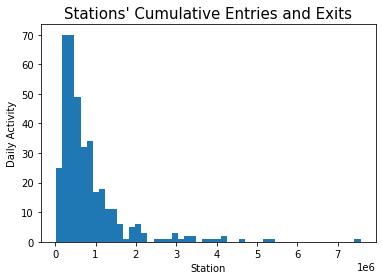

In [77]:
#see what this looks like - just for fun!
plt.hist(station_totals['DAILY_ACTIVITY'],50);
plt.title("Stations' Cumulative Entries and Exits",fontsize = 15);
plt.xlabel('Station')
plt.ylabel('Daily Activity');